# **Sections 1: Enviroment Setups**

### Mount google drive to colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [ ]:
# import libraries
import pandas as pd
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from IPython.display import Markdown
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
warnings.filterwarnings("ignore")
!pip install -U kaleido

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 79.9 MB 117 kB/s 


### Define the path to datasets and figures

In [ ]:
base_path = '/content/drive/MyDrive/3037442798_3036360885_3034503824/data/topic1b'
figure_path = '/content/drive/MyDrive/3037442798_3036360885_3034503824/figures/'

# **Section 2: Exploratory Data Anaylsis**

**Dataset Introduction**
1.   data visualization for nchs_covid_health_insurance_coverage.csv
2.   data visualization for nchs_covid_reduced_access_to_health_care.csv
3.   data visualization for nchs_covid_mental_health_care.csv
4.   data visualization for nchs_covid_indicators_of_anxiety_depression.csv
5.   data visualization for nchs_covid_telemedicine_usage.csv

Dataset 1B - COVID-19 includes five datasets: the nchs covid indicators of anxiety depression dataset, the nchs covid mental health care dataset, the nchs covid health insurance coverage dataset, the nchs covid reduced access to health care dataset, and the nchs covid telemedicine usage dataset; they are collected from the HouseHold Pulse Survey launched by NCHS in partnership with the U.S. Census Bureau. The nchs covid indicators of anxiety depression, nchs covid mental health care, and nchs covid reduced access to health care datasets provides statistics on how COVID-19 has affected survey correspondents’ mental health, and their access to health care; nchs covid health insurance coverage provides statistics on the percentage of different types of health insurance the survey correspondents had; the nchs covid telemedicine usage dataset provides statistics on usage of telemedicine by healthcare providers. The **granularity** of our data is based on the interval of one survey is conducted; the interval is usually two weeks long.

The above five datasets all contain a column ‘Indicator’; the nchs covid indicators of anxiety depression dataset’s unique indicators are ‘Symptoms of Anxiety Disorder’, ‘Symptoms of  Depressive Disorder’, and ‘Symptoms of Anxiety Disorder and Depressive Disorder’; the nchs covid mental health care dataset’s unique indicators are 'Took Prescription Medication for Mental Health, Last 4 Weeks', 'Received Counseling or Therapy, Last 4 Weeks', 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',  'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'; the nchs covid health insurance coverage dataset’s unique indicators are 'Uninsured at the Time of Interview' 'Public Health Insurance Coverage', and 'Private Health Insurance Coverage'; the nchs covid reduced access to health care dataset’s unique indicators are 'Delayed Medical Care, Last 4 Weeks', 'Did Not Get Needed Care, Last 4 Weeks', and 'Delayed or Did Not Get Care, Last 4 Weeks'; the nchs covid telemedicine usage dataset’s unique indicators are 'Provider offers telemedicine', 'Scheduled one or more telemedicine appointments', and 'Provider offered telemedicine prior to pandemic'.

The above five datasets also contain columns named ’Group’ and ‘Subgroup’. The ‘Group’ indicates how the ‘Subgroup’ is divided into the ‘Subgroup’. For example, ‘Group’ column can be ‘By sex’ or ‘By Education’; accordingly, ‘Subgroup’ can be ‘Male’, ‘Female’, 'Less than a high school diploma' 'High school diploma or GED’, ‘Some college/Associate's degree’, and ‘Bachelor's degree or higher. 

The nchs covid indicators of anxiety depression dataset, the nchs covid mental health care dataset, the nchs covid health insurance coverage dataset, and the nchs covid reduced access to health care dataset all have a column called ‘Time Period Label’ which shows the time period of a specific row of data is gathered from. The nchs covid telemedicine usage dataset does not contain a column to indicate the specific time period, instead, it has a column ‘Round’ to indicate the number of rounds each row belongs to.

For nchs covid indicators of anxiety depression dataset, it has an important column named ‘Value’ which shows the percentage of surveyed population in a specific subgroup and a specific time interval that has the symptom in its ‘Indicator’ column. The nchs covid mental health care dataset’s ‘Value’ column shows the percentage of surveyed population in a specific subgroup and a specific time interval whose mental health care status is shown in its ‘Indicator’ column. The nchs covid health insurance coverage dataset’s ‘Value’ column indicates the percentage of surveyed population in a specific subgroup and a specific time interval whose health insurance status is indicated in its ‘Indicator’ column. The nchs covid reduced access to health care dataset indicates the percentage of surveyed population in a specific subgroup and a specific time interval whose reduced access to health care status is indicated in the ‘Indicator’ column. The nchs covid telemedicine usage dataset does not contain a ‘value’ column; instead, it has a ‘Response’ column that indicates whether or not their telemedicine requests have been responded to and a ‘Percent’ column to show the percentage of a specific subgroup in a specific round that has to get the specific type of response.


**Exploratory Data Anaylsis**

Exploratory analysis is conducted for the above five datasets, graphs are plotted in order to visualize the information contained in the datasets. For each of the four datasets: the nchs covid indicators of anxiety depression dataset, the nchs covid mental health care dataset, the nchs covid health insurance coverage dataset, and the nchs covid reduced access to health care dataset, we provided a ‘Value’ vs ‘Time Period Label’ for each ‘Indicator’ and each ‘Group’. Note that for the 'Group': 'By State', **in order to cleanly and accurately visualize the relationship among variables**, we included dynamic maps instead of a line graph to avoid overplotting. For the nchs covid telemedicine usage dataset, we provided a ‘Percent’ vs ‘Round’ for each ‘Subgroup’. Note that we do provide the **correlation** heatmap among different features; however, this is included in the modelling part in section 4 because we have different features for different models.

## Section 2.1: Helper Functions

In [ ]:
# Define the abbreviations of features for better visualization quality
feature_full_name_to_abbrev = {"Delayed Medical Care, Last 4 Weeks":                                        "Delayed Care",
       'Delayed or Did Not Get Care, Last 4 Weeks':                                                          "Delayed or Not Care",
       'Did Not Get Needed Care, Last 4 Weeks':                                                                "Not Care",
       'Private Health Insurance Coverage':                                                                    "Private Insurance", 
       'Public Health Insurance Coverage':                                                                    "Public Insurance", 
       'Uninsured at the Time of Interview':                                                                  "Uninsured", 
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks':                                       "Not Therapy", 
       'Received Counseling or Therapy, Last 4 Weeks':                                                        "Get Therapy", 
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': "Took Prescription/Counseling", 
       'Took Prescription Medication for Mental Health, Last 4 Weeks':                                       "Took Prescription", 
       'Symptoms of Anxiety Disorder or Depressive Disorder':                                                 "Anxiety Symptons", 
       'State_cat':                                                                                            "State"}

In [ ]:
# Function to get abbreviation from full name
def get_feature_abbrev(lst):
  return [feature_full_name_to_abbrev[item] for item in lst]

In [ ]:
# A function to print basic information about the dataset
def print_basic_info(df):
  print("-----------Indicator-----------")
  print(df['Indicator'].unique())
  print("######################################################")
  print("-----------Group-----------")
  print(df['Group'].unique())
  print("######################################################")
  print("-----------Subgroup-----------")
  print(df['Subgroup'].unique())
  print("######################################################")
  print("-----------Time Period Label-----------")
  print(df['Time Period Label'].unique())
  print("######################################################")
  return

In [ ]:
# Function to set datetime
def setup_datetime(df):
  df["Time Period Start Date"] = pd.to_datetime(df["Time Period Start Date"], format='%m/%d/%Y')
  df["Time Period End Date"] = pd.to_datetime(df["Time Period End Date"], format='%m/%d/%Y')
  return df

In [ ]:
# Function to get a group-subgroup dictionary
def get_subgp_dict(df):
  df['Group_Subgroup'] = df['Group'] + '|' + df['Subgroup']
  indicators = df['Indicator'].unique()
  group_subgroups = df['Group_Subgroup'].unique()
  gp_subgp_dict = {}
  for gp_subgp_string in group_subgroups:
      gp, subgp = gp_subgp_string.split('|')
      if gp not in gp_subgp_dict:
          gp_subgp_dict[gp] = []
      gp_subgp_dict[gp].append(subgp)
  return gp_subgp_dict

In [ ]:
# Function to plot indicator by group
def indicator_plot_by_group(data, gp_subgp_dict, df_name):
  df = data.copy()
  df = setup_datetime(df)
  del gp_subgp_dict['By State']
  for gp in gp_subgp_dict:
      #plt.figure(figsize=(20, 3))
      plt.figure(figsize=(30, 5))
      for subgp in gp_subgp_dict[gp]:
          for ind_idx, indic in enumerate(df['Indicator'].unique()):
              plt.subplot(1, len(df['Indicator'].unique()), ind_idx + 1)
              ind_group = df[(df['Indicator'] == indic) & (df['Group'] == gp) & (df['Subgroup'] == subgp)].sort_values('Time Period Start Date')
              plt.plot(ind_group['Time Period Start Date'], ind_group['Value'], marker='o', label=f"{gp}: {subgp}")
              plt.title(f"{indic}", fontsize=8)
              plt.xticks(fontsize=10, rotation = 45)
              plt.yticks(fontsize=10)
              if ind_idx == len(df['Indicator'].unique()) - 1:
                  plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1))
              plt.grid()
      plt.plot()
      s = str(gp)
      s = "".join(s.split())
      s = "".join(s.split('/'))
      # plt.savefig(figure_path + df_name + '_'+ s + '.png')
  return

In [ ]:
# Get the US state abbreviation from full name
def get_us_state_to_abbrev():
  us_state_to_abbrev = {
        "Alabama": "AL",
        "Alaska": "AK",
        "Arizona": "AZ",
        "Arkansas": "AR",
        "California": "CA",
        "Colorado": "CO",
        "Connecticut": "CT",
        "Delaware": "DE",
        "Florida": "FL",
        "Georgia": "GA",
        "Hawaii": "HI",
        "Idaho": "ID",
        "Illinois": "IL",
        "Indiana": "IN",
        "Iowa": "IA",
        "Kansas": "KS",
        "Kentucky": "KY",
        "Louisiana": "LA",
        "Maine": "ME",
        "Maryland": "MD",
        "Massachusetts": "MA",
        "Michigan": "MI",
        "Minnesota": "MN",
        "Mississippi": "MS",
        "Missouri": "MO",
        "Montana": "MT",
        "Nebraska": "NE",
        "Nevada": "NV",
        "New Hampshire": "NH",
        "New Jersey": "NJ",
        "New Mexico": "NM",
        "New York": "NY",
        "North Carolina": "NC",
        "North Dakota": "ND",
        "Ohio": "OH",
        "Oklahoma": "OK",
        "Oregon": "OR",
        "Pennsylvania": "PA",
        "Rhode Island": "RI",
        "South Carolina": "SC",
        "South Dakota": "SD",
        "Tennessee": "TN",
        "Texas": "TX",
        "Utah": "UT",
        "Vermont": "VT",
        "Virginia": "VA",
        "Washington": "WA",
        "West Virginia": "WV",
        "Wisconsin": "WI",
        "Wyoming": "WY",
        "District of Columbia": "DC",
        "American Samoa": "AS",
        "Guam": "GU",
        "Northern Mariana Islands": "MP",
        "Puerto Rico": "PR",
        "United States Minor Outlying Islands": "UM",
        "U.S. Virgin Islands": "VI",
  }
  return us_state_to_abbrev

In [ ]:
# Plot the correlation heatmap
def get_heatmap(name, title, df):
  data = df.copy()
  feature_full_name_to_abbrev = {"Delayed Medical Care, Last 4 Weeks":                                        "Delayed Care",
       'Delayed or Did Not Get Care, Last 4 Weeks':                                                          "Delayed or Not Care",
       'Did Not Get Needed Care, Last 4 Weeks':                                                                "Not Care",
       'Private Health Insurance Coverage':                                                                    "Private Insurance", 
       'Public Health Insurance Coverage':                                                                    "Public Insurance", 
       'Uninsured at the Time of Interview':                                                                  "Uninsured", 
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks':                                       "Not Therapy", 
       'Received Counseling or Therapy, Last 4 Weeks':                                                        "Get Therapy", 
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': "Took Therapy/Counseling", 
       'Took Prescription Medication for Mental Health, Last 4 Weeks':                                       "Took Therapy", 
       'Symptoms of Anxiety Disorder or Depressive Disorder':                                                 "Anxiety Symptons", 
       'State_cat':                                                                                            "State"}
  data = data.rename(columns = feature_full_name_to_abbrev)
  corr = data.corr()
  plt.rcParams["figure.figsize"] = [20, 15]
  sns.heatmap(corr, center=0, annot=True)
  plt.title(title)
  plt.show()
  # plt.savefig(figure_path + name + 'heatmap.png')
  return

In [ ]:
# Create US map visualization
def create_map(df):
  data = df.copy()
  data = data[data["Group"] == "By State"]
  data['Value'] = data['Value'].astype(float)
  data['State_Code'] = data['State'].replace(get_us_state_to_abbrev())
  for indicator in data["Indicator"].unique():
    fig = px.choropleth(data[data["Indicator"] == indicator],
                        locations='State_Code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color = "Value",
                        color_continuous_scale="Viridis_r", 
                        animation_frame='Time Period Start Date',
                        labels={'Value': indicator}
                        )
    fig.show()
  return 

## Section 2.2: Load Data

In [ ]:
# load data
health_insurance_coverage = pd.read_csv(join(base_path, "nchs_covid_health_insurance_coverage.csv")).dropna(subset=['Value'])
reduced_access_to_health_care = pd.read_csv(join(base_path, "nchs_covid_reduced_access_to_health_care.csv")).dropna(subset=['Value'])
mental_health_care = pd.read_csv(join(base_path, "nchs_covid_mental_health_care.csv")).dropna(subset=['Value'])
indicators_of_anxiety_depression = pd.read_csv(join(base_path, "nchs_covid_indicators_of_anxiety_depression.csv")).dropna(subset=['Value'])
telemedicine_usage = pd.read_csv(join(base_path, "nchs_covid_telemedicine_usage.csv"))

# get a dictionary with all subgroups
health_insurance_subgp_dict = get_subgp_dict(health_insurance_coverage)
reduced_access_to_health_care_subgp_dict = get_subgp_dict(reduced_access_to_health_care)
mental_health_care_subgp_dict = get_subgp_dict(mental_health_care)
indicators_of_anxiety_depression_subgp_dict = get_subgp_dict(indicators_of_anxiety_depression)

## Section 2.3: Data Visualization


1.   data visualization for nchs_covid_health_insurance_coverage.csv
2.   data visualization for nchs_covid_reduced_access_to_health_care.csv
3.   data visualization for nchs_covid_mental_health_care.csv
4.   data visualization for nchs_covid_indicators_of_anxiety_depression.csv
5.   data visualization for nchs_covid_telemedicine_usage.csv





### Section 2.3.1: Data Visualization for nchs_covid_health_insurance_coverage.csv



In [ ]:
# Print the basic information about the dataset
print("-----------Name-----------")
print("health_insurance_coverage")
print_basic_info(health_insurance_coverage)

-----------Name-----------
health_insurance_coverage
-----------Indicator-----------
['Uninsured at the Time of Interview' 'Public Health Insurance Coverage'
 'Private Health Insurance Coverage']
######################################################
-----------Group-----------
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']
######################################################
-----------Subgroup-----------
['United States' '18 - 24 years' '25 - 34 years' '35 - 44 years'
 '45 - 64 years' 'Male' 'Female' 'Hispanic or Latino'
 'Non-Hispanic White, single race' 'Non-Hispanic Black, single race'
 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Conn

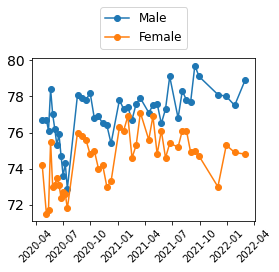

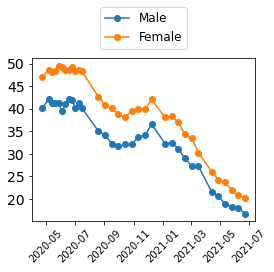

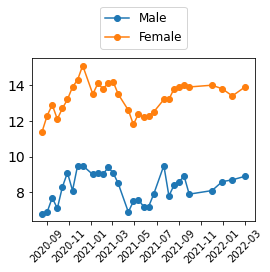

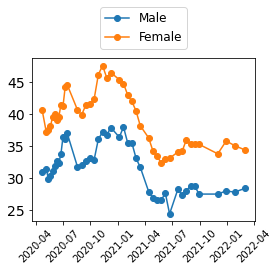

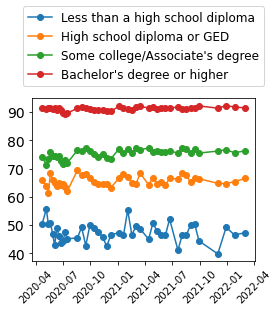

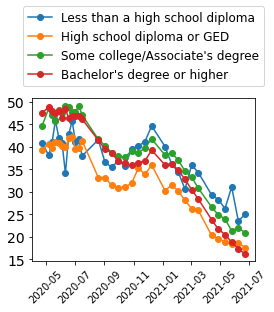

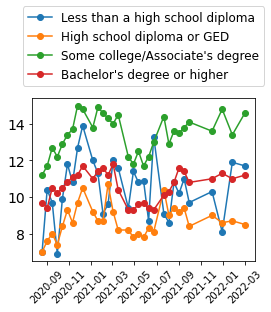

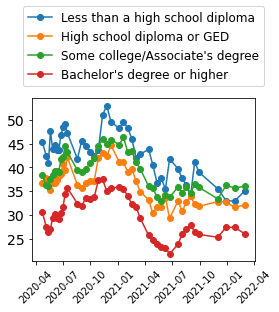

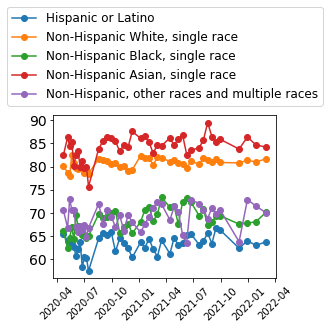

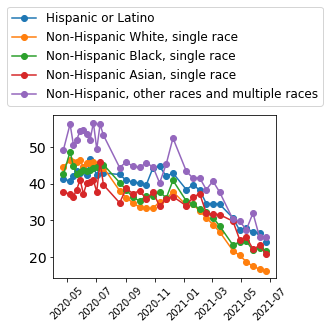

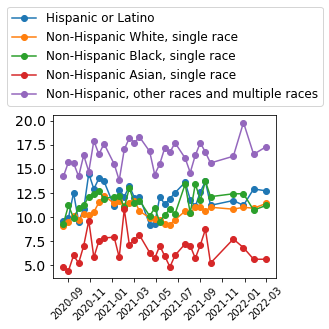

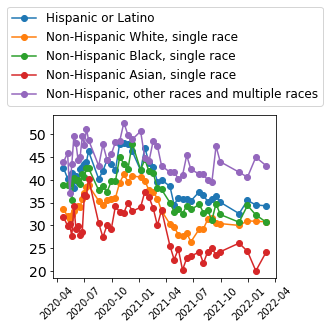

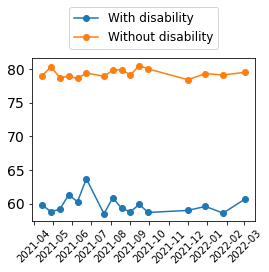

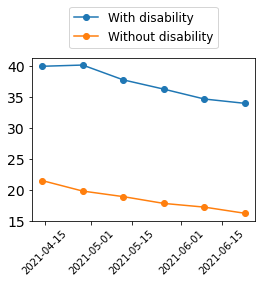

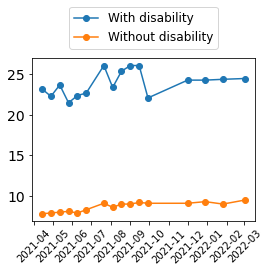

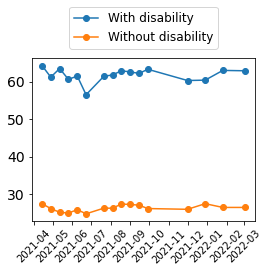

In [ ]:
# some highlight figures
fontsize = 15
health_insurance_coverage = pd.read_csv(join(base_path, "nchs_covid_health_insurance_coverage.csv")).dropna(subset=['Value'])
reduced_access_to_health_care = pd.read_csv(join(base_path, "nchs_covid_reduced_access_to_health_care.csv")).dropna(subset=['Value'])
mental_health_care = pd.read_csv(join(base_path, "nchs_covid_mental_health_care.csv")).dropna(subset=['Value'])
indicators_of_anxiety_depression = pd.read_csv(join(base_path, "nchs_covid_indicators_of_anxiety_depression.csv")).dropna(subset=['Value'])

csv_lst = [health_insurance_coverage, reduced_access_to_health_care, mental_health_care, indicators_of_anxiety_depression]
indic_lst = ["Private Health Insurance Coverage", "Delayed or Did Not Get Care, Last 4 Weeks", "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks", "Symptoms of Anxiety Disorder or Depressive Disorder"] 
indic = "Private Health Insurance Coverage"
gp_lst = ['By Sex', 'By Education', 'By Race/Hispanic ethnicity', 'By Disability status'] #,  , 'By Race/Hispanic ethnicity', 'By Disability status'

for gp in gp_lst:
  for csv_idx, data in enumerate(csv_lst):
    gp_subgp_dict = get_subgp_dict(data)
    indic = indic_lst[csv_idx]
    df = data.copy()
    df = setup_datetime(df)
    del gp_subgp_dict['By State']

    plt.figure(figsize=(4, 3))
    for subgp in gp_subgp_dict[gp]:
      ind_group = df[(df['Indicator'] == indic) & (df['Group'] == gp) & (df['Subgroup'] == subgp)].sort_values('Time Period Start Date')
      plt.plot(ind_group['Time Period Start Date'], ind_group['Value'], marker='o', label=f"{subgp}") #{gp}: 
      plt.xticks(rotation=45)
      plt.yticks(fontsize=fontsize-1)
      if gp == 'By Sex' or gp == 'By Disability status':
        y_loc = 1.35
      if gp == 'By Education':
        y_loc = 1.6
      if gp == 'By Race/Hispanic ethnicity':
        y_loc = 1.7

      plt.legend(loc='upper center', bbox_to_anchor=(0.5, y_loc), fontsize=fontsize-3)

    
    plt.savefig(join(figure_path, "eda_q2", indic.replace(" ", '_') + '_' + gp.replace(" ", '_').replace(",", '_').replace("/", '_') + '.png'), bbox_inches='tight')


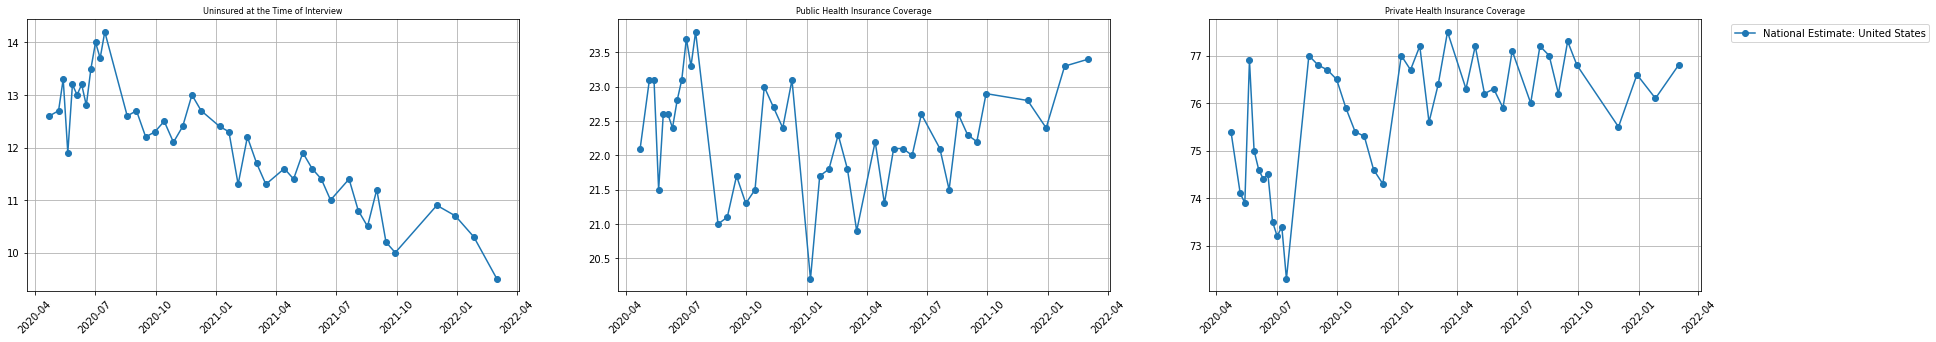

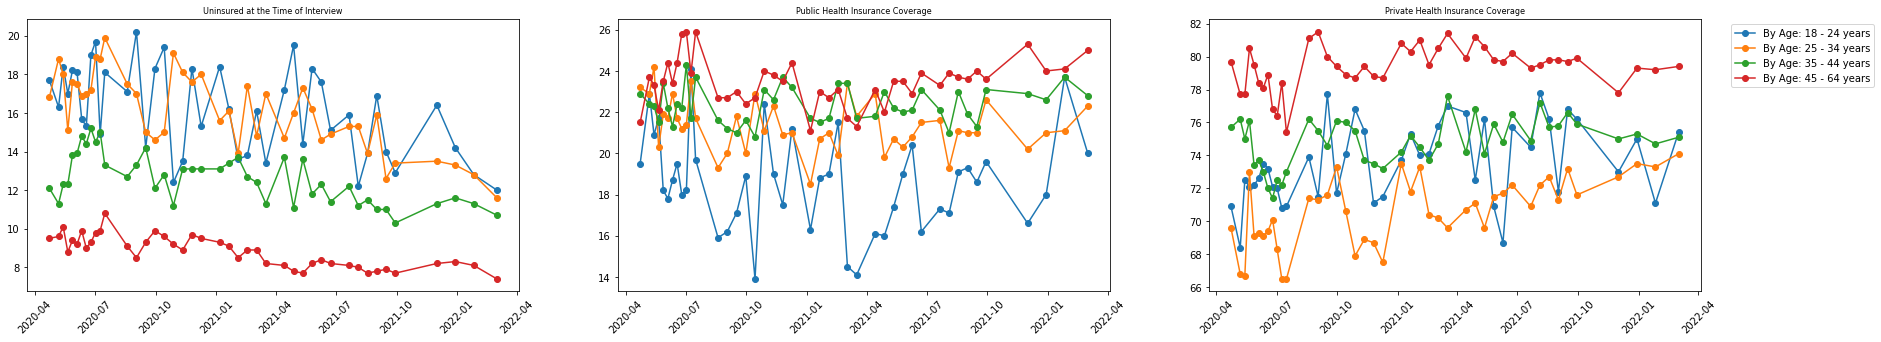

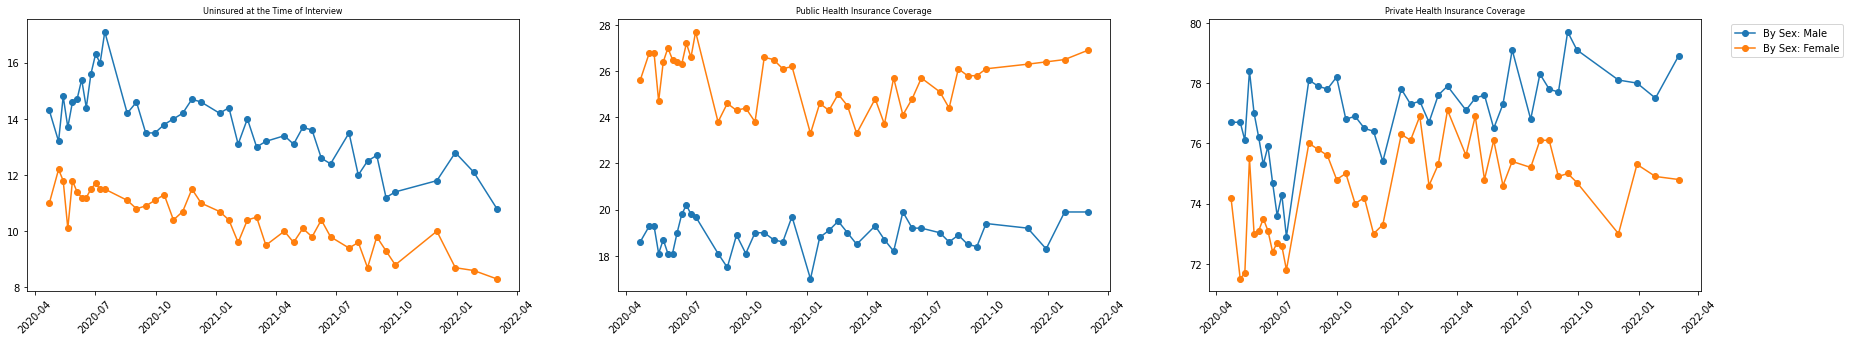

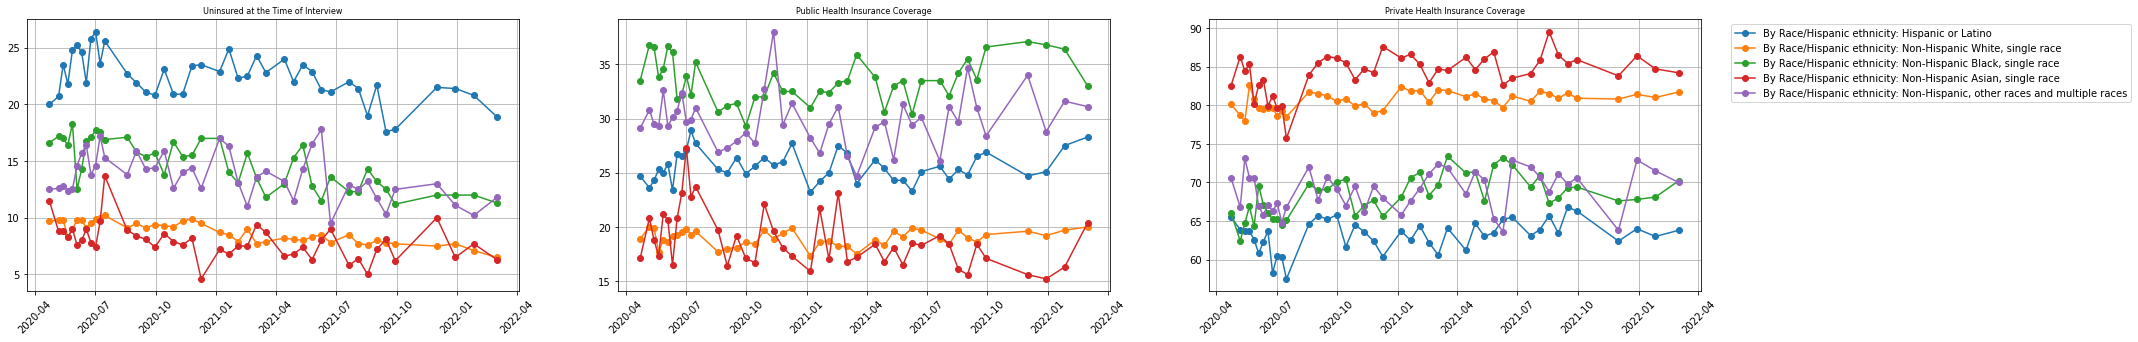

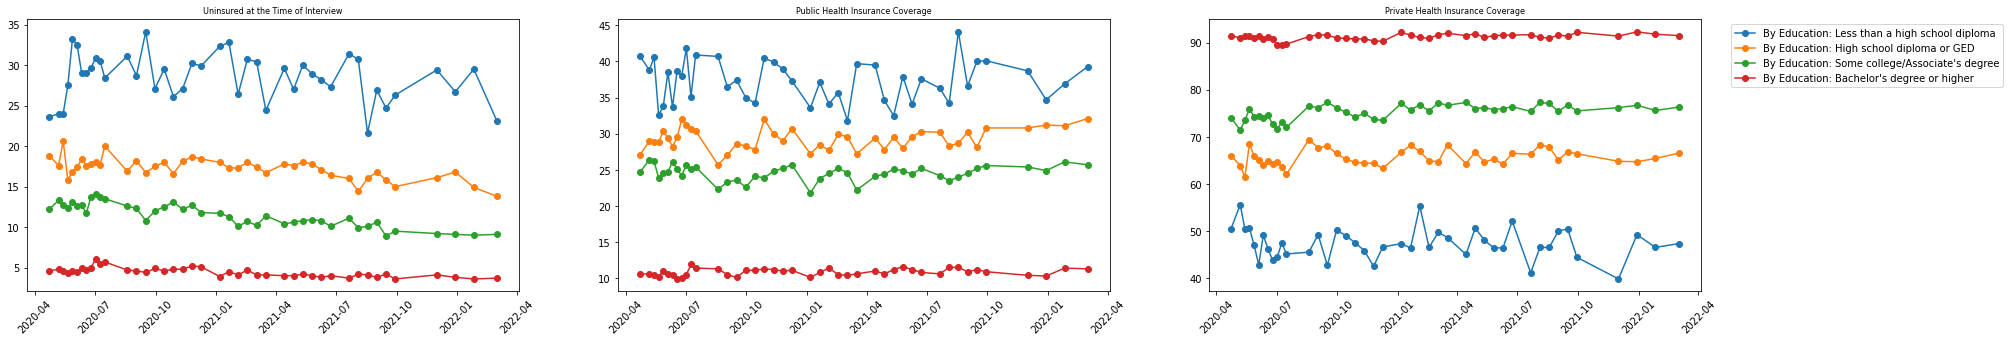

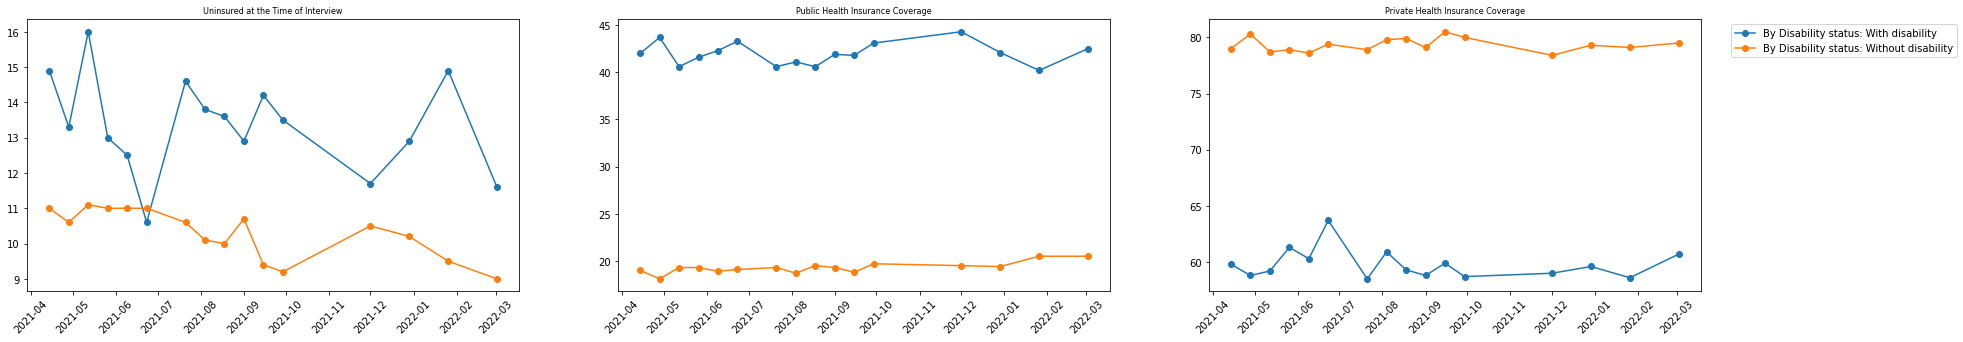

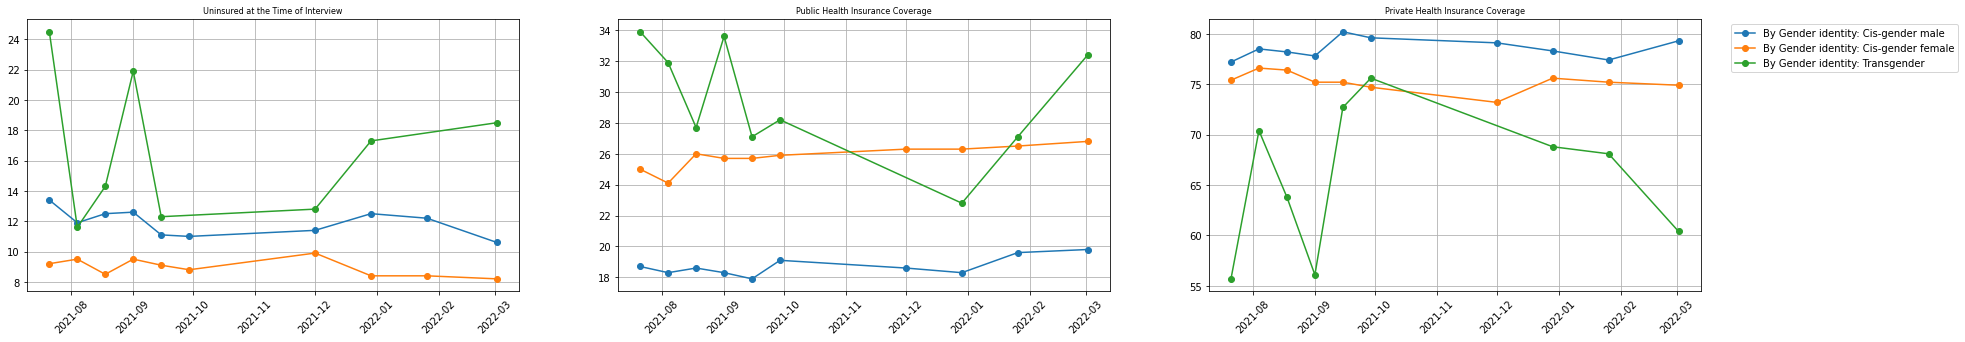

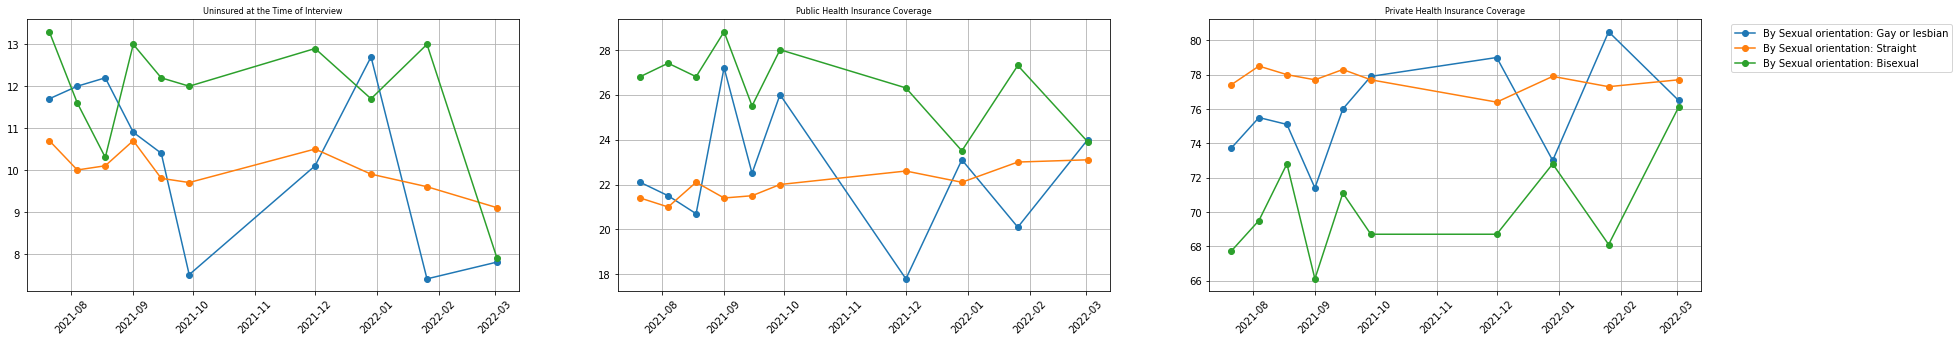

In [ ]:
indicator_plot_by_group(health_insurance_coverage, health_insurance_subgp_dict, 'health_insurance_coverage')

In [ ]:
# Create country map
create_map(health_insurance_coverage)

### Section 2.3.2: Data Visualization for nchs_covid_reduced_access_to_health_care.csv

In [ ]:
# Print the basic information about the dataset
print("-----------Name-----------")
print("reduced_access_to_health_care")
print_basic_info(reduced_access_to_health_care)

-----------Name-----------
reduced_access_to_health_care
-----------Indicator-----------
['Delayed Medical Care, Last 4 Weeks'
 'Did Not Get Needed Care, Last 4 Weeks'
 'Delayed or Did Not Get Care, Last 4 Weeks']
######################################################
-----------Group-----------
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status']
######################################################
-----------Subgroup-----------
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'Cal

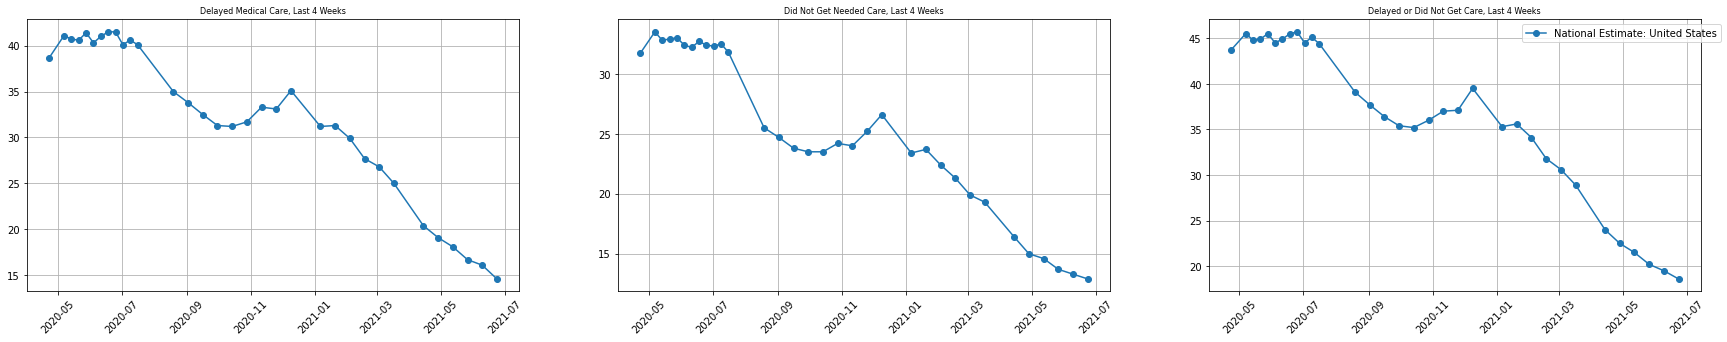

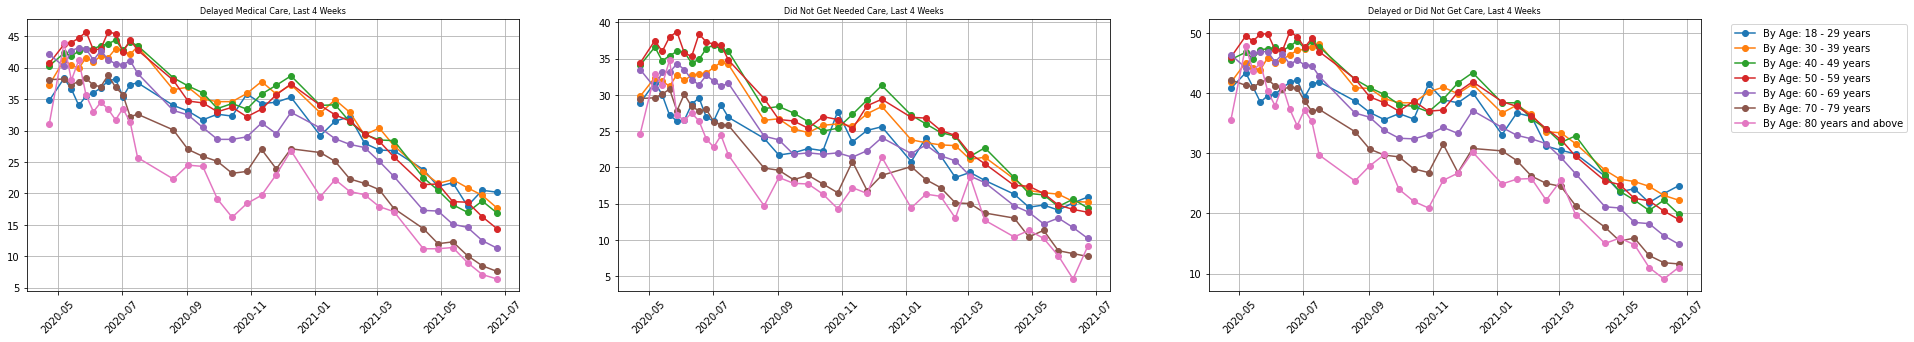

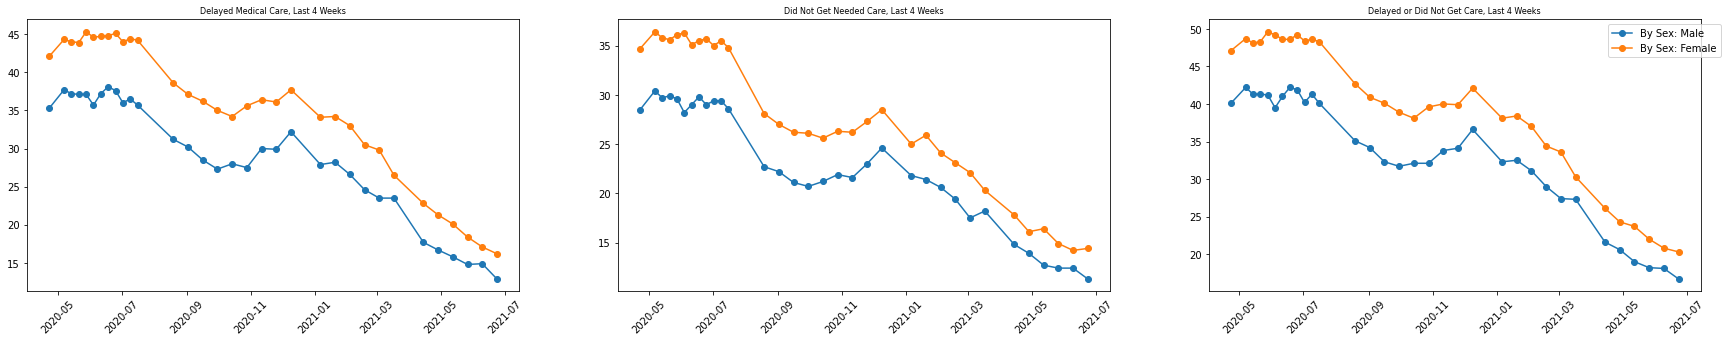

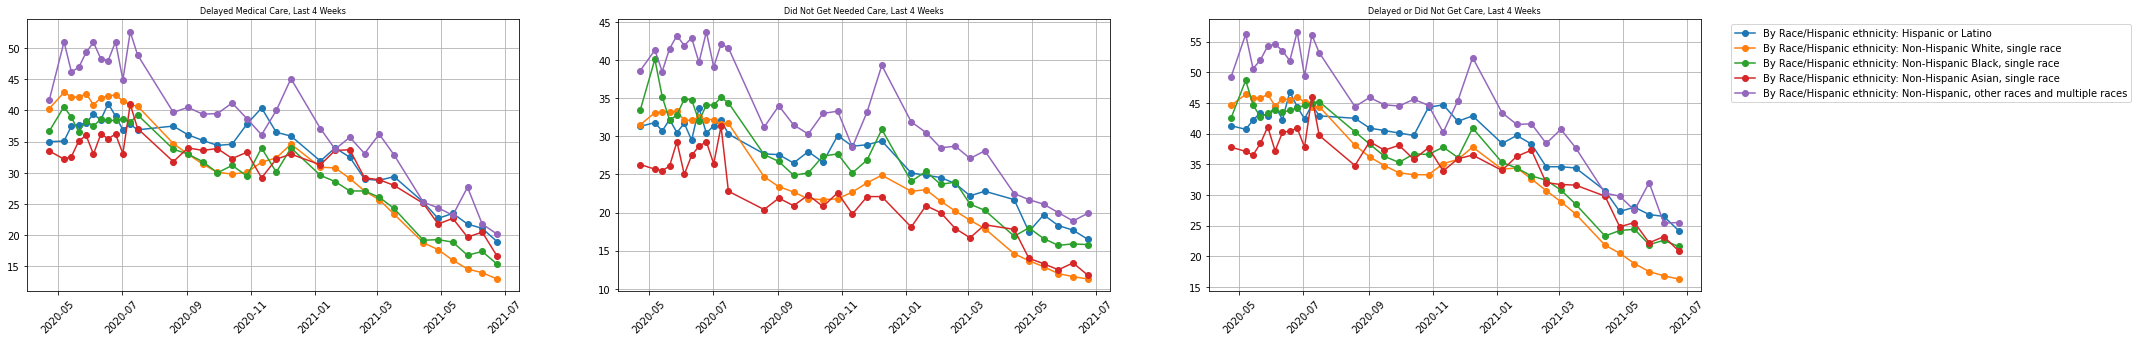

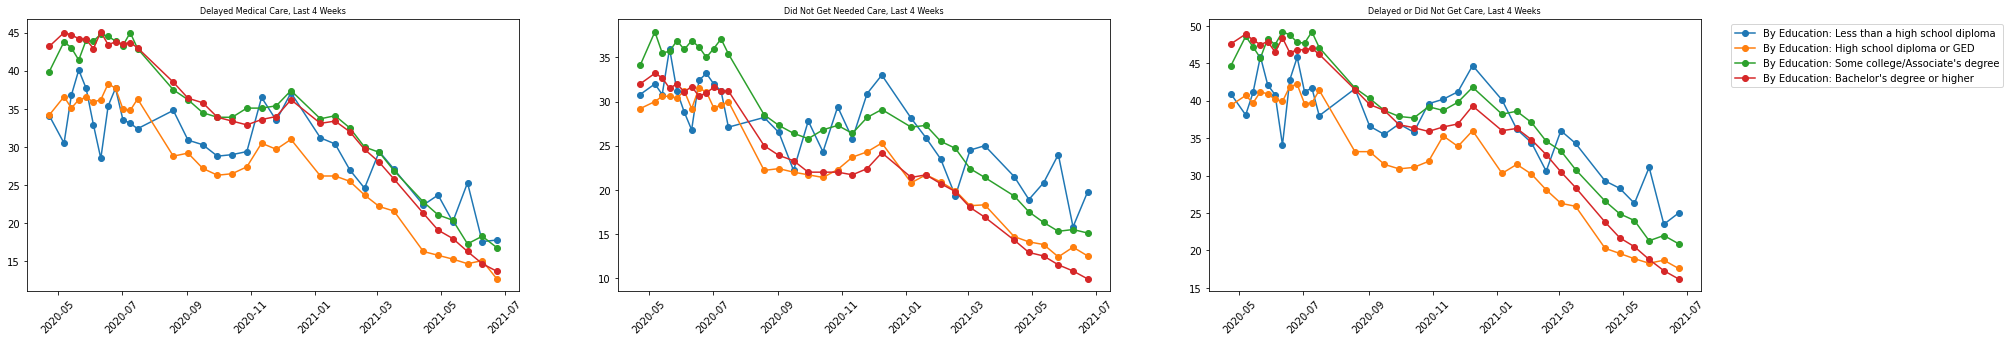

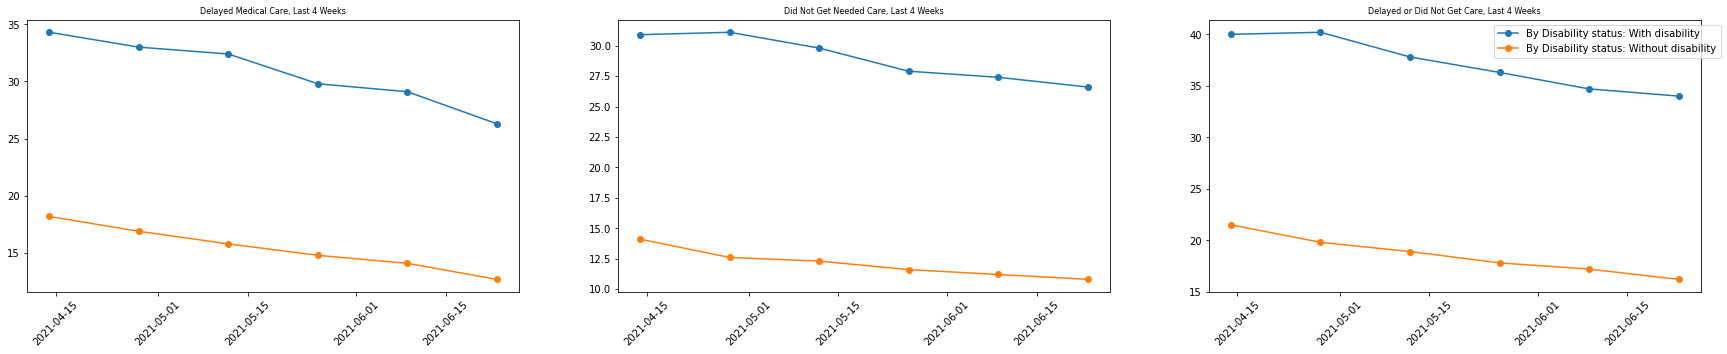

In [ ]:
# Plot indicator by group
indicator_plot_by_group(reduced_access_to_health_care, reduced_access_to_health_care_subgp_dict, 'reduced_access_to_health_care')

In [ ]:
# Plot the country map
create_map(reduced_access_to_health_care)

### Section 2.3.3: Data Visualization for nchs_covid_mental_health_care.csv

In [ ]:
# Print the basic information about the dataset
print("-----------Name-----------")
print("mental_health_care")
print_basic_info(mental_health_care)

-----------Name-----------
mental_health_care
-----------Indicator-----------
['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
######################################################
-----------Group-----------
['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']
######################################################
-----------Subgroup-----------
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female'
 'Did not experience symptoms of anxiety/depression in the past 4 weeks'
 'Experienced symptoms of anxiety/

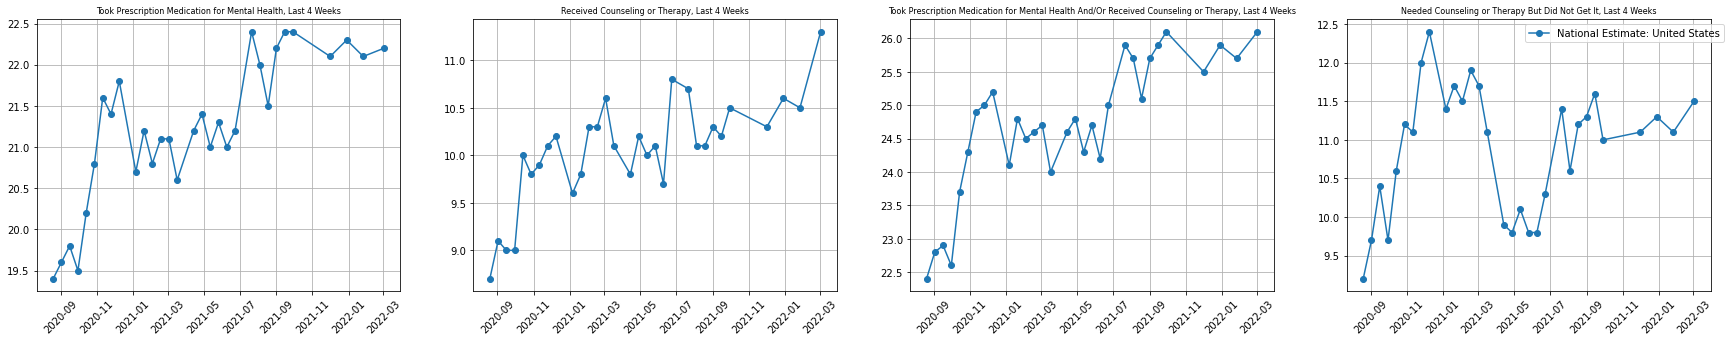

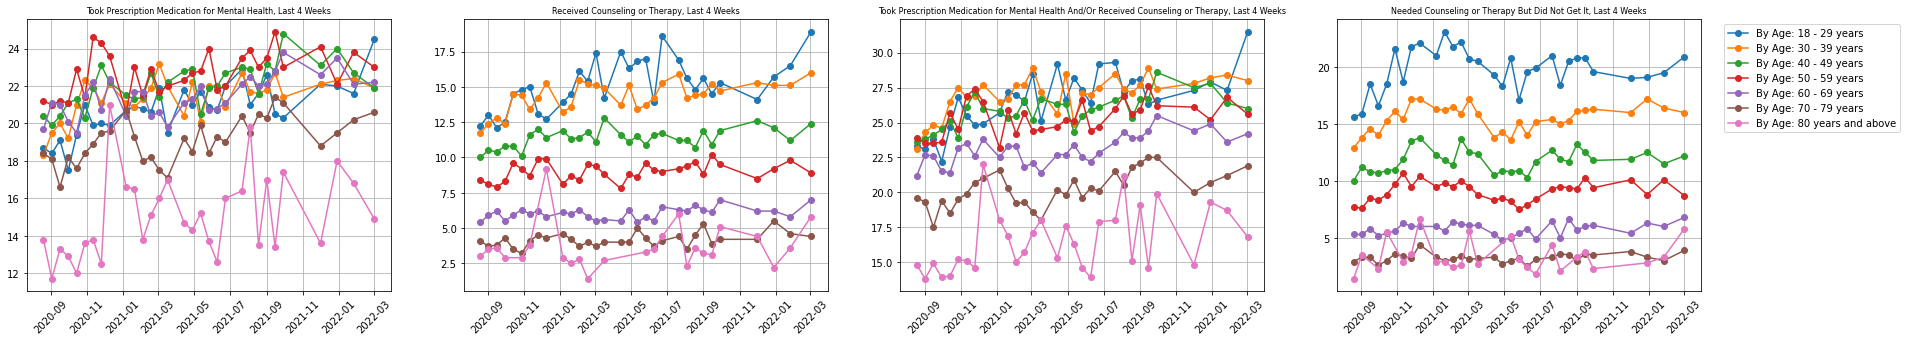

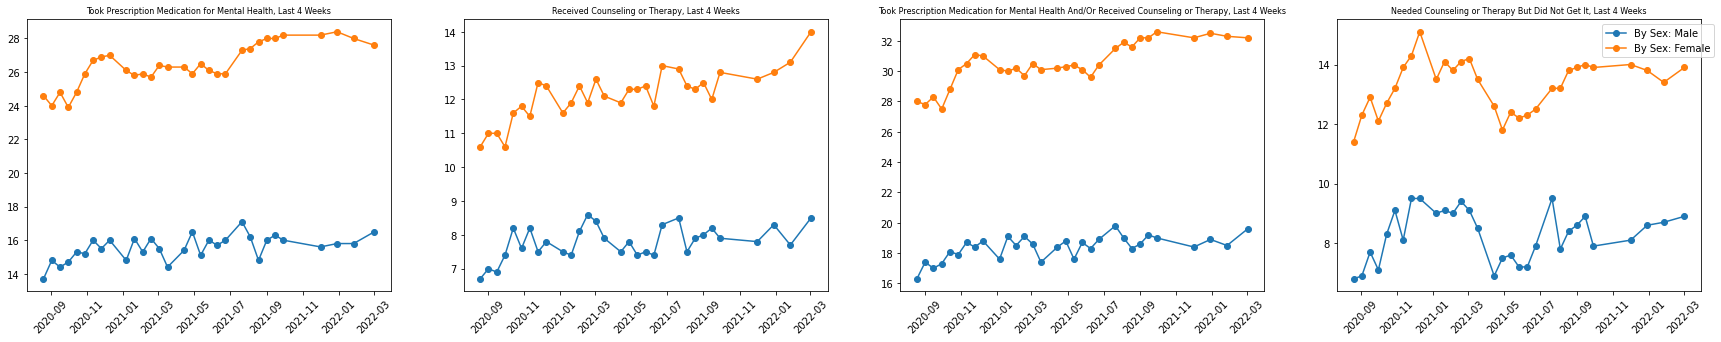

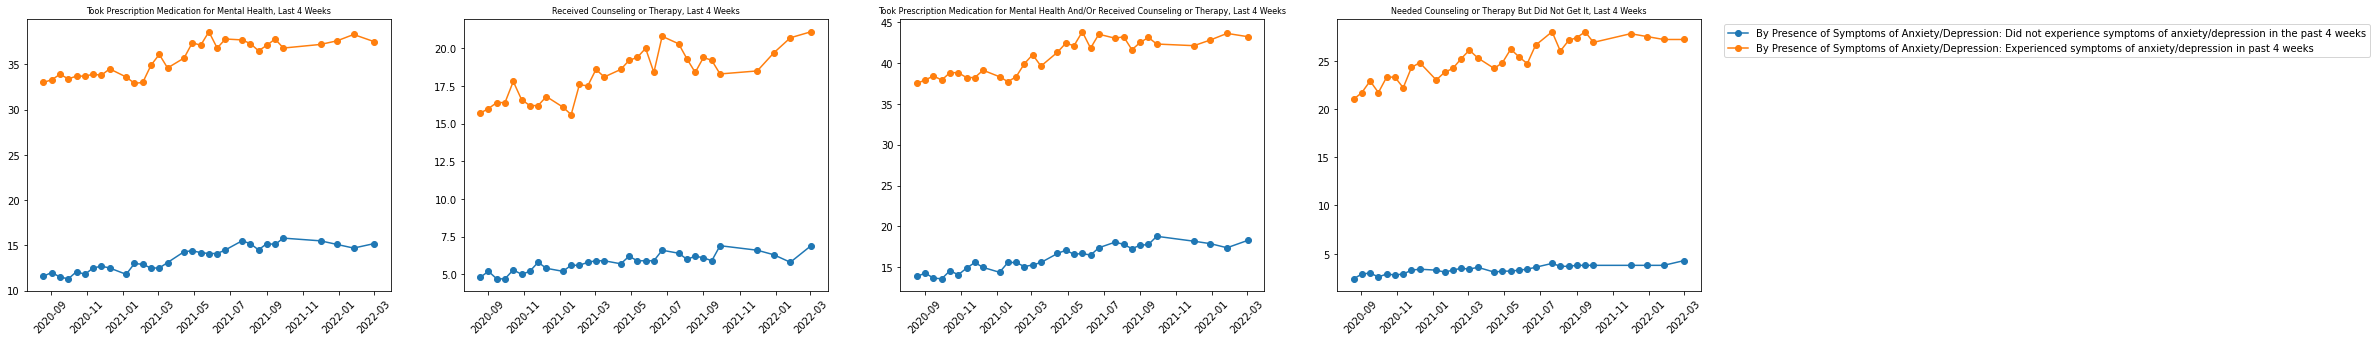

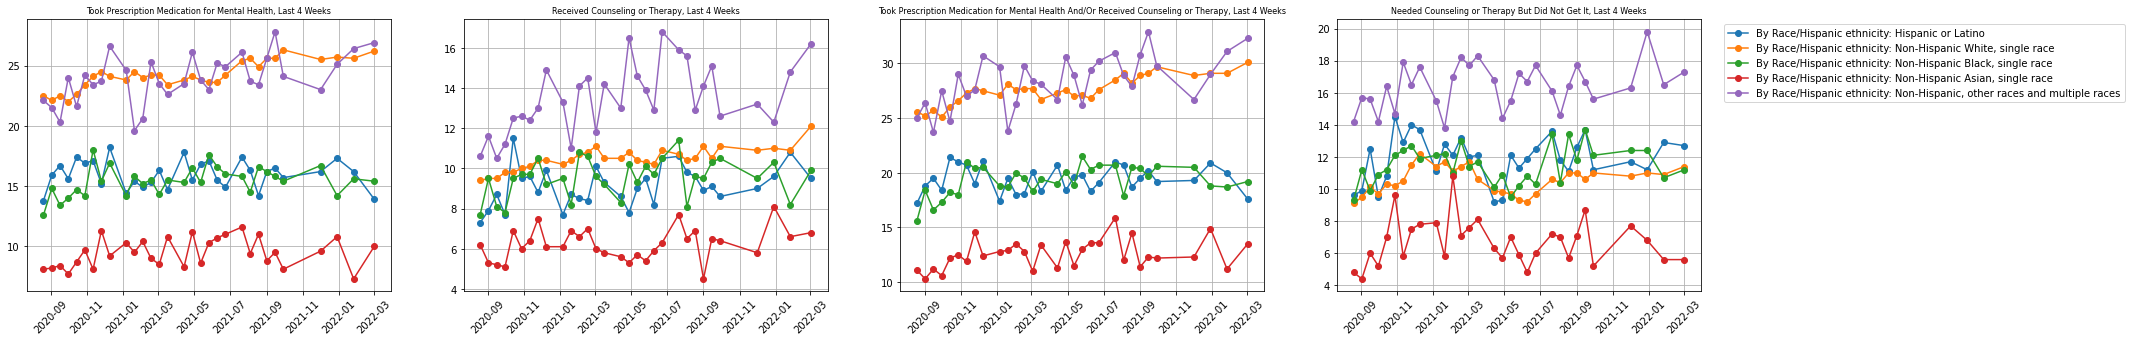

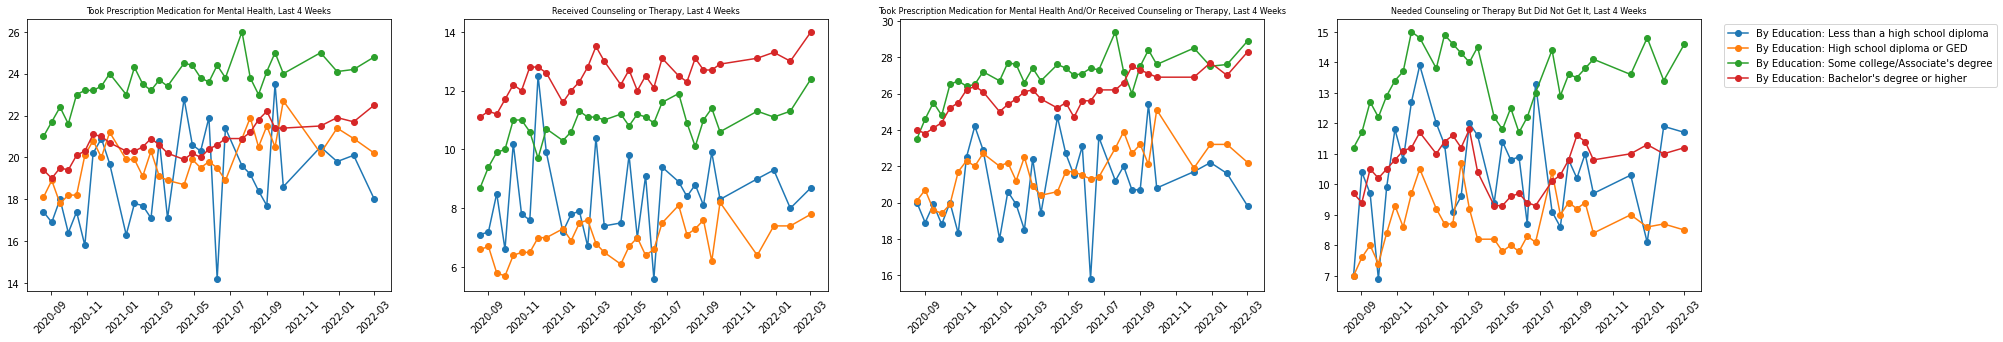

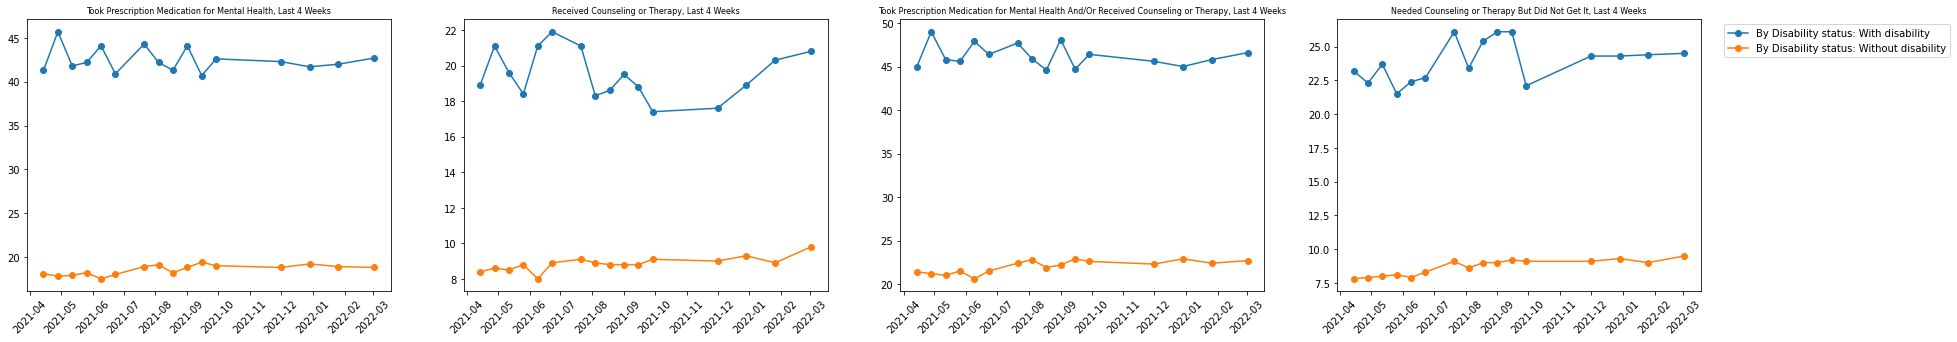

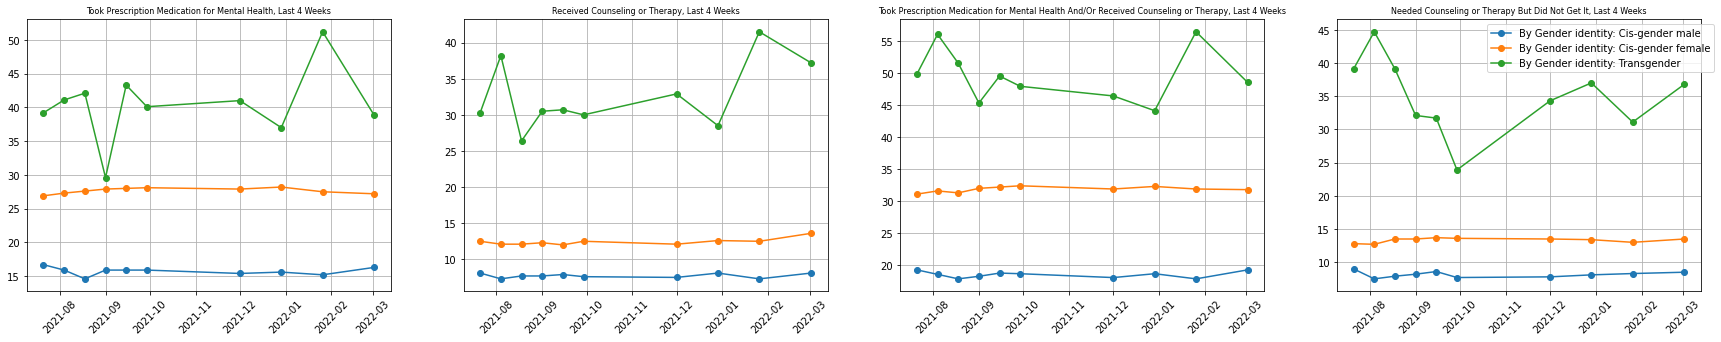

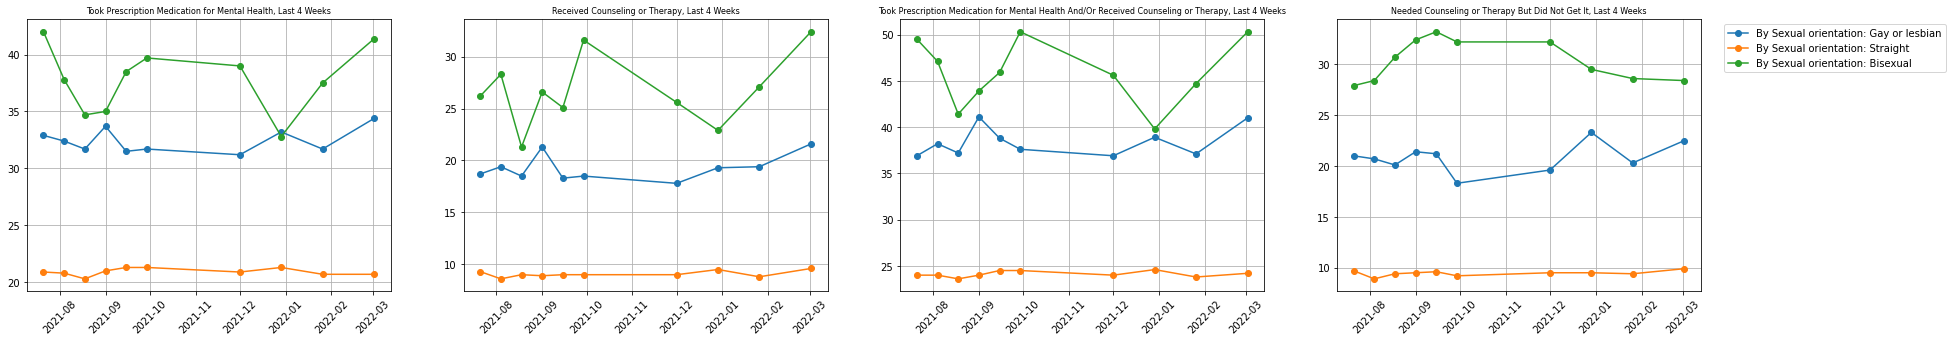

In [ ]:
# Plot the indicator by group
indicator_plot_by_group(mental_health_care, mental_health_care_subgp_dict, 'mental_health_care')

In [ ]:
# plot the country map
create_map(mental_health_care)

### Section 2.3.4: Data Visualization for nchs_covid_indicators_of_anxiety_depression.csv

In [ ]:
# Print the basic information about the dataset
print("-----------Name-----------")
print("indicators_of_anxiety_depression")
print("######################################################")
print_basic_info(indicators_of_anxiety_depression)

-----------Name-----------
indicators_of_anxiety_depression
######################################################
-----------Indicator-----------
['Symptoms of Depressive Disorder' 'Symptoms of Anxiety Disorder'
 'Symptoms of Anxiety Disorder or Depressive Disorder']
######################################################
-----------Group-----------
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']
######################################################
-----------Subgroup-----------
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some co

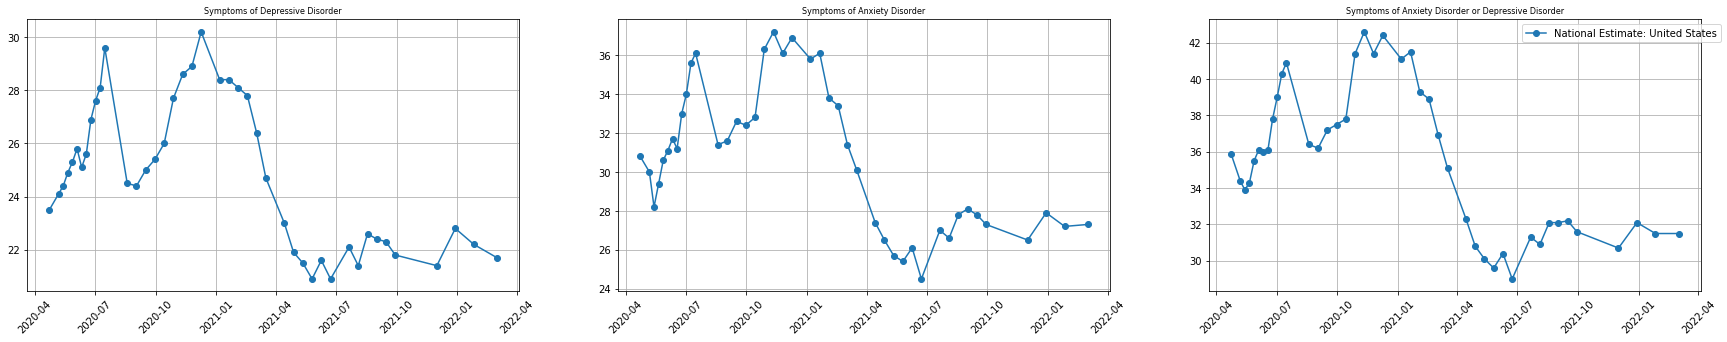

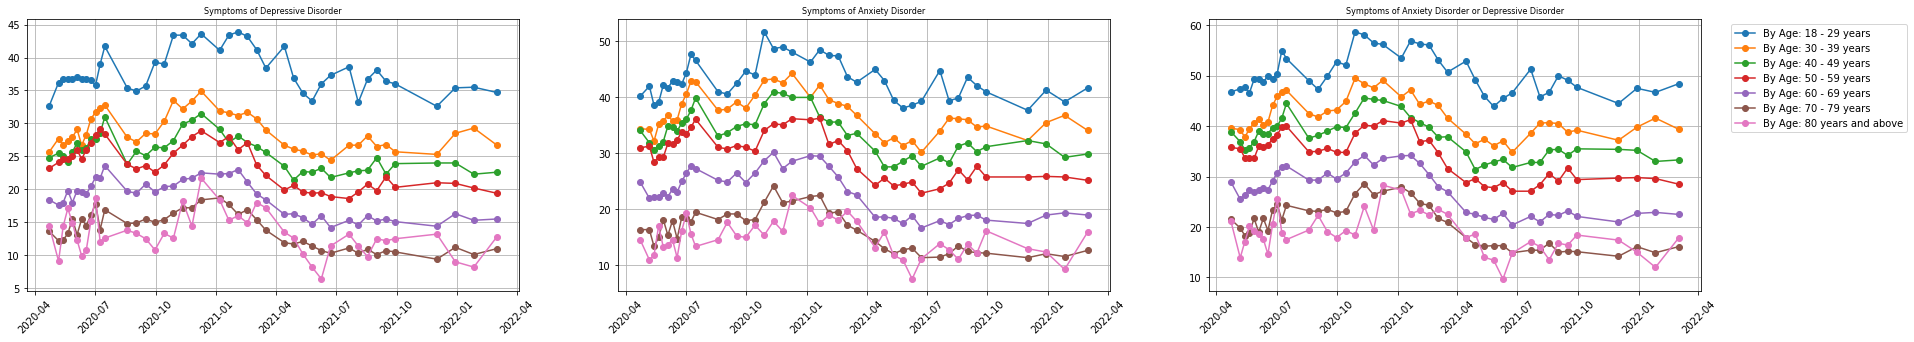

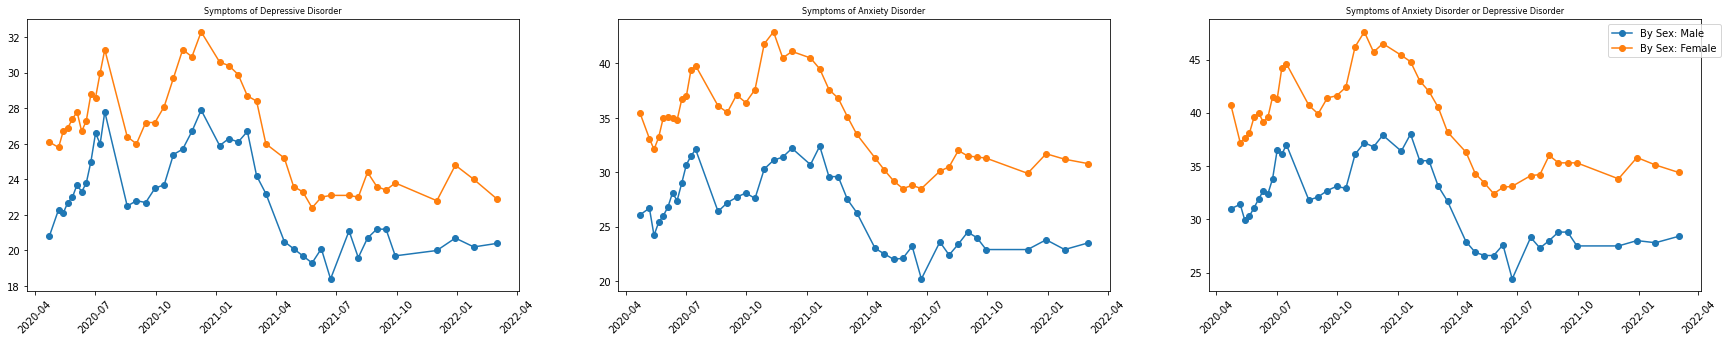

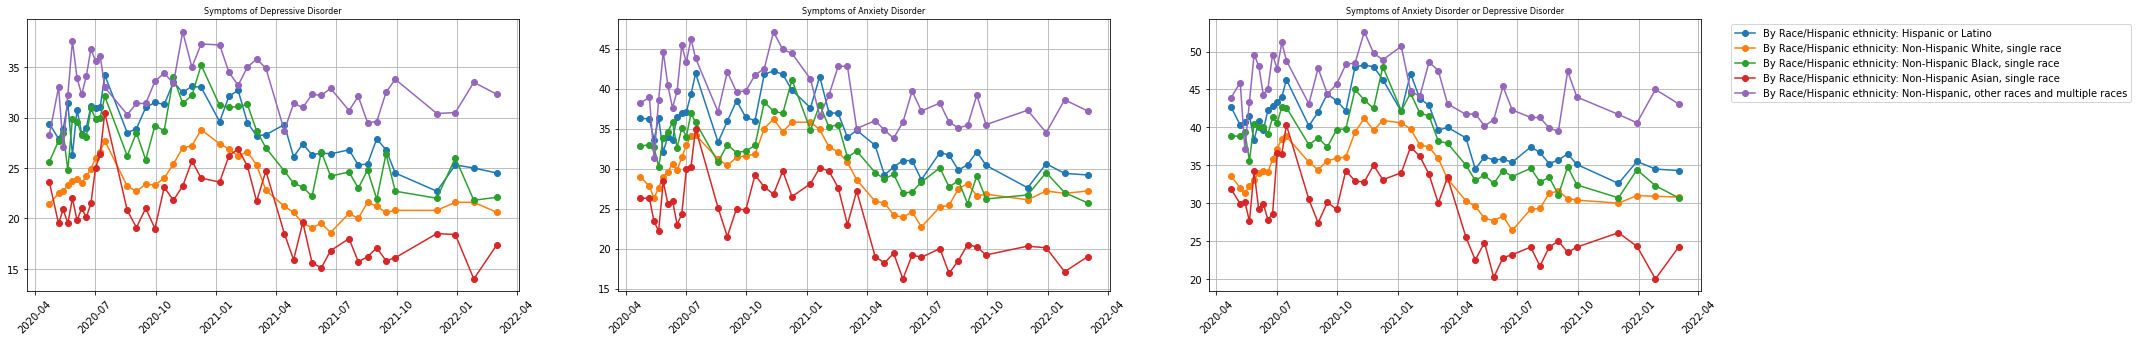

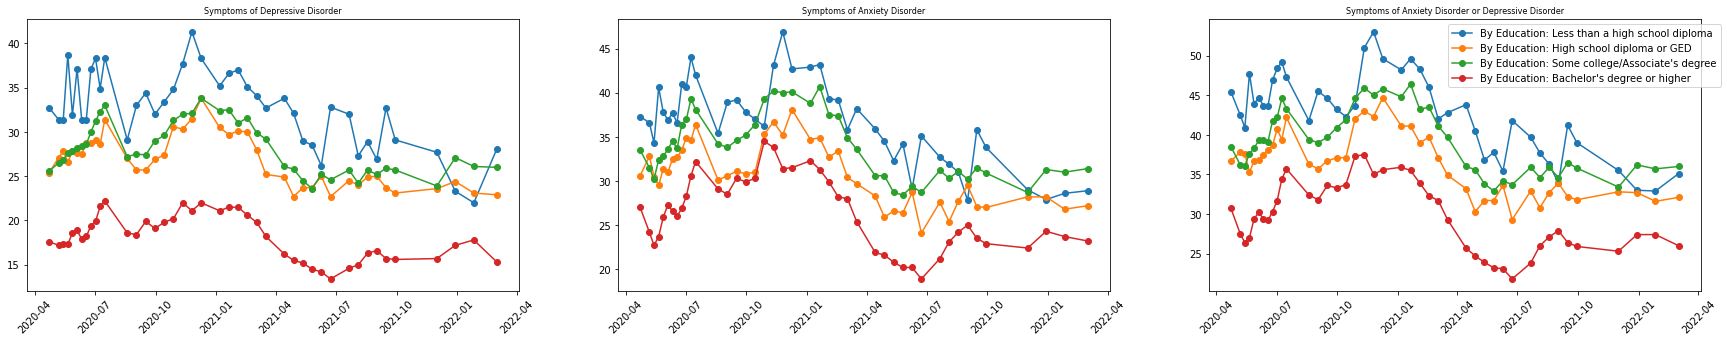

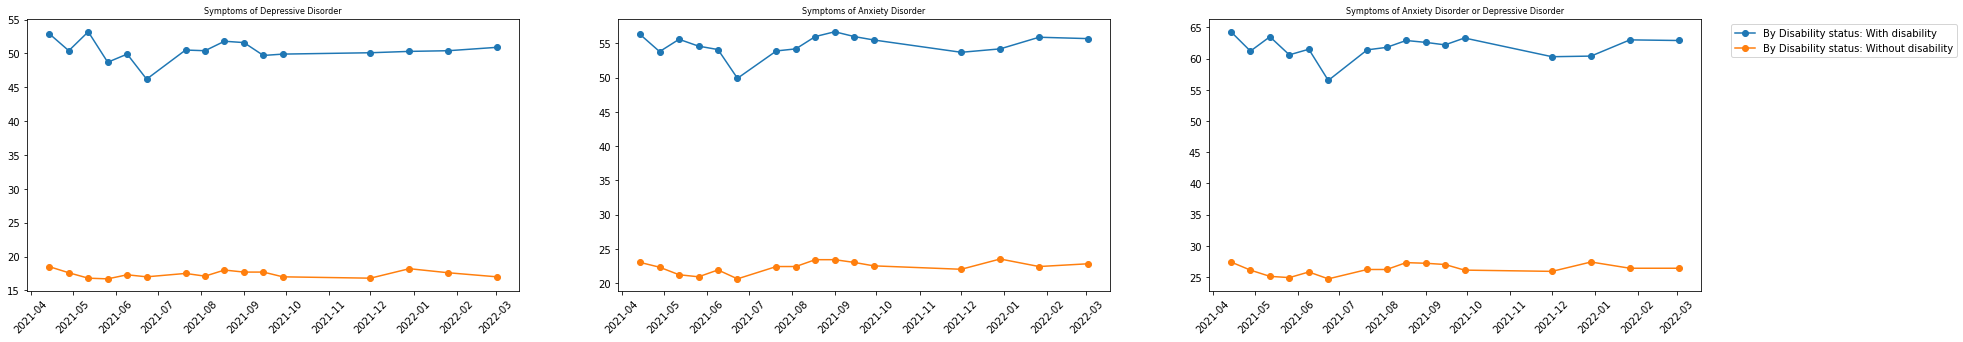

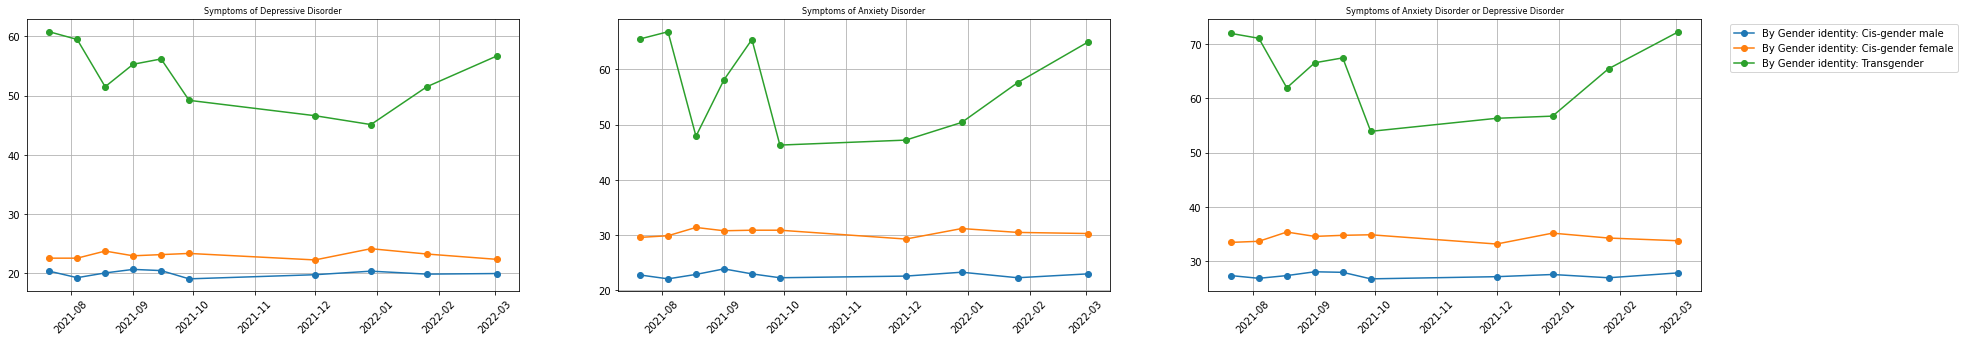

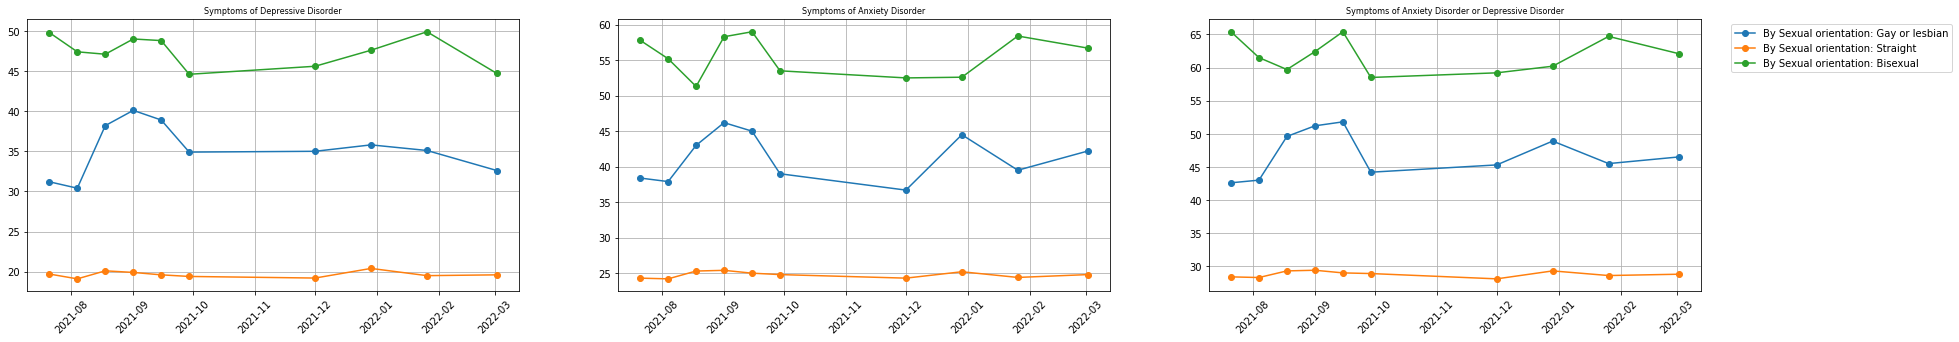

In [ ]:
# Plot the indicator by group
indicator_plot_by_group(indicators_of_anxiety_depression, indicators_of_anxiety_depression_subgp_dict, 'indicators_of_anxiety_depression')

In [ ]:
# plot the country map
create_map(indicators_of_anxiety_depression)

### Section 2.3.5: Data Visualization for nchs_covid_telemedicine_usage.csv

In [ ]:
# Print the basic information about the dataset
print("-----------Indicator-----------")
print(telemedicine_usage['Indicator'].unique())
print("######################################################")
print("-----------Group-----------")
print(telemedicine_usage['Group'].unique())
print("######################################################")
print("-----------Response-----------")
print(telemedicine_usage['Response'].unique())
print("######################################################")
print("-----------Subgroup-----------")
print(telemedicine_usage['Subgroup'].unique())
print("######################################################")
print("-----------Suppression-----------")
print(telemedicine_usage['Suppression'].unique())
print("######################################################")
print("-----------Significant 1-----------")
print(telemedicine_usage['Significant 1'].unique())
print("######################################################")

-----------Indicator-----------
['Provider offers telemedicine'
 'Scheduled one or more telemedicine appointments'
 'Provider offered telemedicine prior to pandemic']
######################################################
-----------Group-----------
['Total' 'Age group' 'Race/Hispanic origin' 'Sex' 'Education'
 'Urbanization' 'Chronic conditions']
######################################################
-----------Response-----------
['Total' 'Yes' 'No' 'Do not know' 'No usual place of care'
 'No telemedicine available']
######################################################
-----------Subgroup-----------
['Total' '18-44 years' '45-64 years' '65 years and over'
 'White non-Hispanic' 'Black non-Hispanic' 'Other non-Hispanic' 'Hispanic'
 'Male' 'Female' 'High school graduate or less' 'Some college'
 "Bachelor's degree or above" 'Metropolitan' 'Non-Metropolitan'
 'One or more chronic conditions' 'Diagnosed diabetes'
 'Diagnosed hypertension' 'Current asthma']
###############################

In [ ]:
# Data visualization based on group-subgroup pairs
telemedicine_usage['Group_Subgroup'] = telemedicine_usage['Group'] + '|' + telemedicine_usage['Subgroup']
indicators = telemedicine_usage['Indicator'].unique()
group_subgroups = telemedicine_usage['Group_Subgroup'].unique()
gp_subgp_dict = {}
for gp_subgp_string in group_subgroups:
    gp, subgp = gp_subgp_string.split('|')
    if gp not in gp_subgp_dict:
        gp_subgp_dict[gp] = []
    gp_subgp_dict[gp].append(subgp)
    
for ind in indicators:
    for gp_subgp_string in group_subgroups:
        for ind_idx, indic in enumerate(indicators):
            ind_group = telemedicine_usage[(telemedicine_usage['Indicator'] == indic) & (telemedicine_usage['Group'] == gp) & (telemedicine_usage['Subgroup'] == subgp) & (telemedicine_usage['Percent'] != 'Total')][['Round', 'Percent', 'Response']]
            new = ind_group.pivot(index='Round', columns='Response')
            new.plot(kind='bar')
            plt.title(f"{gp}: {subgp}: {indic}")
            plt.xticks(fontsize=10, rotation = 45)
            plt.yticks(fontsize=10)
            plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Section 3: Data Cleanning**

From the exploratory analysis, we observed that:
The **granularity** of our data is based on the interval of one survey is conducted; the interval is usually two weeks long. There is a large difference in anxiety level among different races, genders, age groups, and educational levels. The difference looks significant on the plots, thus we want to see if it is also significant statistically.
We want to figure out if we could use access to medical care, health insurance coverage, and other factors to predict the anxiety level of a group.

To answer the above two research questions, our method is to build several linear regression models on different subgroups and evaluate the model performance (this answers research question (2)). To answer the question (1), we conducted significance tests with the null hypothesis H0: race/gender/Education level has no impact on the anxiety level (in other words, the coefficients corresponding to the relevant features are 0). We conduct the significance test by bootstrapping the samples, and then fit 1000 models to get the confidence interval for the coefficients, if the confidence intervals don’t contain zero, then we could confidently reject the null hypothesis.

In order to apply the methodology discussed above to solve our research questions, we performed the following data preprocessing steps: 


1.   **Merging the data from the first four datasets**

The data frames are merged based on the tuple (date, group, subgroup).
2.   **Converting the responses into feature columns**

Indicator columns and value columns are converted to feature columns.



In [ ]:
# read in the csv data as a list of pandas dataframe
reduced_access_to_health_care = pd.read_csv(join(base_path, "nchs_covid_reduced_access_to_health_care.csv"))
health_insurance_coverage = pd.read_csv(join(base_path, "nchs_covid_health_insurance_coverage.csv"))
mental_health_care = pd.read_csv(join(base_path, "nchs_covid_mental_health_care.csv"))
indicators_of_anxiety_depression = pd.read_csv(join(base_path, "nchs_covid_indicators_of_anxiety_depression.csv"))
dataframes = [reduced_access_to_health_care, health_insurance_coverage, mental_health_care, indicators_of_anxiety_depression]


In [ ]:
# Merge the dataframes on ('Group', 'Subgroup', 'Time Period Start Date')
for i in range(len(dataframes)):
  # Select useful columns
  dataframes[i] = dataframes[i][['Indicator', 'Group', 'Subgroup', 'Time Period Start Date', 'Value']]
  # Convert indicators to columns
  pivot = dataframes[i].pivot(columns='Indicator', values = 'Value').rename_axis(None, axis=1).reset_index()
  # Concate the index tuples to the table
  new = pd.concat([pivot, dataframes[i][['Group', 'Subgroup', 'Time Period Start Date']]], axis=1)
  # Group the rows by the index tuples
  dataframes[i] = new.groupby(['Group', 'Subgroup', 'Time Period Start Date']).agg('mean').reset_index().drop(['index'], axis=1)
df = dataframes[0]
for i in range(1,len(dataframes)):
  df = df.merge(dataframes[i], how = 'inner', on = ['Group', 'Subgroup', 'Time Period Start Date'])
# Save processed data as a csv file
df.to_csv(base_path + '/processed_data.csv', index=False)

In [ ]:
data = pd.read_csv(join(base_path, "processed_data.csv"))
display(data["Group"].unique())

array(['By Disability status', 'By Education',
       'By Race/Hispanic ethnicity', 'By Sex', 'By State',
       'National Estimate'], dtype=object)

In [ ]:
# Drop missing value
data = data.dropna(axis=0)
data = data.drop(["Symptoms of Anxiety Disorder", "Symptoms of Depressive Disorder"], axis=1)
groups = data["Group"].unique()
for gp in groups:
  print(f"Group Name: {gp} ====" + f"          Number of Data Samples: {len(data[data['Group'] == gp])}")

Group Name: By Disability status ====          Number of Data Samples: 12
Group Name: By Education ====          Number of Data Samples: 84
Group Name: By Race/Hispanic ethnicity ====          Number of Data Samples: 105
Group Name: By Sex ====          Number of Data Samples: 42
Group Name: By State ====          Number of Data Samples: 991
Group Name: National Estimate ====          Number of Data Samples: 21


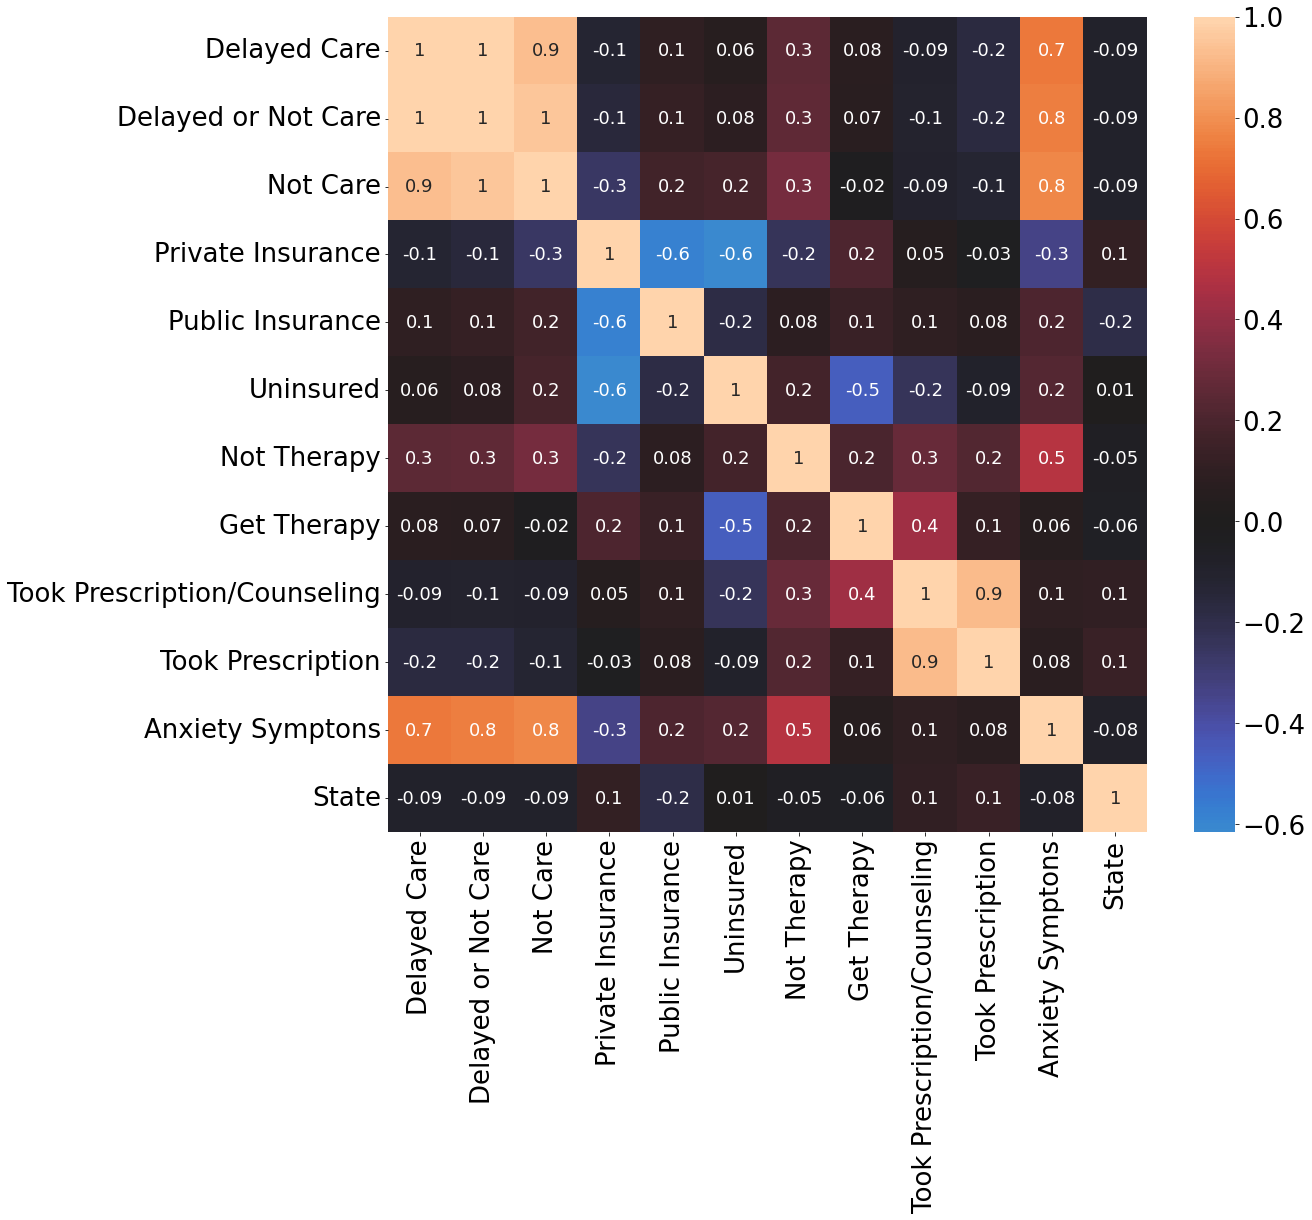

In [ ]:
state_data = data[data['Group'] == 'By State']
for key in state_data.columns:
  assert state_data[key].isnull().values.any() == False, f"Contain NaN value in {key} column"
state_data_X_Y = state_data.drop(columns = ['Group', 'Time Period Start Date'])
state_data_X_Y = state_data_X_Y.rename(columns={'Subgroup': 'State'})
state_data_X_Y["State"] = state_data_X_Y["State"].astype('category')
state_data_X_Y["State_cat"] = state_data_X_Y["State"].cat.codes
state_data_X_Y = state_data_X_Y.drop(columns = ['State'])
state_data_X_Y_norm = (state_data_X_Y - state_data_X_Y.mean()) / state_data_X_Y.std()

state_data_X_Y_corr = state_data_X_Y_norm.corr(method='pearson')

plt.rcParams["figure.figsize"] = [17, 15]
res = sns.heatmap(state_data_X_Y_corr, center=0, annot=True, fmt='.1g', annot_kws={"fontsize":18}) #, 
res.set_xticklabels(get_feature_abbrev(state_data_X_Y_norm.columns), fontsize = 26)
res.set_yticklabels(get_feature_abbrev(state_data_X_Y_norm.columns), fontsize = 26)
cbar = res.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)
plt.savefig(join(figure_path, "heatmaps_q1.png"), bbox_inches="tight")

In [ ]:
state_data_X_Y = state_data.drop(columns = ['Group'])
state_data_X_Y = state_data_X_Y.rename(columns={'Subgroup': 'State'})
state_data_X_Y['State_Code'] = state_data_X_Y['State'].replace(get_us_state_to_abbrev())
state_data_X_Y = state_data_X_Y.drop(['State', 'Time Period Start Date'], axis=1)
state_data_X_Y = state_data_X_Y.groupby('State_Code').agg(np.mean).reset_index()
#print(state_data_X_Y.columns)
fig = px.choropleth(state_data_X_Y,
                        locations='State_Code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Symptoms of Anxiety Disorder or Depressive Disorder',
                        color_continuous_scale="Viridis_r", 
                        labels= {'Symptoms of Anxiety Disorder or Depressive Disorder': ''},
                        )
fig.update_layout(coloraxis_colorbar_x=0.9)
fig.show()
#fig.write_image(join(figure_path, "maps_q1_anxiety.png"))

fig = px.choropleth(state_data_X_Y,
                        locations='State_Code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Private Health Insurance Coverage',
                        color_continuous_scale="Viridis", 
                        labels= {'Private Health Insurance Coverage': ''},
                        )
fig.update_layout(coloraxis_colorbar_x=0.9)
fig.show()
#fig.write_image(join(figure_path, "maps_q1_private_insurance.png"))

fig = px.choropleth(state_data_X_Y,
                        locations='State_Code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks',
                        color_continuous_scale="Viridis_r", 
                        labels= {'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': ''},
                        )
fig.update_layout(coloraxis_colorbar_x=0.9)
fig.show()
#fig.write_image(join(figure_path, "maps_q1_needconsuling.png"))

fig = px.choropleth(state_data_X_Y,
                        locations='State_Code', 
                        locationmode="USA-states", 
                        scope="usa",
                        color='Delayed or Did Not Get Care, Last 4 Weeks',
                        color_continuous_scale="Viridis_r", 
                        labels= {'Delayed or Did Not Get Care, Last 4 Weeks': ''},
                        )
fig.update_layout(coloraxis_colorbar_x=0.9)
fig.show()
#fig.write_image(join(figure_path, "maps_q1_delay_not_care.png"))


# **Section 4: Modelling and Inference**


1.   Mental Health Prediction By Disability status
2.   Mental Health Prediction By Education
3.   Mental Health Prediction By By Race/Hispanic ethnicity
4.   Mental Health Prediction By By Sex
5.   Mental Health Prediction By By State
6.   National Data Anaylsis

For each of the first four groups, we first plot heatmap **correlation** graphs of them; we then established and trained models like linear regression with and without lasso regularization, random forest regressor, and gradient boost regressor. There train and test performance are summarizes in a table. We used **R-squared** and **RMSE** to evaluate the performance of each model. We use linear regression with and without l1 in order to perform a **significant test** on them using bootstrapping to anaylsis on its coeeficients to see what features are related to high/low depression and anxiety rate. Some insights are gained and included in our final report. We use linear regression l1 because we have features that are co-linear and l1 regression has the ability to remove some redundant features and improve stability of our models. We use random forest regressor and gradient boost regressor to find some alternative ways to make predictions and explore whether they can improve the predicting precisions of linear regression. Based on our current research, we find that linear regression with l1 regularization has good performance and stability. In the future, we can do some hyper parameter tuning to improve our random forest regression model and gradient boost regression model and reduce our current overfitting problem. For the last two groups, we did not gain much insights.

**For feature engineering we perform the following steps:**
1.   **One-hot encoding of the categorical data**

Some features are categorical, such as subgroups (races, genders, age groups, and educational levels). To use those features in our model, one-hot encoding is needed to convert the data to numeric data.
2.   **Normalize the data**

Since we are planning to use OLS for the task, numeric features need to be normalized in order to not bias the l2 loss.
3.   **Missing data**

We drop rows with more than 3 NaN, and then Impute the rest of the missing values with the mean value of the column.




1.   What type of machine learning problem are you investigating?
> Linear Regression problem.


2.   What model do you plan on using and why?  
> OLS model because we can analyze the magnitude and confidence interval of coefficient to get the signifiance of features. We also use Random Forest and Gradient Boosting because ensemble learning method generally have better performance.


3.   Does your model require hyperparameter tuning? If so, how do you approach it?  How do you engineer the features for your model? 
> Gradient boosting needs careful tuning on learning rate so we use cross validation on tuning this parameters. We find the optimal hyperparameter that has the minimum MSE.

4. How do you perform cross validation on your model?  
> We perform the cross validation on train set in 5-fold, and we evaluate the split performance by R squared and mean squared error metrics.

4. What loss metrics are you using to evaluate your model?  
> We evaluate the model by R square and Root Mean Squared Error on Test set. 


4. From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?  
> We expect the test RMSE should be close to train RMSE, if test RMSE is too large means it is overfitting.


## Section 4.1: Helper Functions & Load Data

In [ ]:
# This function creates on-hot encoding for categorical data
def create_onehot(data, columns):
  columns = sorted(columns)
  for column in columns:
      values = data[column].unique()[1:]
      # values = data[column].unique()
      for value in values:
          data[column + "=" + str(value)] = (data[column] == value).astype(int)
      data = data.drop(column, axis = 1)
  return data

In [ ]:
# This function helps get the on-hot and normalized data for X; Y; and X and Y(for heatmap purpose)
def get_X_Y_data(data):

  data_temp1 = data.drop(columns = ['Group', 'Subgroup', 'Time Period Start Date', 'Symptoms of Anxiety Disorder','Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])
  data_temp2 = data[['Subgroup', 'Symptoms of Anxiety Disorder','Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']]
  data_temp1 = (data_temp1 - np.std(data_temp1))/np.mean(data_temp1)
  data = pd.concat([data_temp1, data_temp2], axis = 1)
  data = create_onehot(data, ['Subgroup'])
  data_X = data.drop(columns = ['Symptoms of Anxiety Disorder','Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])
  data_X = (data_X - np.mean(data_X))/np.std(data_X)
  data_Y = data[['Symptoms of Anxiety Disorder','Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']]
  data = pd.concat([data_X, data_Y], axis=1)
  return data, data_X, data_Y



In [ ]:
# This function gets the correlation heatmap for the features
def get_heatmap(name, title, df):
  data = df.copy()
  feature_full_name_to_abbrev = {"Delayed Medical Care, Last 4 Weeks":                                        "Delayed Care",
       'Delayed or Did Not Get Care, Last 4 Weeks':                                                          "Delayed or Not Care",
       'Did Not Get Needed Care, Last 4 Weeks':                                                                "Not Care",
       'Private Health Insurance Coverage':                                                                    "Private Insurance", 
       'Public Health Insurance Coverage':                                                                    "Public Insurance", 
       'Uninsured at the Time of Interview':                                                                  "Uninsured", 
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks':                                       "Not Therapy", 
       'Received Counseling or Therapy, Last 4 Weeks':                                                        "Get Therapy", 
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': "Took Therapy/Counseling", 
       'Took Prescription Medication for Mental Health, Last 4 Weeks':                                       "Took Therapy", 
       'Symptoms of Anxiety Disorder or Depressive Disorder':                                                 "Anxiety Symptons", 
       'State_cat':                                                                                            "State"}
  data = data.rename(columns = feature_full_name_to_abbrev)
  corr = data.corr()
  plt.rcParams["figure.figsize"] = [20, 15]
  sns.heatmap(corr, center=0, annot=True)
  plt.title(title)
  plt.show()
  # plt.savefig(figure_path + name + 'heatmap.png')
  return

In [ ]:
# This function helps extract the coefficient for linear regression models
def extract_coefs(models, include_intercept = True):
  n_intercepts = len(models[0].intercept_.flatten())
  n_coefficients = len(models[0].coef_.flatten())
  coef_array = np.zeros(shape = (len(models), n_intercepts + n_coefficients))
  for i, m in enumerate(models):
      coef_array[i, :n_intercepts] = m.intercept_
      coef_array[i, n_intercepts:] = m.coef_.flatten()
  if include_intercept:
      return coef_array 
  return coef_array[:, n_intercepts:]

In [ ]:
# This function helps extract the 95% coefficient interval for linear regression models
def confidence_interval(model_coefs):
  cis = []
  for i in range(len(model_coefs[0])):
      theta_i_values = model_coefs[:,i]
      theta_i_lower_ci, theta_i_upper_ci = np.percentile(theta_i_values, 2.5), np.percentile(theta_i_values, 97.5)
      cis.append((theta_i_lower_ci, theta_i_upper_ci))
  return cis

In [ ]:
# This function helps perform bootstrap
def bootstrap_sample(data, k):
    samples = []
    for i in range(k):
        samples.append(data.sample(n=len(data), replace=True))
    return samples

In [ ]:
# This function helps create linear regression models
def create_models(datasets, key, L1):
    models = []
    for data in datasets:
        X = data.drop(columns = [key])
        Y = data[[key]]
        if (L1 == True):
            lr = linear_model.Lasso(alpha=0.1)
        else:
            lr = LinearRegression()
        lr.fit(X, Y)
        models.append(lr)
    return models, X.columns

In [ ]:
# This function helps displays linear regression models' coeeficients and its 95% interval in a dataframe
def display_model_coefs(models, features):
    model_coefs = extract_coefs(models)
    cis = confidence_interval(model_coefs)
    df = pd.DataFrame(cis)
    df = df.rename(columns = {0:'lower', 1:'upper'})
    features = ['intercept'] + features.to_list()
    replacements = {l1:l2 for l1, l2 in zip(range(len(features)), features)}
    df = df.rename(index=replacements)
    display(df)

In [ ]:
# This function helps plot the linear regression models's prediction vs ground truth and displays the r2
def get_linear_regression_training_result(X, Y, name, figure_path, with_l1_regularization = True, test_train_proportion = 0.33, alpha = 0.003):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_train_proportion, random_state=42)
  if with_l1_regularization:
    model1 = linear_model.Lasso(alpha=0.05)
    model2 = linear_model.Lasso(alpha=0.05)
    model3 = linear_model.Lasso(alpha=0.05)
    index_labels=['train R squared with l1','test R squared with l1']
  else:
    model1 = LinearRegression()
    model2 = LinearRegression()
    model3 = LinearRegression()
    index_labels=['train R squared without l1','train R squared without l1']

  model1.fit(X_train, y_train['Symptoms of Anxiety Disorder'])
  model2.fit(X_train, y_train['Symptoms of Depressive Disorder'])
  model3.fit(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])

  y_test['Symptoms of Anxiety Disorder Pred'] = model1.predict(X_test)
  y_test['Symptoms of Depressive Disorder Pred'] = model2.predict(X_test)
  y_test['Symptoms of Anxiety Disorder or Depressive Disorder Pred'] = model3.predict(X_test)
  
  x1 = np.linspace(np.min(y_test['Symptoms of Anxiety Disorder Pred']), np.max(y_test['Symptoms of Anxiety Disorder Pred']),10)
  x2 = np.linspace(np.min(y_test['Symptoms of Depressive Disorder Pred']), np.max(y_test['Symptoms of Depressive Disorder Pred']),10)
  x3 = np.linspace(np.min(y_test['Symptoms of Anxiety Disorder or Depressive Disorder Pred']), np.max(y_test['Symptoms of Anxiety Disorder or Depressive Disorder Pred']),10)

  sns.set_style("darkgrid")
  plt.rcParams["figure.figsize"] = [30, 10]
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
  plt.suptitle('Prediction VS True Value for the ' + name + ' Model\n')
  sns.scatterplot(ax=ax1, data = y_test, x='Symptoms of Anxiety Disorder Pred', y = 'Symptoms of Anxiety Disorder')
  sns.scatterplot(ax=ax2, data = y_test, x='Symptoms of Depressive Disorder Pred', y = 'Symptoms of Depressive Disorder')
  sns.scatterplot(ax=ax3, data = y_test, x='Symptoms of Anxiety Disorder or Depressive Disorder Pred', y = 'Symptoms of Anxiety Disorder or Depressive Disorder')
  ax1.plot(x1, x1, '-r', label = 'y_test = y_test_pred')
  ax2.plot(x2, x2, '-r', label = 'y_test = y_test_pred')
  ax3.plot(x3, x3, '-r', label = 'y_test = y_test_pred')
  ax1.legend()
  ax2.legend()
  ax3.legend()
  ax1.set_title('Predicted vs True Symptoms of Anxiety Disorder')
  ax2.set_title('Predicted vs True Symptoms of Depressive Disorder')
  ax3.set_title('Predicted vs True Symptoms of Anxiety Disorder or Depressive Disorder')
  ax1.set_xlabel('Prediction')
  ax1.set_ylabel('True')
  ax2.set_xlabel('Prediction')
  ax2.set_ylabel('True')
  ax3.set_xlabel('Prediction')
  ax3.set_ylabel('True')
  sns.set_style("darkgrid")
  fig.tight_layout()
  plt.show()
  if with_l1_regularization:
    #plt.savefig(figure_path + name + '_model_prediction_with_l1.png')
    plt.show()
  else:
    #plt.savefig(figure_path + name + '_model_prediction_without_l1.png')
    plt.show()
  result = {}
  result['Symptoms of Anxiety Disorder'] = [model1.score(X_train, y_train['Symptoms of Anxiety Disorder']),model1.score(X_test, y_test['Symptoms of Anxiety Disorder'])]
  result['Symptoms of Depressive Disorder'] = [model2.score(X_train, y_train['Symptoms of Depressive Disorder']),model2.score(X_test, y_test['Symptoms of Depressive Disorder'])]
  result['Symptoms of Anxiety Disorder or Depressive Disorder'] = [model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder']),model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder'])]
  result = pd.DataFrame(result,index=index_labels)
  return result

In [ ]:
# This function helps get linear regression models' r2 and rmse
def get_linear_regression_r2(X, Y, with_l1_regularization = True, test_train_proportion = 0.33, alpha = 0.05):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_train_proportion, random_state=42)
  if with_l1_regularization:
    model1 = linear_model.Lasso(alpha=alpha)
    model2 = linear_model.Lasso(alpha=alpha)
    model3 = linear_model.Lasso(alpha=alpha)
  else:
    model1 = LinearRegression()
    model2 = LinearRegression()
    model3 = LinearRegression()

  
  model1.fit(X_train, y_train['Symptoms of Anxiety Disorder'])
  model2.fit(X_train, y_train['Symptoms of Depressive Disorder'])
  model3.fit(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_train1 = model1.score(X_train, y_train['Symptoms of Anxiety Disorder'])
  r2_test1 = model1.score(X_test, y_test['Symptoms of Anxiety Disorder'])
  r2_train2 = model2.score(X_train, y_train['Symptoms of Depressive Disorder'])
  r2_test2 = model2.score(X_test, y_test['Symptoms of Depressive Disorder'])
  r2_train3 = model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_test3 = model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder'])
  result = {}
  result['Symptoms of Anxiety Disorder'] = [model1.score(X_train, y_train['Symptoms of Anxiety Disorder']), model1.score(X_test, y_test['Symptoms of Anxiety Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder'], squared=False)]
  result['Symptoms of Depressive Disorder'] = [model2.score(X_train, y_train['Symptoms of Depressive Disorder']), model2.score(X_test, y_test['Symptoms of Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Depressive Disorder'], squared=False)]
  result['Symptoms of Anxiety Disorder or Depressive Disorder'] = [model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder']), model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False)]
  index_labels=['train R squared','test R squared', 'train RMSE','test RMSE']
  result = pd.DataFrame(result,index=index_labels)
  return result

In [ ]:
# This function helps get random forest models' r2 and rmse
def get_random_forest_r2(X, Y, test_train_proportion = 0.33, num_estimators = 100):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_train_proportion, random_state=42)
  model1 = RandomForestRegressor(n_estimators = num_estimators)
  model2 = RandomForestRegressor(n_estimators = num_estimators)
  model3 = RandomForestRegressor(n_estimators = num_estimators)
  
  model1.fit(X_train, y_train['Symptoms of Anxiety Disorder'])
  model2.fit(X_train, y_train['Symptoms of Depressive Disorder'])
  model3.fit(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_train1 = model1.score(X_train, y_train['Symptoms of Anxiety Disorder'])
  r2_test1 = model1.score(X_test, y_test['Symptoms of Anxiety Disorder'])
  r2_train2 = model2.score(X_train, y_train['Symptoms of Depressive Disorder'])
  r2_test2 = model2.score(X_test, y_test['Symptoms of Depressive Disorder'])
  r2_train3 = model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_test3 = model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder'])
  result = {}
  result['Symptoms of Anxiety Disorder'] = [model1.score(X_train, y_train['Symptoms of Anxiety Disorder']), model1.score(X_test, y_test['Symptoms of Anxiety Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder'], squared=False)]
  result['Symptoms of Depressive Disorder'] = [model2.score(X_train, y_train['Symptoms of Depressive Disorder']), model2.score(X_test, y_test['Symptoms of Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Depressive Disorder'], squared=False)]
  result['Symptoms of Anxiety Disorder or Depressive Disorder'] = [model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder']), model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False)]
  index_labels=['train R squared','test R squared', 'train RMSE','test RMSE']
  result = pd.DataFrame(result,index=index_labels)
  return result

In [ ]:
# This function helps get gradient boost models' r2 and rmse
def get_gradient_boost_r2(X, Y, test_train_proportion = 0.33, max_depth = 3, learning_rate = 0.1, n_estimators = 100):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_train_proportion, random_state=42)
  model1 = GradientBoostingRegressor(max_depth = max_depth, max_features='auto', learning_rate = learning_rate, n_estimators = n_estimators)
  model2 = GradientBoostingRegressor(max_depth = max_depth, max_features='auto', learning_rate = learning_rate, n_estimators = n_estimators)
  model3 = GradientBoostingRegressor(max_depth = max_depth, max_features='auto', learning_rate = learning_rate, n_estimators = n_estimators)
  model1.fit(X_train, y_train['Symptoms of Anxiety Disorder'])
  model2.fit(X_train, y_train['Symptoms of Depressive Disorder'])
  model3.fit(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_train1 = model1.score(X_train, y_train['Symptoms of Anxiety Disorder'])
  r2_test1 = model1.score(X_test, y_test['Symptoms of Anxiety Disorder'])
  r2_train2 = model2.score(X_train, y_train['Symptoms of Depressive Disorder'])
  r2_test2 = model2.score(X_test, y_test['Symptoms of Depressive Disorder'])
  r2_train3 = model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder'])
  r2_test3 = model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder'])
  result = {}
  result['Symptoms of Anxiety Disorder'] = [model1.score(X_train, y_train['Symptoms of Anxiety Disorder']), model1.score(X_test, y_test['Symptoms of Anxiety Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder'], squared=False)]
  result['Symptoms of Depressive Disorder'] = [model2.score(X_train, y_train['Symptoms of Depressive Disorder']), model2.score(X_test, y_test['Symptoms of Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Depressive Disorder'], squared=False)]
  result['Symptoms of Anxiety Disorder or Depressive Disorder'] = [model3.score(X_train, y_train['Symptoms of Anxiety Disorder or Depressive Disorder']), model3.score(X_test, y_test['Symptoms of Anxiety Disorder or Depressive Disorder']), mean_squared_error(model1.predict(X_train), y_train['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False), mean_squared_error(model1.predict(X_test), y_test['Symptoms of Anxiety Disorder or Depressive Disorder'], squared=False)]
  index_labels=['train R squared','test R squared', 'train RMSE','test RMSE']
  result = pd.DataFrame(result,index=index_labels)
  return result

## Section 4.2: Establish Models for Prediction by Different Groups (Race, Gender, Education Level, )

### Section 4.2.1: Load Data

In [ ]:
# load data
data = pd.read_csv(join(base_path, "processed_data.csv"))
sex_data = data[data['Group'] == 'By Sex'].dropna()
education_data = data[data['Group'] == 'By Education'].dropna()
nation_data = data[data['Group'] == 'National Estimate'].dropna()
state_data = data[data['Group'] == 'By State'].dropna()
disability_data = data[data['Group'] == 'By Disability status'].dropna()
race_data = data[data['Group'] == 'By Race/Hispanic ethnicity'].dropna()

# get X Y data
disability_data, disability_X, disability_Y = get_X_Y_data(disability_data)
education_data, education_X, education_Y = get_X_Y_data(education_data)
race_data, race_X, race_Y = get_X_Y_data(race_data)
sex_data, sex_X, sex_Y = get_X_Y_data(sex_data)
state_data, state_X, state_Y = get_X_Y_data(state_data)
nation_data, nation_X, nation_Y = get_X_Y_data(nation_data)

### Section 4.2.2: Mental Health Prediction By Disability status

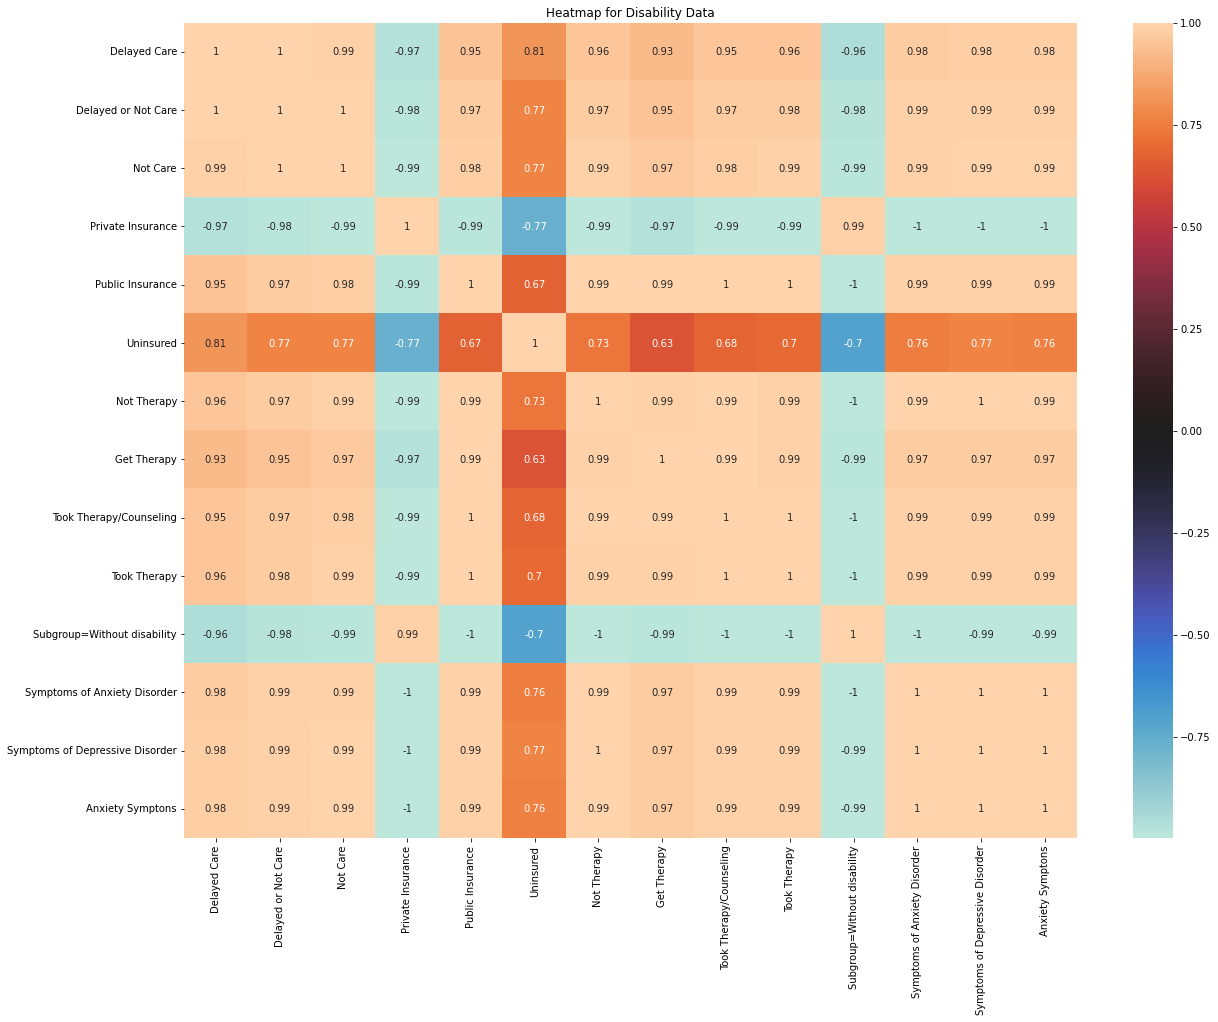

<Figure size 1440x1080 with 0 Axes>

In [ ]:
get_heatmap('Heatmap_for_Disability_Data', 'Heatmap for Disability Data', disability_data)

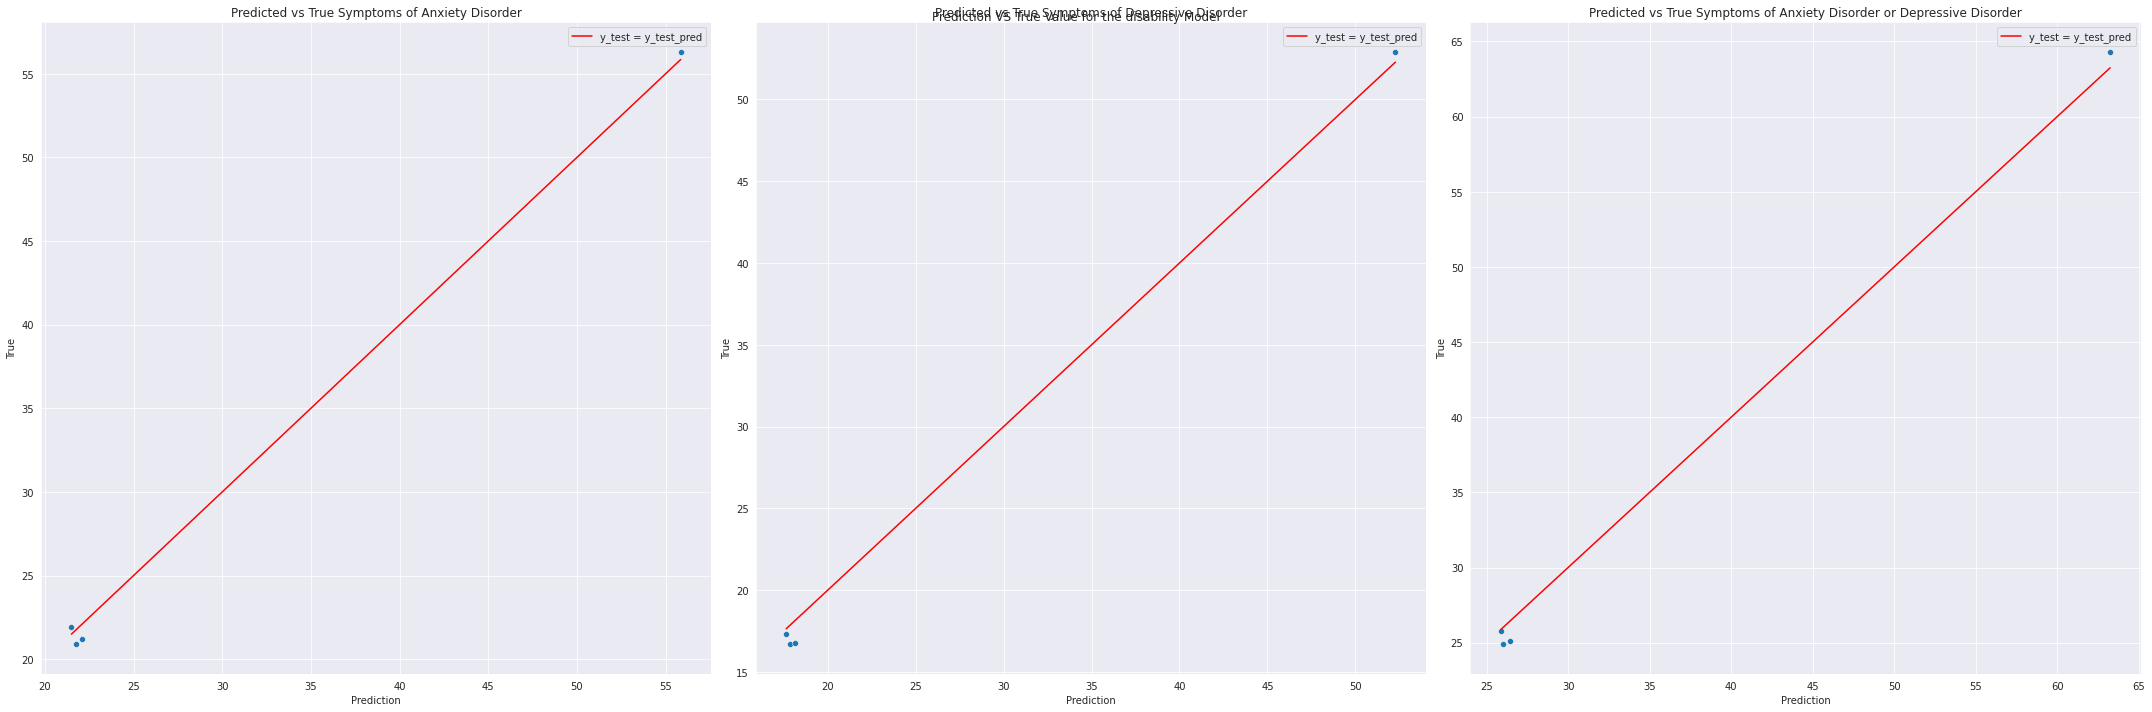

Symptoms of Anxiety Disorder  \
train R squared with l1                      0.997423   
test R squared with l1                       0.997866   

                         Symptoms of Depressive Disorder  \
train R squared with l1                         0.999444   
test R squared with l1                          0.996281   

                         Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared with l1                                           0.998291    
test R squared with l1                                            0.996298

<Figure size 2160x720 with 0 Axes>

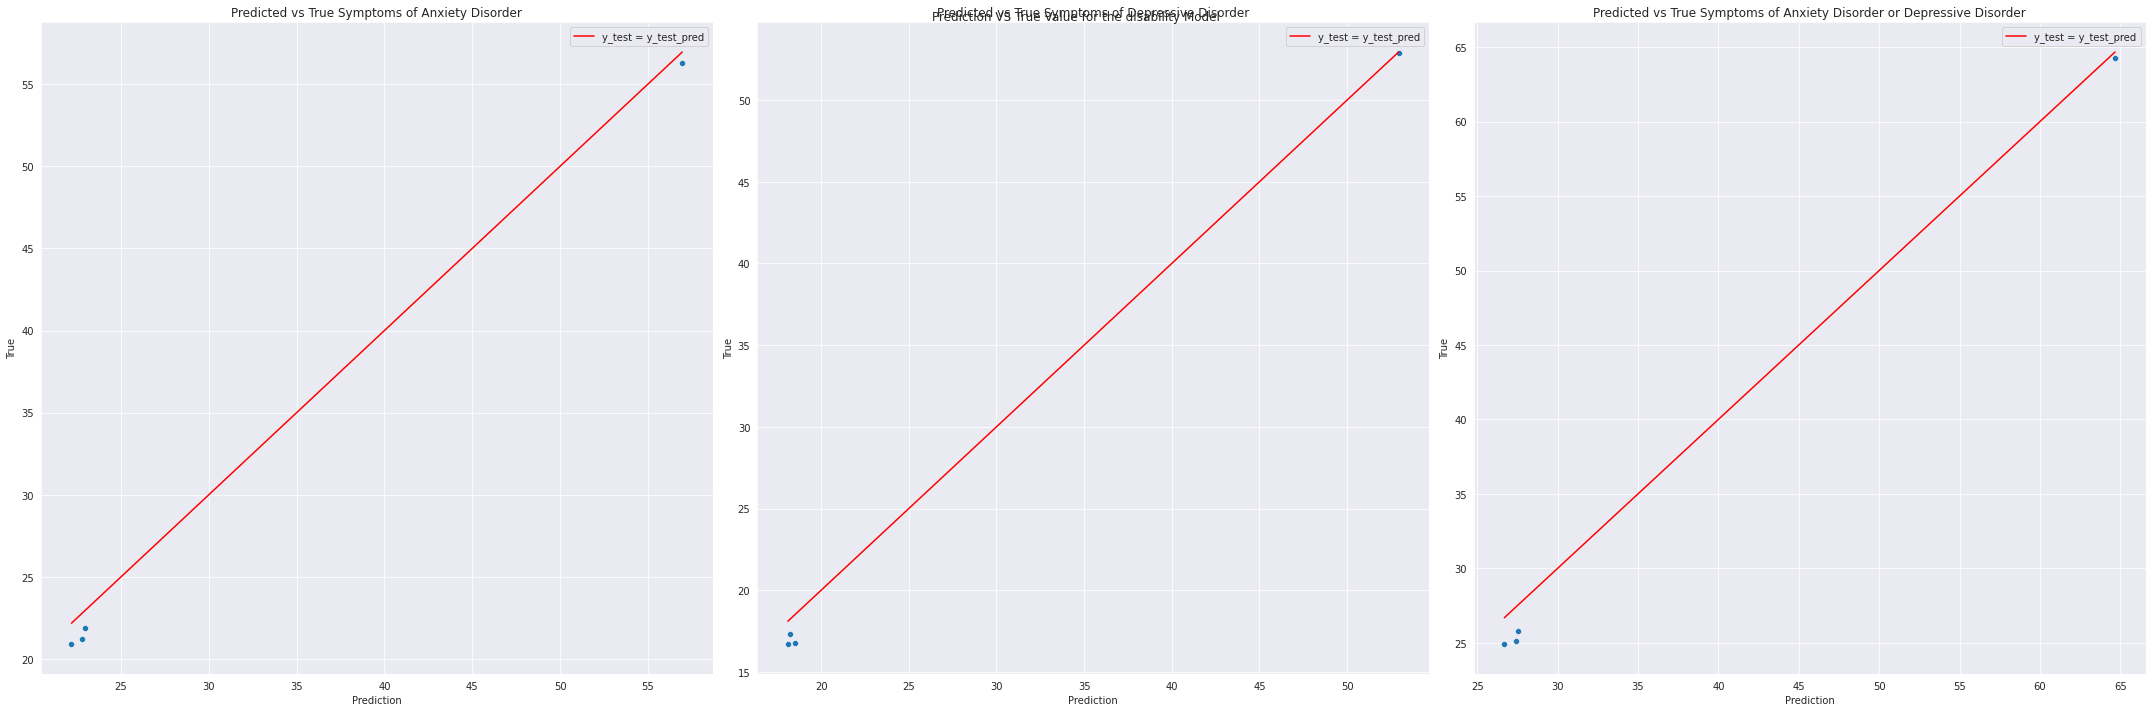

Symptoms of Anxiety Disorder  \
train R squared without l1                      1.000000   
train R squared without l1                      0.993917   

                            Symptoms of Depressive Disorder  \
train R squared without l1                         1.000000   
train R squared without l1                         0.994205   

                            Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared without l1                                           1.000000    
train R squared without l1                                           0.989851

<Figure size 2160x720 with 0 Axes>

In [ ]:
results1 = get_linear_regression_training_result(disability_X, disability_Y, 'disability', figure_path, with_l1_regularization = True)
display(results1)
results2 = get_linear_regression_training_result(disability_X, disability_Y, 'disability', figure_path, with_l1_regularization = False)
display(results2)

In [ ]:
drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}

for key in drop_dict:
    print(f"Disability Model with L1 regularization: {key}")
    disability_data_one_label = disability_data.drop(columns =drop_dict[key])
    disability_data_datasets = bootstrap_sample(disability_data_one_label, 1000)
    disability_models, features = create_models(disability_data_datasets, key, True)
    del disability_data_datasets
    display_model_coefs(disability_models, features)

for key in drop_dict:
    print(f"Disability Model without L1 regularization: {key}")
    disability_data_one_label = disability_data.drop(columns =drop_dict[key])
    disability_data_datasets = bootstrap_sample(disability_data_one_label, 1000)
    disability_models, features = create_models(disability_data_datasets, key, False)
    del disability_data_datasets
    display_model_coefs(disability_models, features)


Disability Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           42.626421  44.091582
Delayed Medical Care, Last 4 Weeks                   0.000000   5.860448
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   3.331099
Did Not Get Needed Care, Last 4 Weeks                0.000000   5.311197
Private Health Insurance Coverage                  -10.131246   0.000000
Public Health Insurance Coverage                     0.000000   1.766629
Uninsured at the Time of Interview                   0.000000   2.011776
Needed Counseling or Therapy But Did Not Get It...   0.000000  11.657196
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.006884
Took Prescription Medication for Mental Health ...   0.000000   6.263760
Took Prescription Medication for Mental Health,...   0.000000   5.051827
Subgroup=Without disability                        -13.707842   0.000000

Disability Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           36.765690  38.595062
Delayed Medical Care, Last 4 Weeks                   0.000000   4.870019
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   4.515780
Did Not Get Needed Care, Last 4 Weeks                0.000000   3.765305
Private Health Insurance Coverage                   -8.635477   0.000000
Public Health Insurance Coverage                     0.000000   1.413106
Uninsured at the Time of Interview                   0.000000   2.045628
Needed Counseling or Therapy But Did Not Get It...   0.000000  10.535714
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.340179
Took Prescription Medication for Mental Health ...   0.000000   4.417719
Took Prescription Medication for Mental Health,...   0.000000   8.040644
Subgroup=Without disability                        -15.079867   0.000000

Disability Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           32.718200  34.191713
Delayed Medical Care, Last 4 Weeks                   0.000000   4.077509
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   1.739292
Did Not Get Needed Care, Last 4 Weeks                0.000000   5.096674
Private Health Insurance Coverage                   -8.350138   0.000000
Public Health Insurance Coverage                     0.000000   0.848206
Uninsured at the Time of Interview                   0.000000   1.734111
Needed Counseling or Therapy But Did Not Get It...   0.000000  13.908780
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.635015
Took Prescription Medication for Mental Health ...   0.000000   6.629774
Took Prescription Medication for Mental Health,...   0.000000   5.309017
Subgroup=Without disability                         -8.087915   0.000000

Disability Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           41.681751  44.516686
Delayed Medical Care, Last 4 Weeks                  -8.767382  17.565918
Delayed or Did Not Get Care, Last 4 Weeks          -27.920431   5.231280
Did Not Get Needed Care, Last 4 Weeks               -4.337522  31.911070
Private Health Insurance Coverage                  -17.255604  12.070451
Public Health Insurance Coverage                   -28.184032  10.572445
Uninsured at the Time of Interview                  -8.518425   2.883242
Needed Counseling or Therapy But Did Not Get It...  -1.819228  32.466910
Received Counseling or Therapy, Last 4 Weeks       -21.647220   2.759914
Took Prescription Medication for Mental Health ...  -3.728851  27.639406
Took Prescription Medication for Mental Health,... -16.497901  12.386330
Subgroup=Without disability                        -17.488116   9.676146

Disability Model without L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           36.605472  38.579512
Delayed Medical Care, Last 4 Weeks                  -5.787552  12.947494
Delayed or Did Not Get Care, Last 4 Weeks          -17.433364   4.184445
Did Not Get Needed Care, Last 4 Weeks               -3.918324  20.674888
Private Health Insurance Coverage                  -11.694031   7.911808
Public Health Insurance Coverage                   -20.267045   5.963930
Uninsured at the Time of Interview                  -7.959638   1.692771
Needed Counseling or Therapy But Did Not Get It...  -0.478135  21.216686
Received Counseling or Therapy, Last 4 Weeks       -17.257892   2.104566
Took Prescription Medication for Mental Health ...  -2.654705  17.618129
Took Prescription Medication for Mental Health,...  -9.609427  11.433273
Subgroup=Without disability                        -17.054361  -0.219161

Disability Model without L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           32.198438  34.522494
Delayed Medical Care, Last 4 Weeks                  -9.048692  10.501639
Delayed or Did Not Get Care, Last 4 Weeks          -17.892935   4.725970
Did Not Get Needed Care, Last 4 Weeks               -2.573040  23.912403
Private Health Insurance Coverage                  -14.745395  10.922955
Public Health Insurance Coverage                   -24.230709   8.965774
Uninsured at the Time of Interview                  -5.780357   3.065415
Needed Counseling or Therapy But Did Not Get It...   0.501249  27.709454
Received Counseling or Therapy, Last 4 Weeks       -15.752510   3.635568
Took Prescription Medication for Mental Health ...  -4.209230  20.562471
Took Prescription Medication for Mental Health,... -10.243121  10.209226
Subgroup=Without disability                        -14.277717  10.271018

In [ ]:
print("Linear Regression without Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(disability_X, disability_Y, with_l1_regularization = False))
print("Linear Regression with Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(disability_X, disability_Y))
print("Random Forest Pridiction Result: ")
display(get_random_forest_r2(disability_X, disability_Y))
print("Gradient Boost Pridiction Result: ")
display(get_gradient_boost_r2(disability_X, disability_Y))

Linear Regression without Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                  1.000000e+00   
test R squared                   9.939171e-01   
train RMSE                       1.130467e-14   
test RMSE                        1.181231e+00   

                 Symptoms of Depressive Disorder  \
train R squared                         1.000000   
test R squared                          0.994205   
train RMSE                              4.164733   
test RMSE                               5.335035   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           1.000000    
test R squared                                            0.989851    
train RMSE                                                6.145120    
test RMSE                                                 4.327812

Linear Regression with Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.997423   
test R squared                       0.997866   
train RMSE                           0.781957   
test RMSE                            0.699694   

                 Symptoms of Depressive Disorder  \
train R squared                         0.999444   
test R squared                          0.996281   
train RMSE                              4.109658   
test RMSE                               4.480502   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.998291    
test R squared                                            0.996298    
train RMSE                                                6.184618    
test RMSE                                                 5.210646

Random Forest Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.996217   
test R squared                       0.985407   
train RMSE                           0.947416   
test RMSE                            1.829595   

                 Symptoms of Depressive Disorder  \
train R squared                         0.997286   
test R squared                          0.987472   
train RMSE                              4.710249   
test RMSE                               5.319757   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.998688    
test R squared                                            0.990728    
train RMSE                                                5.942119    
test RMSE                                                 5.395430

Gradient Boost Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      1.000000   
test R squared                       0.996547   
train RMSE                           0.000412   
test RMSE                            0.889951   

                 Symptoms of Depressive Disorder  \
train R squared                         1.000000   
test R squared                          0.998106   
train RMSE                              4.164748   
test RMSE                               4.226352   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           1.000000    
test R squared                                            0.995984    
train RMSE                                                6.145216    
test RMSE                                                 5.657629

### Section 4.2.3: Mental Health Prediction By Education

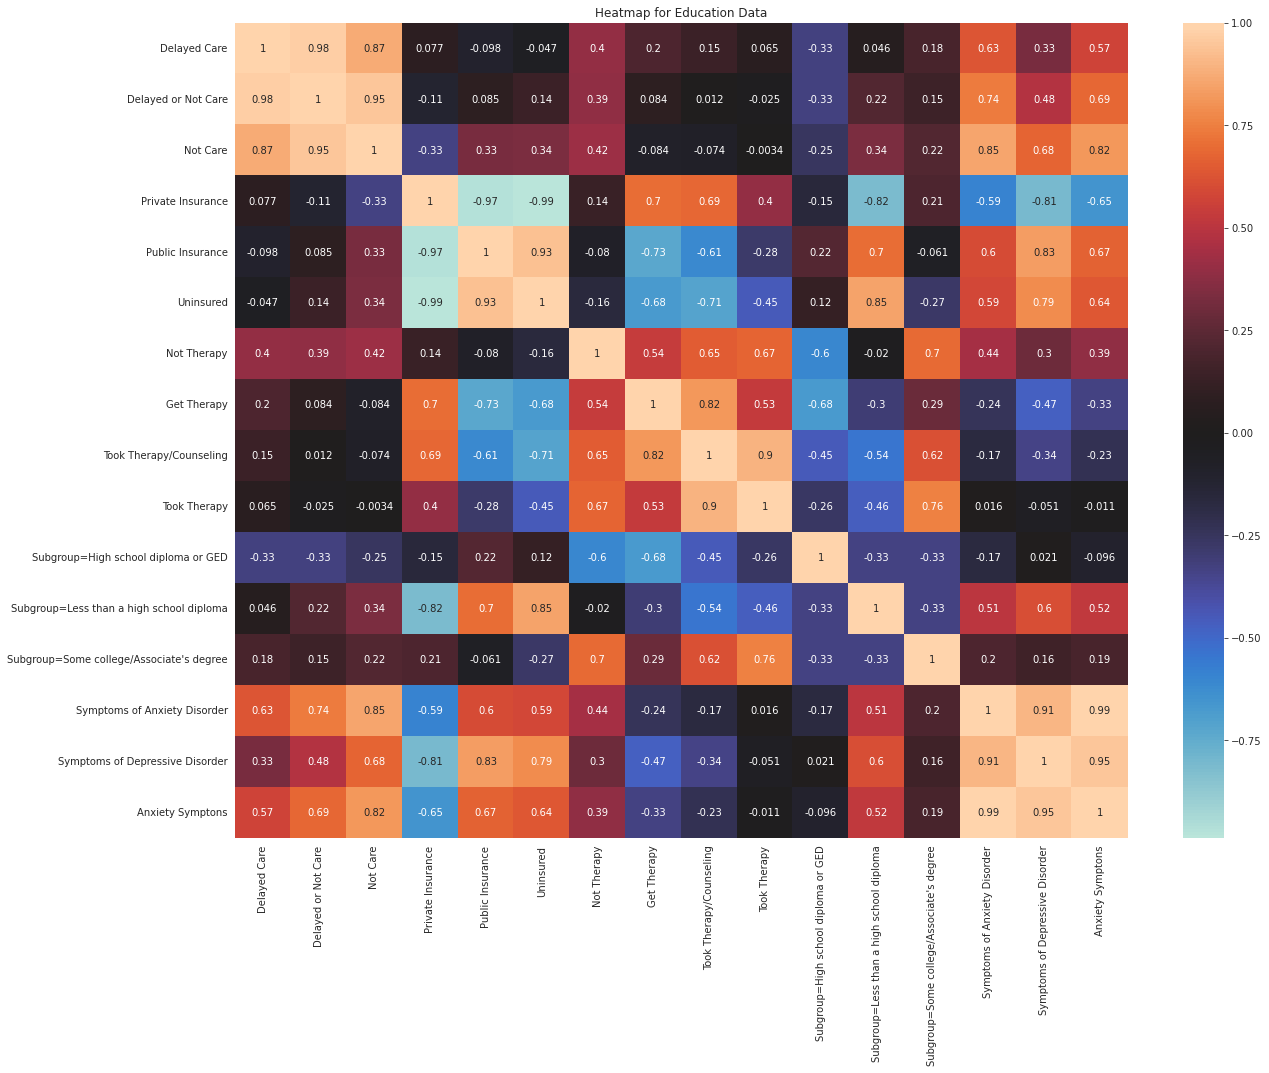

<Figure size 1440x1080 with 0 Axes>

In [ ]:
get_heatmap('Heatmap_for_Education_Data', 'Heatmap for Education Data', education_data)

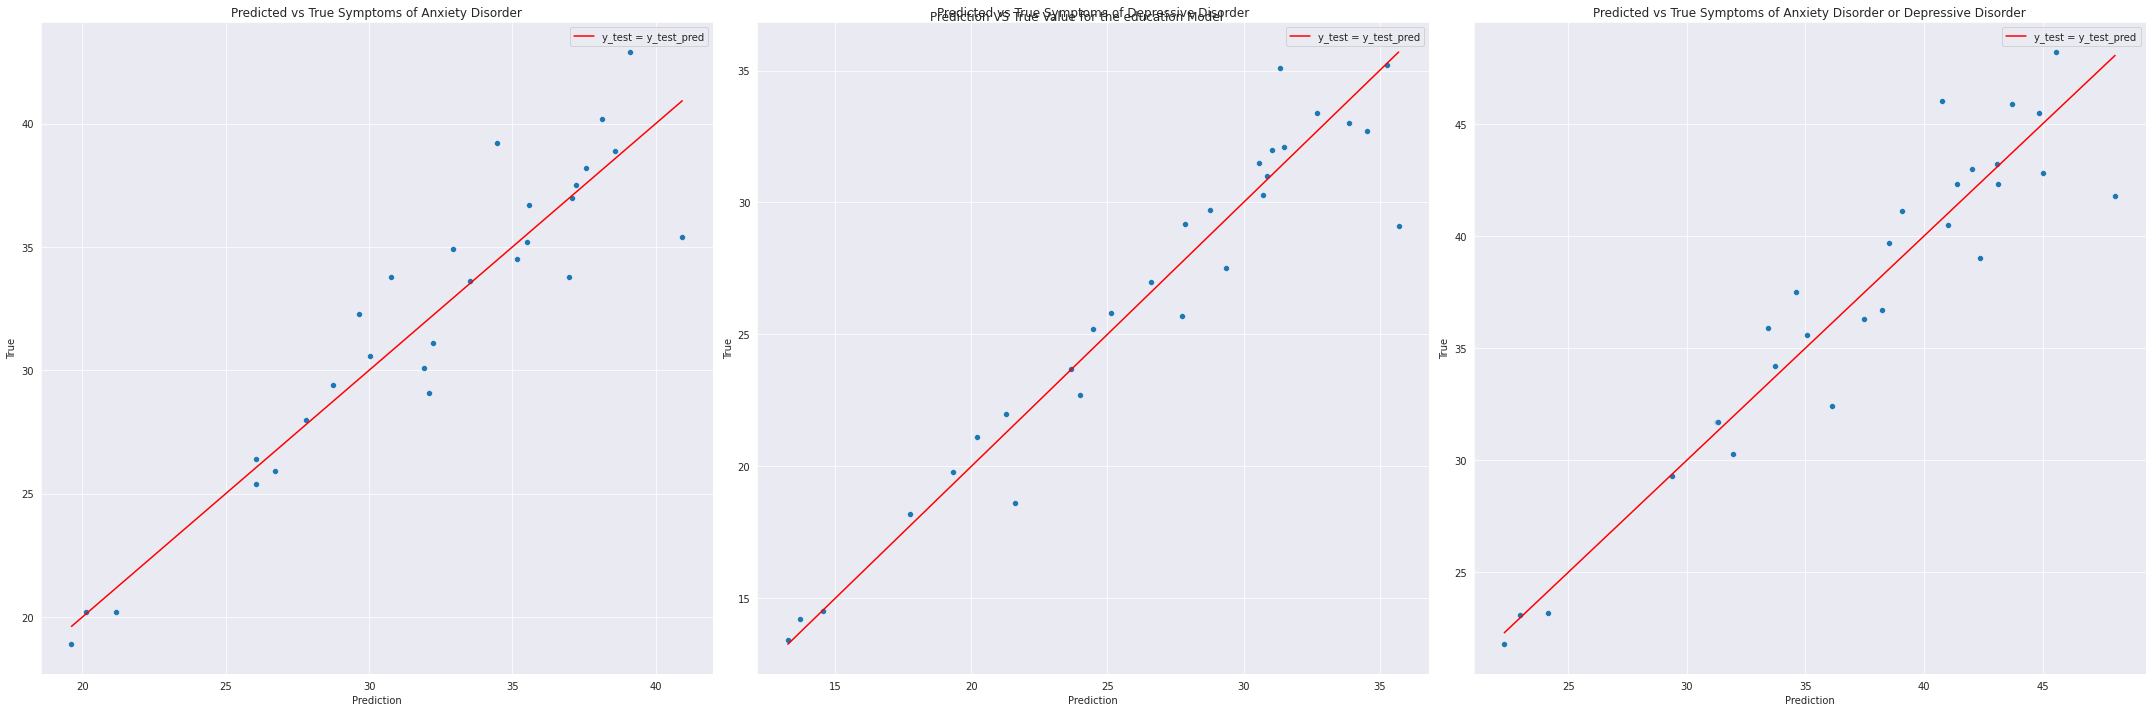

Symptoms of Anxiety Disorder  \
train R squared with l1                      0.907543   
test R squared with l1                       0.884322   

                         Symptoms of Depressive Disorder  \
train R squared with l1                         0.937147   
test R squared with l1                          0.922140   

                         Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared with l1                                           0.904701    
test R squared with l1                                            0.899580

<Figure size 2160x720 with 0 Axes>

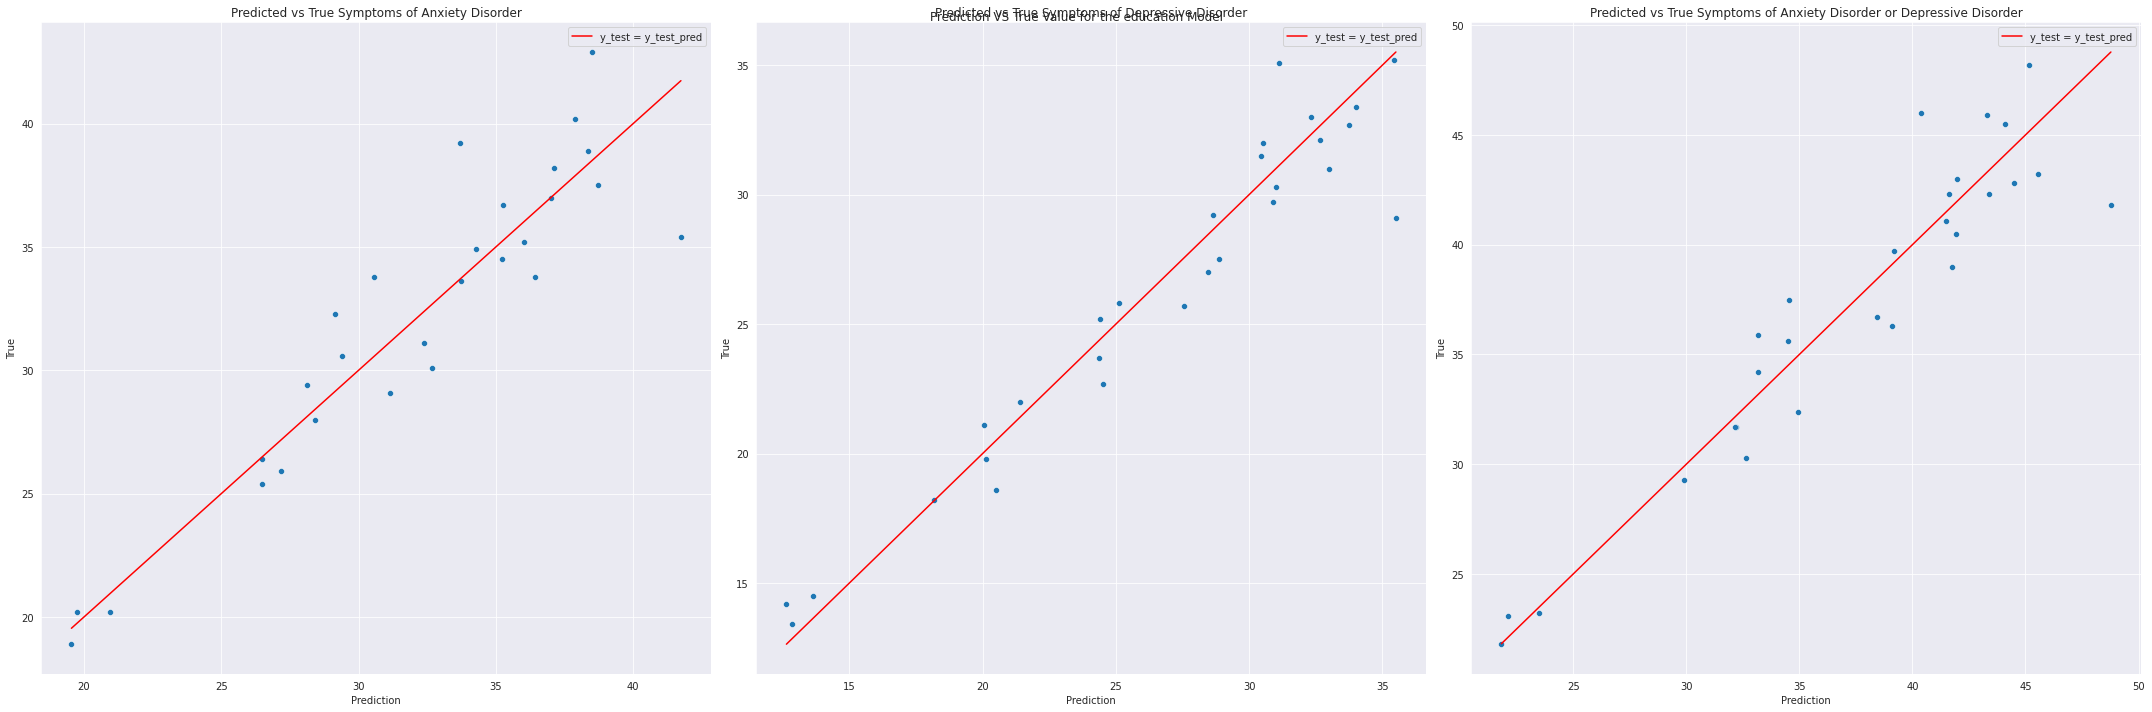

Symptoms of Anxiety Disorder  \
train R squared without l1                      0.925917   
train R squared without l1                      0.857661   

                            Symptoms of Depressive Disorder  \
train R squared without l1                         0.956917   
train R squared without l1                         0.921120   

                            Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared without l1                                           0.932159    
train R squared without l1                                           0.883291

<Figure size 2160x720 with 0 Axes>

In [ ]:
results1 = get_linear_regression_training_result(education_X, education_Y, 'education', figure_path, with_l1_regularization = True)
display(results1)
results2 = get_linear_regression_training_result(education_X, education_Y, 'education', figure_path, with_l1_regularization = False)
display(results2)

In [ ]:
drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}

for key in drop_dict:
    print(f"Education Model with L1 regularization: {key}")
    education_data_one_label = education_data.drop(columns =drop_dict[key])
    education_data_datasets = bootstrap_sample(education_data_one_label, 1000)
    education_models, features = create_models(education_data_datasets, key, True)
    del education_data_datasets
    display_model_coefs(education_models, features)
    
for key in drop_dict:
    print(f"Education Model without L1 regularization: {key}")
    education_data_one_label = education_data.drop(columns =drop_dict[key])
    education_data_datasets = bootstrap_sample(education_data_one_label, 1000)
    education_models, features = create_models(education_data_datasets, key, False)
    del education_data_datasets
    display_model_coefs(education_models, features)

Education Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           37.715860  38.629077
Delayed Medical Care, Last 4 Weeks                   0.000000   3.508436
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   4.032839
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.149432
Private Health Insurance Coverage                   -3.837268   0.000000
Public Health Insurance Coverage                     0.000000   4.442163
Uninsured at the Time of Interview                   0.000000   3.369161
Needed Counseling or Therapy But Did Not Get It...   0.726613   2.879328
Received Counseling or Therapy, Last 4 Weeks        -1.934832   0.000000
Took Prescription Medication for Mental Health ...   0.000000   0.599370
Took Prescription Medication for Mental Health,...   0.000000   1.163207
Subgroup=High school diploma or GED                  0.000000   1.413569
Subgroup=Less than a high school diploma             0.000000   0.244876
Subgroup=Some college/Associate's degree            -0.367755   0.457090

Education Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           32.501839  33.285078
Delayed Medical Care, Last 4 Weeks                   0.000000   3.351359
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   3.615597
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.751277
Private Health Insurance Coverage                   -3.333911   0.000000
Public Health Insurance Coverage                     0.000000   3.154234
Uninsured at the Time of Interview                   0.000000   3.259998
Needed Counseling or Therapy But Did Not Get It...   0.730842   2.519020
Received Counseling or Therapy, Last 4 Weeks        -1.411410   0.000000
Took Prescription Medication for Mental Health ...  -0.000000   0.400542
Took Prescription Medication for Mental Health,...   0.000000   0.991986
Subgroup=High school diploma or GED                  0.000000   0.989244
Subgroup=Less than a high school diploma             0.000000   0.000000
Subgroup=Some college/Associate's degree            -0.425634   0.235544

Education Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           26.810985  27.557432
Delayed Medical Care, Last 4 Weeks                   0.000000   1.361796
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   2.305469
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.231699
Private Health Insurance Coverage                   -4.568086   0.000000
Public Health Insurance Coverage                     0.000000   4.702164
Uninsured at the Time of Interview                   0.000000   3.015378
Needed Counseling or Therapy But Did Not Get It...   0.802351   2.735689
Received Counseling or Therapy, Last 4 Weeks        -0.924774   0.000000
Took Prescription Medication for Mental Health ...   0.000000   0.000000
Took Prescription Medication for Mental Health,...   0.000000   0.956692
Subgroup=High school diploma or GED                  0.106118   1.659273
Subgroup=Less than a high school diploma             0.000000   0.000000
Subgroup=Some college/Associate's degree             0.000000   0.677963

Education Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           37.675099  38.668802
Delayed Medical Care, Last 4 Weeks                 -10.541127   4.898296
Delayed or Did Not Get Care, Last 4 Weeks           -1.337379  20.588482
Did Not Get Needed Care, Last 4 Weeks               -8.757670   1.442734
Private Health Insurance Coverage                  -13.859241  12.427797
Public Health Insurance Coverage                    -6.460208   6.559493
Uninsured at the Time of Interview                  -7.783270   8.135434
Needed Counseling or Therapy But Did Not Get It...   1.025718   4.026945
Received Counseling or Therapy, Last 4 Weeks        -5.763166   0.113926
Took Prescription Medication for Mental Health ...   0.080977  12.190947
Took Prescription Medication for Mental Health,...  -7.177864   1.582081
Subgroup=High school diploma or GED                 -1.450524  10.617117
Subgroup=Less than a high school diploma            -5.423255  14.819140
Subgroup=Some college/Associate's degree            -1.610923   5.960744

Education Model without L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           32.458170  33.369804
Delayed Medical Care, Last 4 Weeks                  -8.586804   5.730611
Delayed or Did Not Get Care, Last 4 Weeks           -3.076212  16.137243
Did Not Get Needed Care, Last 4 Weeks               -6.495212   1.722748
Private Health Insurance Coverage                  -13.345774   9.465081
Public Health Insurance Coverage                    -6.498277   5.425708
Uninsured at the Time of Interview                  -6.021212   7.876968
Needed Counseling or Therapy But Did Not Get It...   0.754718   3.710659
Received Counseling or Therapy, Last 4 Weeks        -5.018132   0.499029
Took Prescription Medication for Mental Health ...  -0.907335  10.461817
Took Prescription Medication for Mental Health,...  -5.857414   1.882156
Subgroup=High school diploma or GED                 -3.173931   7.291383
Subgroup=Less than a high school diploma            -6.924272   9.925877
Subgroup=Some college/Associate's degree            -2.531055   3.980170

Education Model without L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           26.779808  27.540078
Delayed Medical Care, Last 4 Weeks                  -9.666635   1.707853
Delayed or Did Not Get Care, Last 4 Weeks            0.558347  16.132659
Did Not Get Needed Care, Last 4 Weeks               -6.509905   0.716459
Private Health Insurance Coverage                  -13.011503   7.111906
Public Health Insurance Coverage                    -6.118059   3.779056
Uninsured at the Time of Interview                  -6.683414   4.974806
Needed Counseling or Therapy But Did Not Get It...   0.971450   3.309971
Received Counseling or Therapy, Last 4 Weeks        -2.828864   1.084832
Took Prescription Medication for Mental Health ...  -1.416058   8.756629
Took Prescription Medication for Mental Health,...  -5.352565   1.793712
Subgroup=High school diploma or GED                  1.726860  11.567864
Subgroup=Less than a high school diploma            -0.910731  14.970765
Subgroup=Some college/Associate's degree             0.517935   6.615186

In [ ]:
print("Linear Regression without Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(education_X, education_Y, with_l1_regularization = False))
print("Linear Regression with Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(education_X, education_Y))
print("Random Forest Pridiction Result: ")
display(get_random_forest_r2(education_X, education_Y))
print("Gradient Boost Pridiction Result: ")
display(get_gradient_boost_r2(education_X, education_Y))

Linear Regression without Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.925917   
test R squared                       0.857661   
train RMSE                           1.497074   
test RMSE                            2.306194   

                 Symptoms of Depressive Disorder  \
train R squared                         0.956917   
test R squared                          0.921120   
train RMSE                              6.310109   
test RMSE                               6.489546   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.932159    
test R squared                                            0.883291    
train RMSE                                                5.728408    
test RMSE                                                 5.781116

Linear Regression with Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.907543   
test R squared                       0.884322   
train RMSE                           1.672451   
test RMSE                            2.079020   

                 Symptoms of Depressive Disorder  \
train R squared                         0.937147   
test R squared                          0.922140   
train RMSE                              6.345882   
test RMSE                               6.455464   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.904701    
test R squared                                            0.899580    
train RMSE                                                5.819650    
test RMSE                                                 5.752488

Random Forest Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.967319   
test R squared                       0.820406   
train RMSE                           0.994336   
test RMSE                            2.590481   

                 Symptoms of Depressive Disorder  \
train R squared                         0.973785   
test R squared                          0.866501   
train RMSE                              6.402968   
test RMSE                               7.186086   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.963393    
test R squared                                            0.809864    
train RMSE                                                5.600152    
test RMSE                                                 5.720951

Gradient Boost Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.999456   
test R squared                       0.852618   
train RMSE                           0.128279   
test RMSE                            2.346693   

                 Symptoms of Depressive Disorder  \
train R squared                         0.999849   
test R squared                          0.888184   
train RMSE                              6.265975   
test RMSE                               7.143021   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.999409    
test R squared                                            0.878429    
train RMSE                                                5.517775    
test RMSE                                                 5.642548

### Section 4.2.4: Mental Health Prediction By Race/Hispanic ethnicity

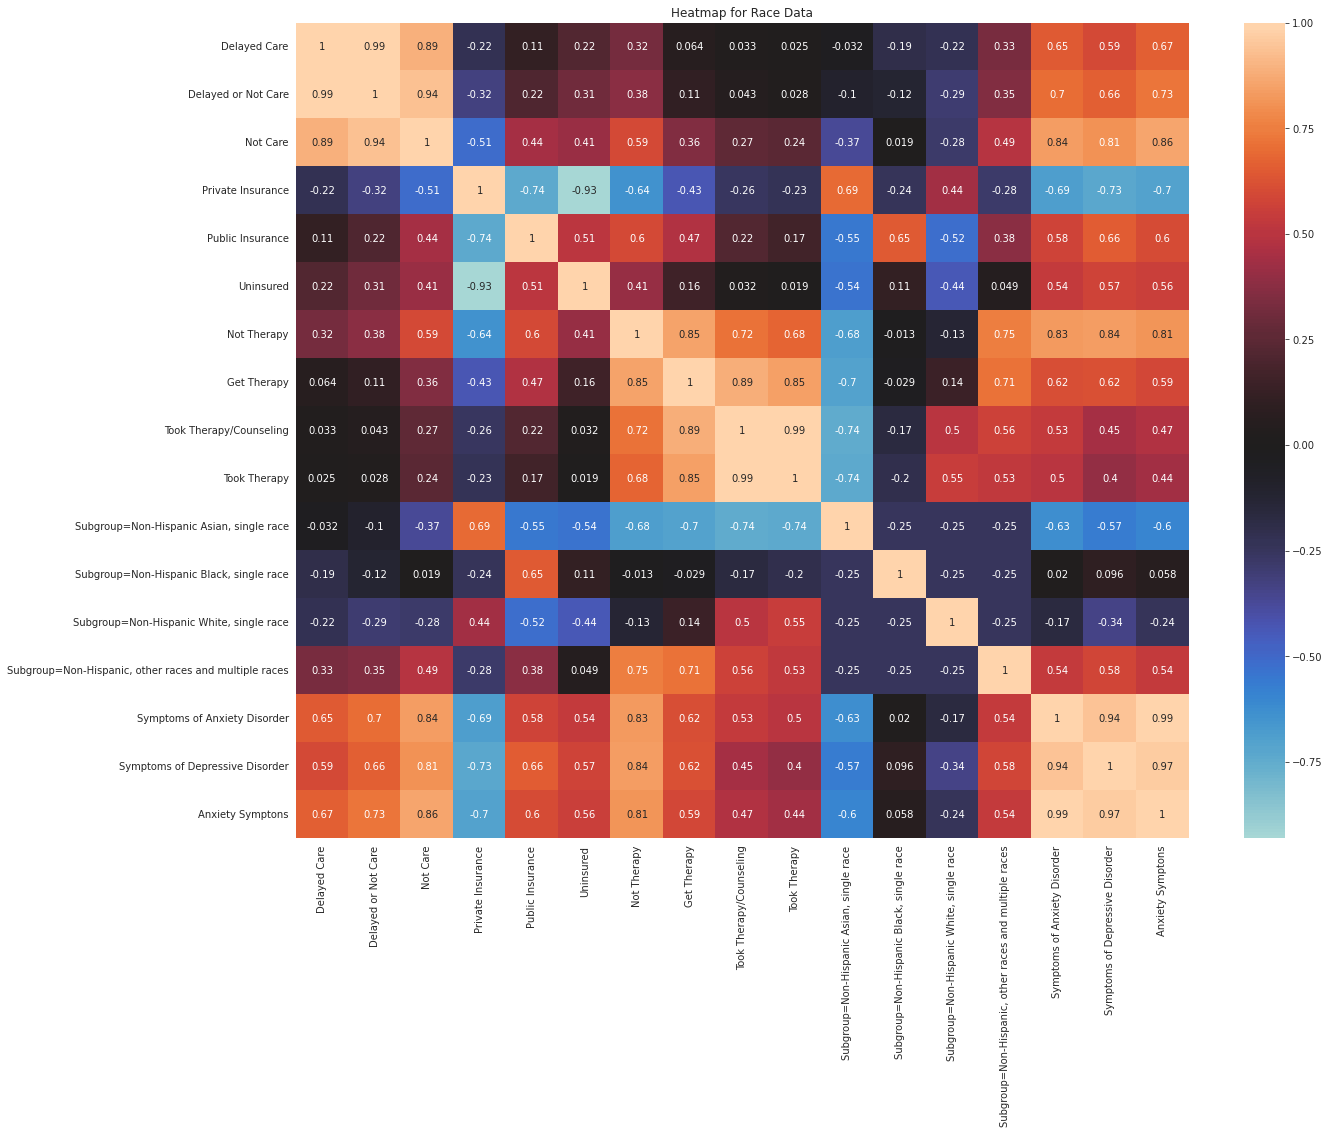

<Figure size 1440x1080 with 0 Axes>

In [ ]:
get_heatmap('Heatmap_for_Race_Data', 'Heatmap for Race Data', race_data)

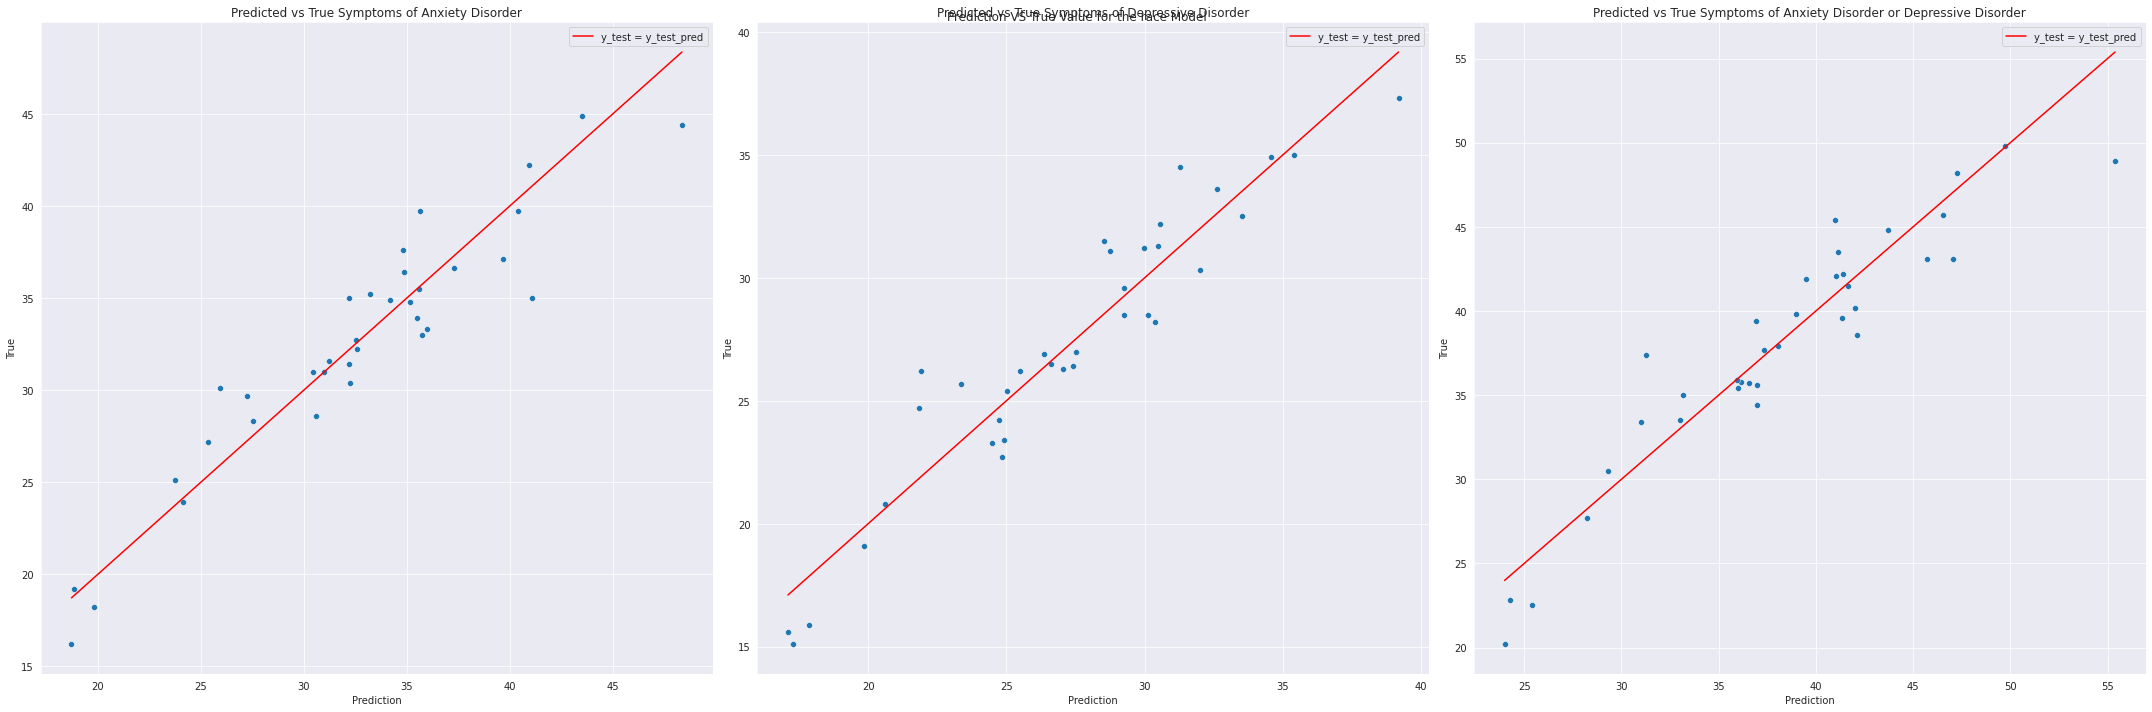

Symptoms of Anxiety Disorder  \
train R squared with l1                      0.942295   
test R squared with l1                       0.886923   

                         Symptoms of Depressive Disorder  \
train R squared with l1                         0.907664   
test R squared with l1                          0.903317   

                         Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared with l1                                           0.941840    
test R squared with l1                                            0.878431

<Figure size 2160x720 with 0 Axes>

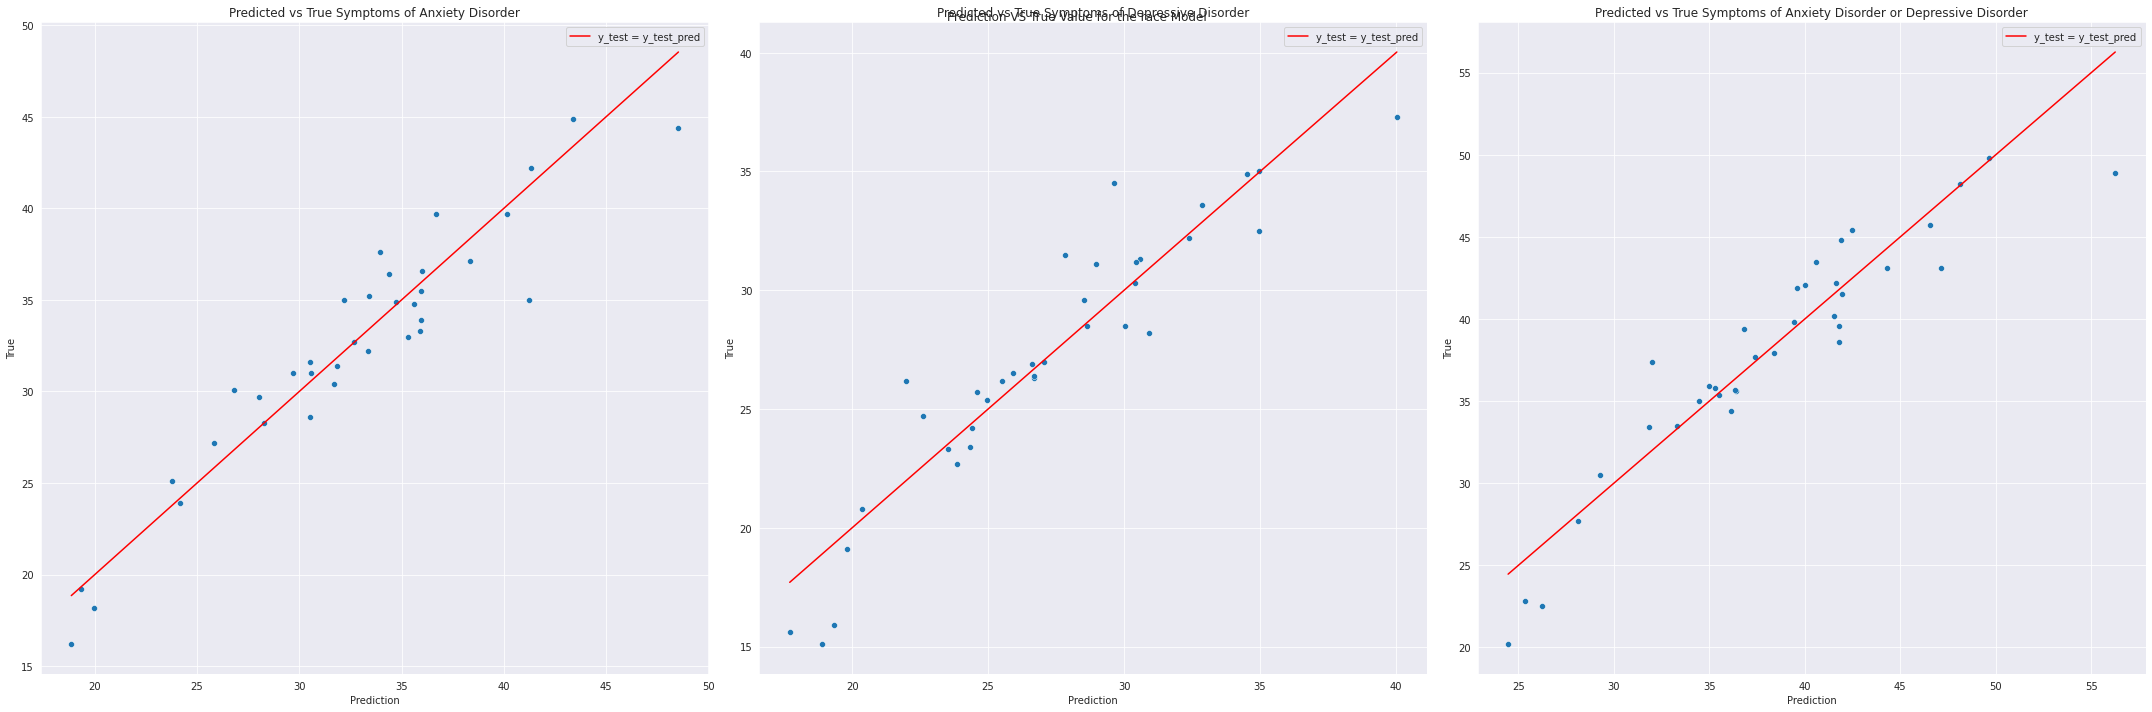

Symptoms of Anxiety Disorder  \
train R squared without l1                      0.950702   
train R squared without l1                      0.895842   

                            Symptoms of Depressive Disorder  \
train R squared without l1                         0.924076   
train R squared without l1                         0.878915   

                            Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared without l1                                           0.950888    
train R squared without l1                                           0.878163

<Figure size 2160x720 with 0 Axes>

In [ ]:
results1 = get_linear_regression_training_result(race_X, race_Y, 'race', figure_path, with_l1_regularization = True)
display(results1)
results2 = get_linear_regression_training_result(race_X, race_Y, 'race', figure_path, with_l1_regularization = False)
display(results2)

In [ ]:
drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}
for key in drop_dict:
    print(f"Race Model with L1 regularization: {key}")
    race_data_one_label = race_data.drop(columns =drop_dict[key])
    race_data_datasets = bootstrap_sample(race_data_one_label, 1000)
    race_models, features = create_models(race_data_datasets, key, True)
    del race_data_datasets
    display_model_coefs(race_models, features)
for key in drop_dict:
    print(f"Race Model without L1 regularization: {key}")
    race_data_one_label = race_data.drop(columns =drop_dict[key])
    race_data_datasets = bootstrap_sample(race_data_one_label, 1000)
    race_models, features = create_models(race_data_datasets, key, False)
    del race_data_datasets
    display_model_coefs(race_models, features)

Race Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           37.850505  38.676577
Delayed Medical Care, Last 4 Weeks                   0.000000   3.507689
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   3.713163
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.988872
Private Health Insurance Coverage                   -1.805686   0.000000
Public Health Insurance Coverage                     0.000000   1.729063
Uninsured at the Time of Interview                   0.000000   1.413393
Needed Counseling or Therapy But Did Not Get It...   1.782574   3.861766
Received Counseling or Therapy, Last 4 Weeks         0.000000   1.210389
Took Prescription Medication for Mental Health ...   0.000000   1.330389
Took Prescription Medication for Mental Health,...   0.000000   0.400591
Subgroup=Non-Hispanic Asian, single race            -0.810310   0.000000
Subgroup=Non-Hispanic Black, single race            -0.325324   0.427669
Subgroup=Non-Hispanic White, single race            -0.000000   0.273183
Subgroup=Non-Hispanic, other races and multiple...  -1.347953   0.000000

Race Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           32.280751  33.044430
Delayed Medical Care, Last 4 Weeks                   0.000000   3.422862
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   3.420752
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.216972
Private Health Insurance Coverage                   -1.850790   0.000000
Public Health Insurance Coverage                     0.000000   1.844675
Uninsured at the Time of Interview                   0.000000   1.247897
Needed Counseling or Therapy But Did Not Get It...   1.594532   3.632720
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.600940
Took Prescription Medication for Mental Health ...   0.000000   1.821355
Took Prescription Medication for Mental Health,...   0.000000   1.529613
Subgroup=Non-Hispanic Asian, single race            -0.775487   0.000000
Subgroup=Non-Hispanic Black, single race            -0.620651   0.045750
Subgroup=Non-Hispanic White, single race             0.000000   0.733829
Subgroup=Non-Hispanic, other races and multiple...  -1.366314  -0.030902

Race Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           27.011165  27.674256
Delayed Medical Care, Last 4 Weeks                   0.000000   1.854856
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   2.290623
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.301258
Private Health Insurance Coverage                   -1.427150   0.000000
Public Health Insurance Coverage                     0.000000   1.177944
Uninsured at the Time of Interview                   0.000000   1.051378
Needed Counseling or Therapy But Did Not Get It...   1.426533   3.238700
Received Counseling or Therapy, Last 4 Weeks         0.000000   1.239446
Took Prescription Medication for Mental Health ...   0.000000   0.000000
Took Prescription Medication for Mental Health,...   0.000000   0.000000
Subgroup=Non-Hispanic Asian, single race             0.000000   0.000000
Subgroup=Non-Hispanic Black, single race             0.000000   0.580255
Subgroup=Non-Hispanic White, single race            -0.658602   0.000000
Subgroup=Non-Hispanic, other races and multiple...  -0.779244   0.000000

Race Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           37.860734  38.671864
Delayed Medical Care, Last 4 Weeks                  -3.377473   7.306999
Delayed or Did Not Get Care, Last 4 Weeks           -5.930704   8.021360
Did Not Get Needed Care, Last 4 Weeks               -2.370209   3.730418
Private Health Insurance Coverage                   -4.448536   5.441944
Public Health Insurance Coverage                    -0.059317   4.197650
Uninsured at the Time of Interview                  -1.821410   5.953936
Needed Counseling or Therapy But Did Not Get It...   1.991836   4.519184
Received Counseling or Therapy, Last 4 Weeks        -2.645772   1.107642
Took Prescription Medication for Mental Health ...   1.743486  12.673637
Took Prescription Medication for Mental Health,...  -9.564556   1.639659
Subgroup=Non-Hispanic Asian, single race            -0.159367   5.003525
Subgroup=Non-Hispanic Black, single race            -1.426116   1.288292
Subgroup=Non-Hispanic White, single race            -2.272687   2.910633
Subgroup=Non-Hispanic, other races and multiple...  -3.532088  -0.313928

Race Model without L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           32.327619  33.003633
Delayed Medical Care, Last 4 Weeks                  -2.714265   7.123660
Delayed or Did Not Get Care, Last 4 Weeks           -5.956194   6.672561
Did Not Get Needed Care, Last 4 Weeks               -2.234992   3.526523
Private Health Insurance Coverage                   -3.725327   3.970212
Public Health Insurance Coverage                     0.602805   4.209333
Uninsured at the Time of Interview                  -1.718522   4.803798
Needed Counseling or Therapy But Did Not Get It...   2.089524   4.292901
Received Counseling or Therapy, Last 4 Weeks        -2.584896   0.568835
Took Prescription Medication for Mental Health ...   0.804341  11.296903
Took Prescription Medication for Mental Health,...  -7.963811   2.687880
Subgroup=Non-Hispanic Asian, single race            -0.076595   4.617085
Subgroup=Non-Hispanic Black, single race            -1.534045   0.832439
Subgroup=Non-Hispanic White, single race            -1.198305   2.892263
Subgroup=Non-Hispanic, other races and multiple...  -3.140512  -0.588156

Race Model without L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           26.993551  27.663463
Delayed Medical Care, Last 4 Weeks                  -4.934690   5.135583
Delayed or Did Not Get Care, Last 4 Weeks           -4.281350   7.520943
Did Not Get Needed Care, Last 4 Weeks               -1.860137   3.014488
Private Health Insurance Coverage                   -4.973593   3.641354
Public Health Insurance Coverage                    -2.018002   2.432914
Uninsured at the Time of Interview                  -2.694206   4.220457
Needed Counseling or Therapy But Did Not Get It...   1.534568   3.843531
Received Counseling or Therapy, Last 4 Weeks        -1.026115   1.882935
Took Prescription Medication for Mental Health ...   0.198810  10.074831
Took Prescription Medication for Mental Health,...  -8.056287   1.299425
Subgroup=Non-Hispanic Asian, single race            -0.559530   3.940134
Subgroup=Non-Hispanic Black, single race            -0.809932   1.564554
Subgroup=Non-Hispanic White, single race            -2.704167   1.769603
Subgroup=Non-Hispanic, other races and multiple...  -2.854547  -0.046756

In [ ]:
print("Linear Regression without Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(race_X, race_Y, with_l1_regularization = False))
print("Linear Regression with Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(race_X, race_Y))
print("Random Forest Pridiction Result: ")
display(get_random_forest_r2(race_X, race_Y))
print("Gradient Boost Pridiction Result: ")
display(get_gradient_boost_r2(race_X, race_Y))

Linear Regression without Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.950702   
test R squared                       0.895842   
train RMSE                           1.459374   
test RMSE                            2.096072   

                 Symptoms of Depressive Disorder  \
train R squared                         0.924076   
test R squared                          0.878915   
train RMSE                              5.819565   
test RMSE                               5.905201   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.950888    
test R squared                                            0.878163    
train RMSE                                                5.913075    
test RMSE                                                 5.914477

Linear Regression with Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.942295   
test R squared                       0.886923   
train RMSE                           1.578918   
test RMSE                            2.183971   

                 Symptoms of Depressive Disorder  \
train R squared                         0.907664   
test R squared                          0.903317   
train RMSE                              5.806795   
test RMSE                               5.943273   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.941840    
test R squared                                            0.878431    
train RMSE                                                5.947226    
test RMSE                                                 5.971836

Random Forest Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.980471   
test R squared                       0.838196   
train RMSE                           0.918526   
test RMSE                            2.612490   

                 Symptoms of Depressive Disorder  \
train R squared                         0.977971   
test R squared                          0.871818   
train RMSE                              5.671755   
test RMSE                               5.911035   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.982526    
test R squared                                            0.879444    
train RMSE                                                5.832523    
test RMSE                                                 6.018787

Gradient Boost Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.999335   
test R squared                       0.877637   
train RMSE                           0.169452   
test RMSE                            2.271881   

                 Symptoms of Depressive Disorder  \
train R squared                         0.999151   
test R squared                          0.889832   
train RMSE                              5.776270   
test RMSE                               5.794920   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.999256    
test R squared                                            0.906996    
train RMSE                                                5.753691    
test RMSE                                                 5.964020

### Section 4.2.5: Mental Health Prediction By Sex

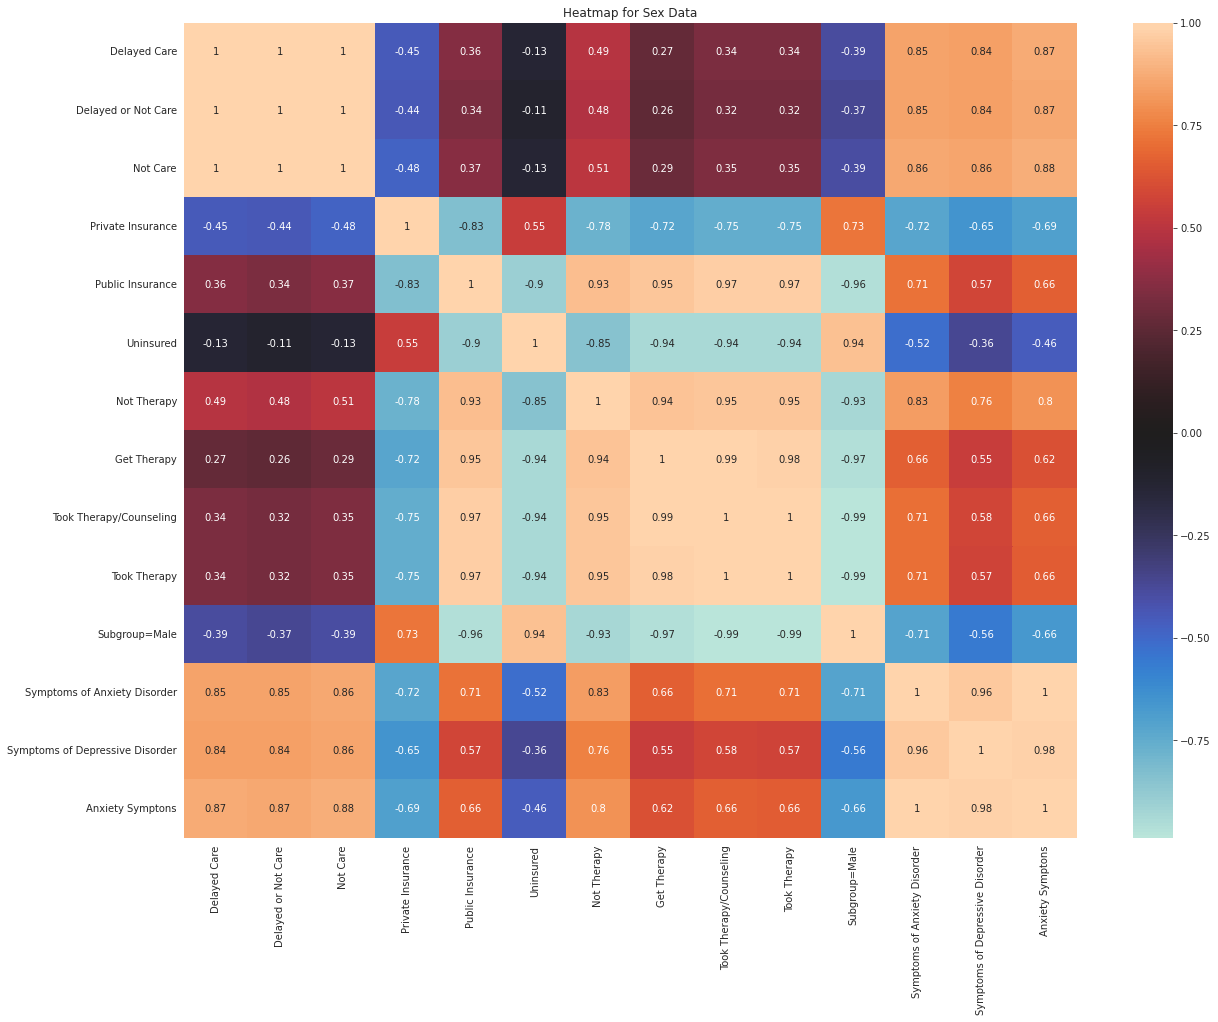

<Figure size 1440x1080 with 0 Axes>

In [ ]:
get_heatmap('Heatmap_for_Sex_Data', 'Heatmap for Sex Data', sex_data)

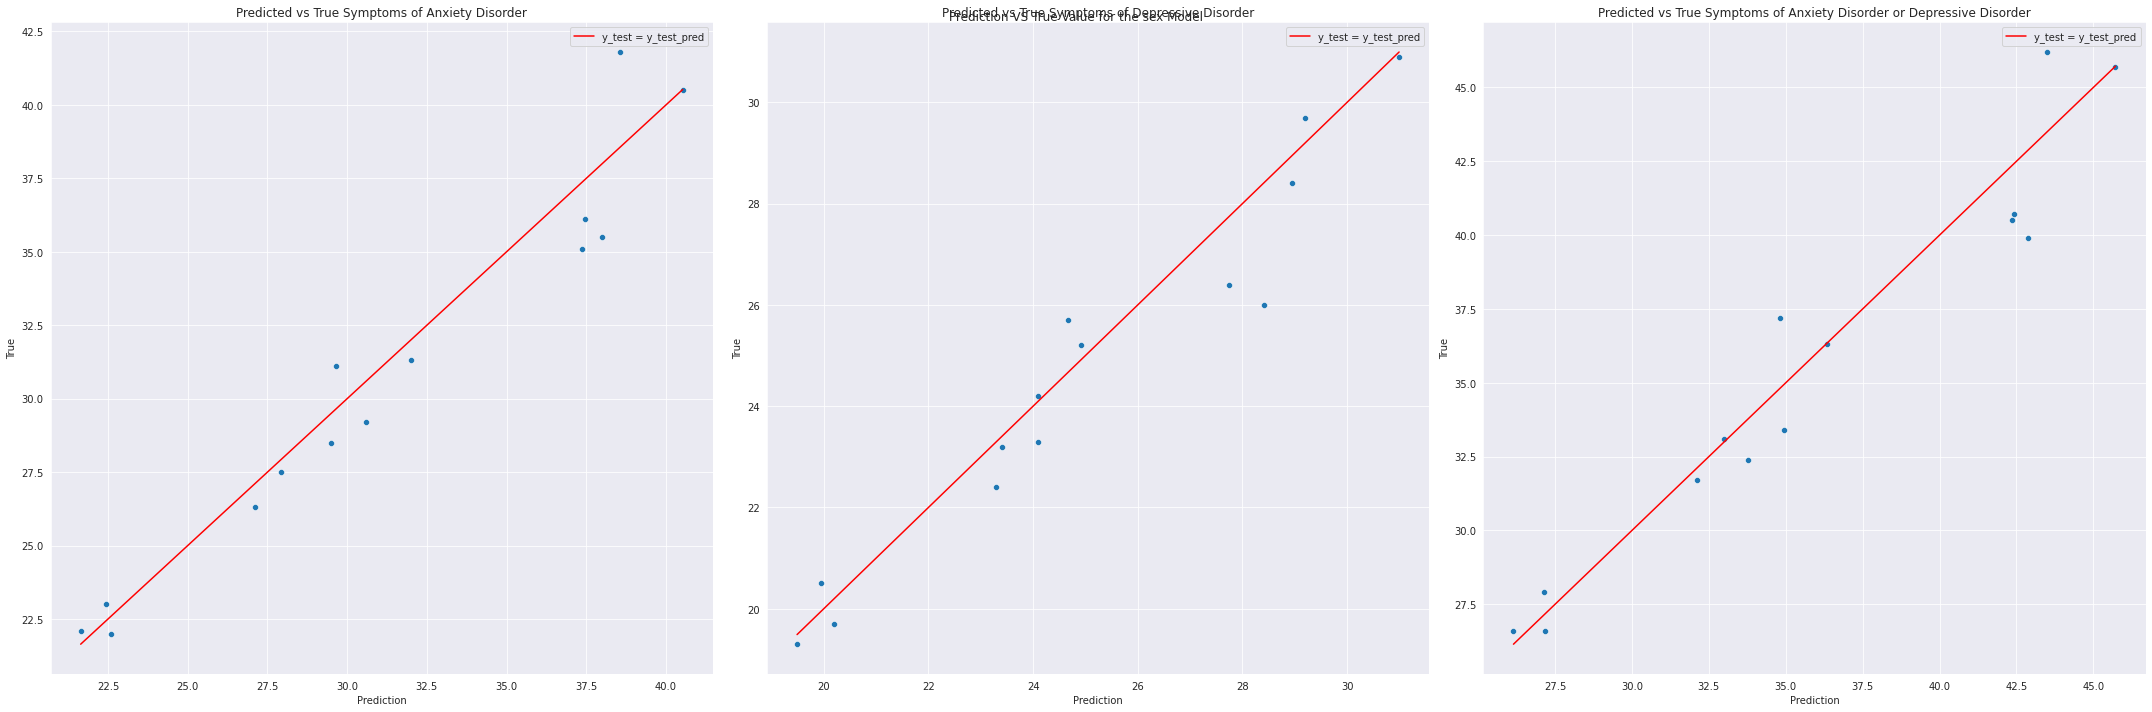

Symptoms of Anxiety Disorder  \
train R squared with l1                      0.957723   
test R squared with l1                       0.942297   

                         Symptoms of Depressive Disorder  \
train R squared with l1                         0.944320   
test R squared with l1                          0.930572   

                         Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared with l1                                           0.956452    
test R squared with l1                                            0.937934

<Figure size 2160x720 with 0 Axes>

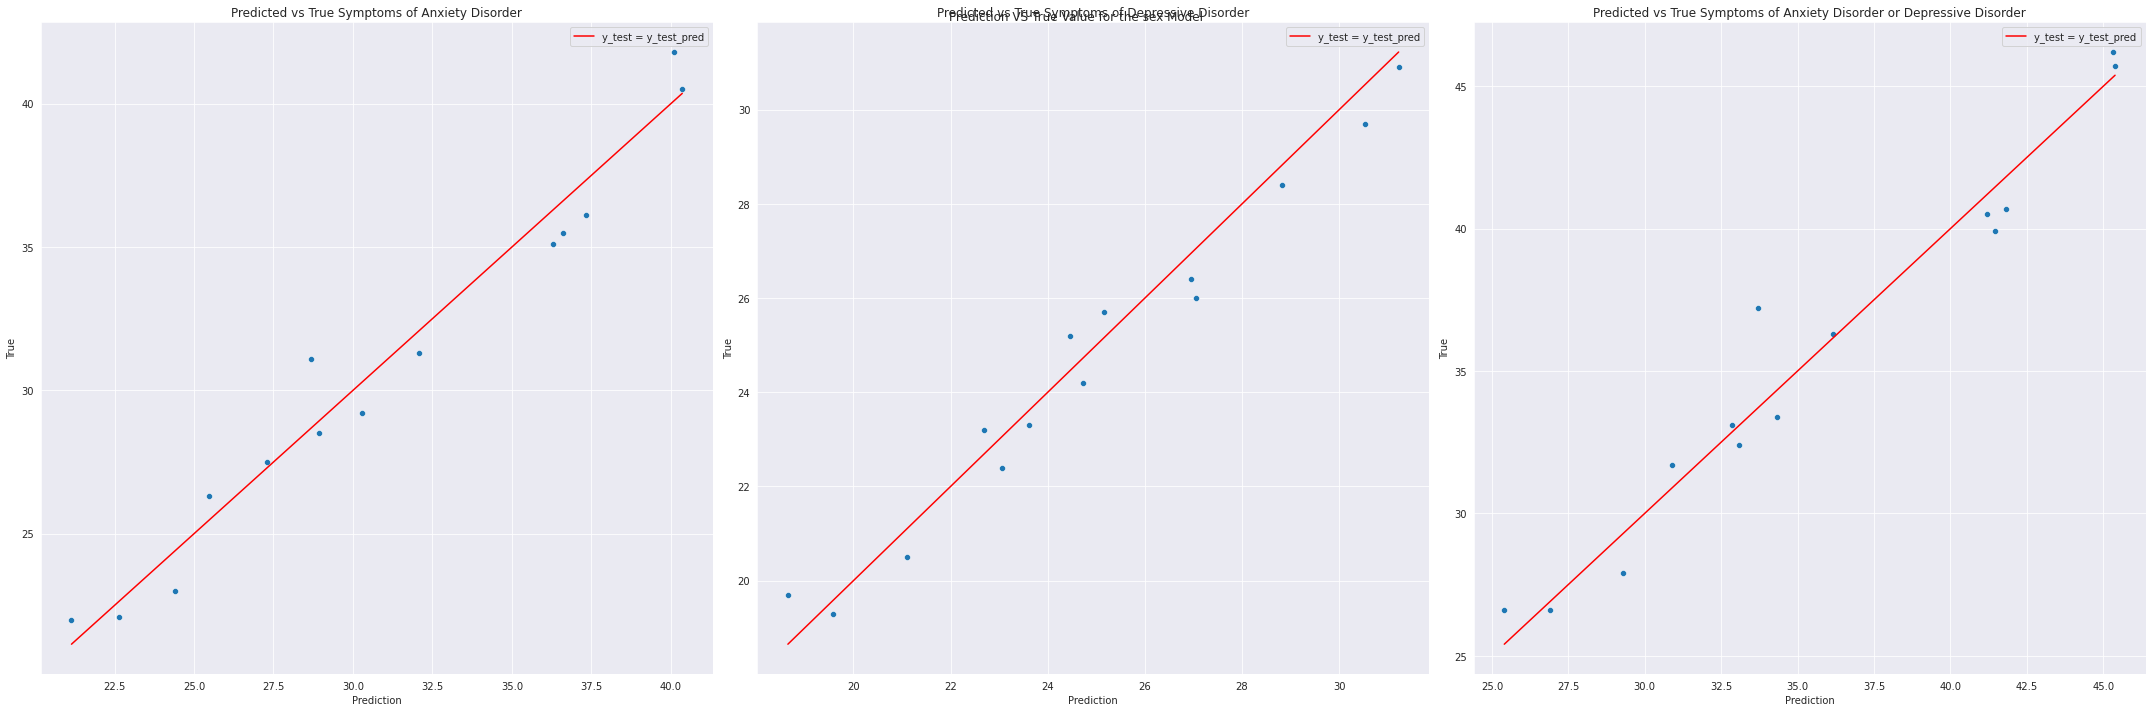

Symptoms of Anxiety Disorder  \
train R squared without l1                      0.977227   
train R squared without l1                      0.965328   

                            Symptoms of Depressive Disorder  \
train R squared without l1                         0.975057   
train R squared without l1                         0.964290   

                            Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared without l1                                           0.976423    
train R squared without l1                                           0.958196

<Figure size 2160x720 with 0 Axes>

In [ ]:
results1 = get_linear_regression_training_result(sex_X, sex_Y, 'sex', figure_path, with_l1_regularization = True)
display(results1)
results2 = get_linear_regression_training_result(sex_X, sex_Y, 'sex', figure_path, with_l1_regularization = False)
display(results2)

In [ ]:
drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}


for key in drop_dict:
    print(f"Sex Model with L1 regularization: {key}")
    sex_data_one_label = sex_data.drop(columns =drop_dict[key])
    sex_data_datasets = bootstrap_sample(sex_data_one_label, 1000)
    sex_models, features = create_models(sex_data_datasets, key, True)
    del sex_data_datasets
    display_model_coefs(sex_models, features)
    
for key in drop_dict:
    print(f"Sex Model without L1 regularization: {key}")
    sex_data_one_label = sex_data.drop(columns =drop_dict[key])
    sex_data_datasets = bootstrap_sample(sex_data_one_label, 1000)
    sex_models, features = create_models(sex_data_datasets, key, False)
    del sex_data_datasets
    display_model_coefs(sex_models, features)

Sex Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           35.970519  36.857768
Delayed Medical Care, Last 4 Weeks                   0.000000   3.906978
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   4.078183
Did Not Get Needed Care, Last 4 Weeks                0.000000   3.672492
Private Health Insurance Coverage                   -1.122953   0.000000
Public Health Insurance Coverage                    -0.172987   0.000000
Uninsured at the Time of Interview                   0.000000   0.993528
Needed Counseling or Therapy But Did Not Get It...   1.996442   4.111341
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.000000
Took Prescription Medication for Mental Health ...   0.000000   0.000000
Took Prescription Medication for Mental Health,...   0.000000   0.000000
Subgroup=Male                                        0.000000   0.951085

Sex Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           31.007529  31.910680
Delayed Medical Care, Last 4 Weeks                   0.000000   3.788373
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   3.603792
Did Not Get Needed Care, Last 4 Weeks                0.000000   3.254620
Private Health Insurance Coverage                   -1.056770   0.000000
Public Health Insurance Coverage                     0.000000   0.959638
Uninsured at the Time of Interview                  -0.000000   0.397316
Needed Counseling or Therapy But Did Not Get It...   1.661576   3.552801
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.000000
Took Prescription Medication for Mental Health ...   0.000000   0.537064
Took Prescription Medication for Mental Health,...   0.000000   0.000000
Subgroup=Male                                        0.000000   0.000154

Sex Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           25.014744  25.723299
Delayed Medical Care, Last 4 Weeks                   0.000000   0.000000
Delayed or Did Not Get Care, Last 4 Weeks            0.000000   2.264051
Did Not Get Needed Care, Last 4 Weeks                0.000000   2.289609
Private Health Insurance Coverage                   -0.564118   0.000000
Public Health Insurance Coverage                    -0.000000   0.000000
Uninsured at the Time of Interview                   0.000000   1.406544
Needed Counseling or Therapy But Did Not Get It...   1.310025   3.361597
Received Counseling or Therapy, Last 4 Weeks         0.000000   0.000000
Took Prescription Medication for Mental Health ...  -0.000000   0.000000
Took Prescription Medication for Mental Health,...  -0.000000   0.000000
Subgroup=Male                                        0.000000   1.666601

Sex Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           35.978864  36.736140
Delayed Medical Care, Last 4 Weeks                 -17.443515   5.662813
Delayed or Did Not Get Care, Last 4 Weeks            0.339429  28.553764
Did Not Get Needed Care, Last 4 Weeks              -12.075143   2.905112
Private Health Insurance Coverage                   -3.536529   0.174919
Public Health Insurance Coverage                    -5.830208   1.133922
Uninsured at the Time of Interview                  -5.027088   0.957613
Needed Counseling or Therapy But Did Not Get It...   1.400361   5.372012
Received Counseling or Therapy, Last 4 Weeks        -9.403019  -1.963555
Took Prescription Medication for Mental Health ...  12.725726  40.732453
Took Prescription Medication for Mental Health,... -27.993733  -4.946932
Subgroup=Male                                        1.610793   9.200701

Sex Model without L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           31.027376  31.790851
Delayed Medical Care, Last 4 Weeks                 -17.355667   6.902340
Delayed or Did Not Get Care, Last 4 Weeks           -2.265095  26.802088
Did Not Get Needed Care, Last 4 Weeks              -10.824899   2.070660
Private Health Insurance Coverage                   -3.063640  -0.130381
Public Health Insurance Coverage                    -4.812445   1.197720
Uninsured at the Time of Interview                  -4.569307   0.758145
Needed Counseling or Therapy But Did Not Get It...   0.743689   4.924691
Received Counseling or Therapy, Last 4 Weeks        -9.942164  -2.614696
Took Prescription Medication for Mental Health ...  10.922113  39.362626
Took Prescription Medication for Mental Health,... -26.367369  -2.510463
Subgroup=Male                                        1.279227   8.318035

Sex Model without L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                           25.151245  25.588554
Delayed Medical Care, Last 4 Weeks                 -12.900759   2.522396
Delayed or Did Not Get Care, Last 4 Weeks           -0.766338  19.986844
Did Not Get Needed Care, Last 4 Weeks               -6.613157   1.704614
Private Health Insurance Coverage                   -2.234986  -0.019132
Public Health Insurance Coverage                    -4.298272   0.031009
Uninsured at the Time of Interview                  -3.332364   0.854246
Needed Counseling or Therapy But Did Not Get It...   1.806859   4.025851
Received Counseling or Therapy, Last 4 Weeks        -5.069720  -0.062774
Took Prescription Medication for Mental Health ...   7.758513  25.279312
Took Prescription Medication for Mental Health,... -16.617537  -1.864381
Subgroup=Male                                        3.304799   7.844030

In [ ]:
print("Linear Regression without Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(sex_X, sex_Y, with_l1_regularization = False))
print("Linear Regression with Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(sex_X, sex_Y))
print("Random Forest Pridiction Result: ")
display(get_random_forest_r2(sex_X, sex_Y))
print("Gradient Boost Pridiction Result: ")
display(get_gradient_boost_r2(sex_X, sex_Y))

Linear Regression without Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.977227   
test R squared                       0.965328   
train RMSE                           0.864454   
test RMSE                            1.153178   

                 Symptoms of Depressive Disorder  \
train R squared                         0.975057   
test R squared                          0.964290   
train RMSE                              6.583038   
test RMSE                               6.978822   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.976423    
test R squared                                            0.958196    
train RMSE                                                5.154456    
test RMSE                                                 4.989767

Linear Regression with Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.957723   
test R squared                       0.942297   
train RMSE                           1.177839   
test RMSE                            1.487664   

                 Symptoms of Depressive Disorder  \
train R squared                         0.944320   
test R squared                          0.930572   
train RMSE                              6.585360   
test RMSE                               7.222547   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.956452    
test R squared                                            0.937934    
train RMSE                                                5.224881    
test RMSE                                                 4.772205

Random Forest Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.978133   
test R squared                       0.895164   
train RMSE                           0.847084   
test RMSE                            2.005214   

                 Symptoms of Depressive Disorder  \
train R squared                         0.980456   
test R squared                          0.859800   
train RMSE                              6.383428   
test RMSE                               7.037272   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.978036    
test R squared                                            0.887497    
train RMSE                                                5.156662    
test RMSE                                                 4.823395

Gradient Boost Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.999996   
test R squared                       0.924996   
train RMSE                           0.011236   
test RMSE                            1.696088   

                 Symptoms of Depressive Disorder  \
train R squared                         0.999984   
test R squared                          0.893080   
train RMSE                              6.581511   
test RMSE                               7.099979   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.999999    
test R squared                                            0.939125    
train RMSE                                                5.078630    
test RMSE                                                 4.778946

### Section 4.2.6: Mental Health Prediction By State

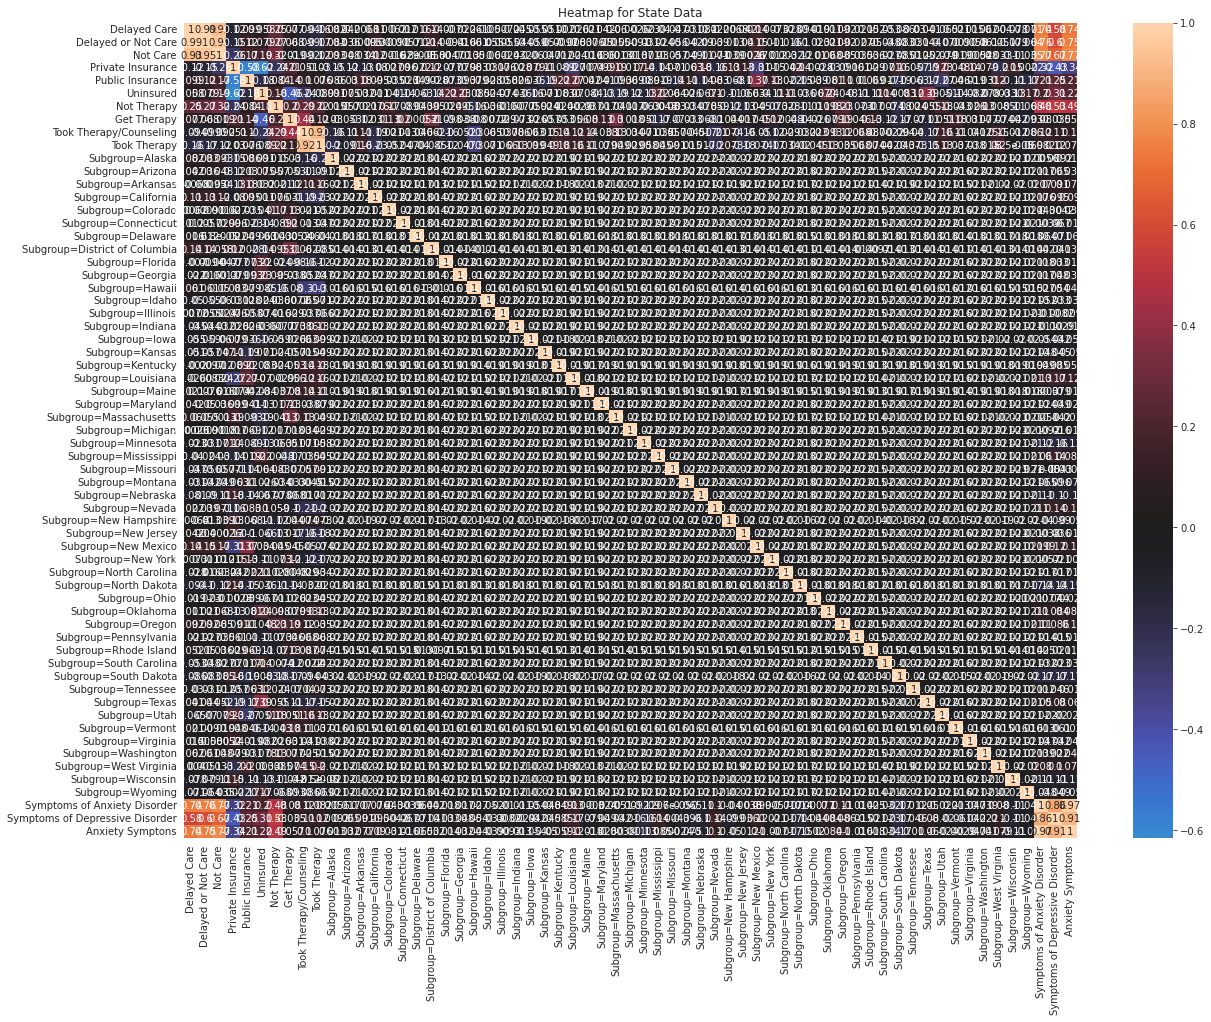

<Figure size 1440x1080 with 0 Axes>

In [ ]:

get_heatmap('Heatmap_for_State_Data', 'Heatmap for State Data', state_data)

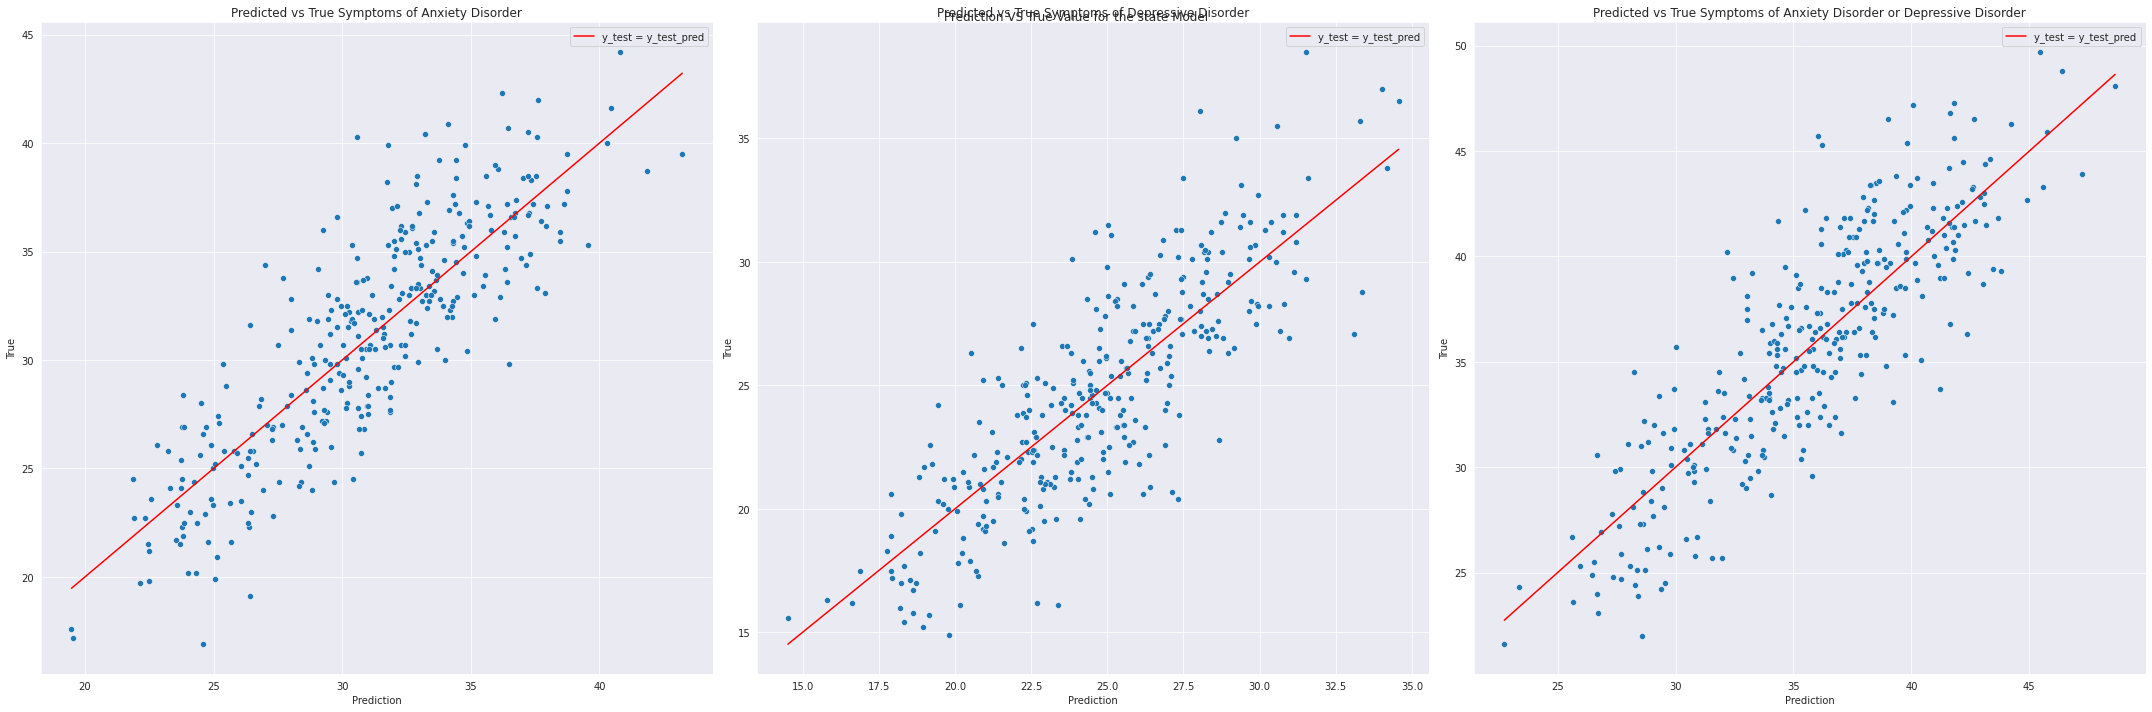

Symptoms of Anxiety Disorder  \
train R squared with l1                      0.755100   
test R squared with l1                       0.718316   

                         Symptoms of Depressive Disorder  \
train R squared with l1                         0.727240   
test R squared with l1                          0.681412   

                         Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared with l1                                           0.761797    
test R squared with l1                                            0.732689

<Figure size 2160x720 with 0 Axes>

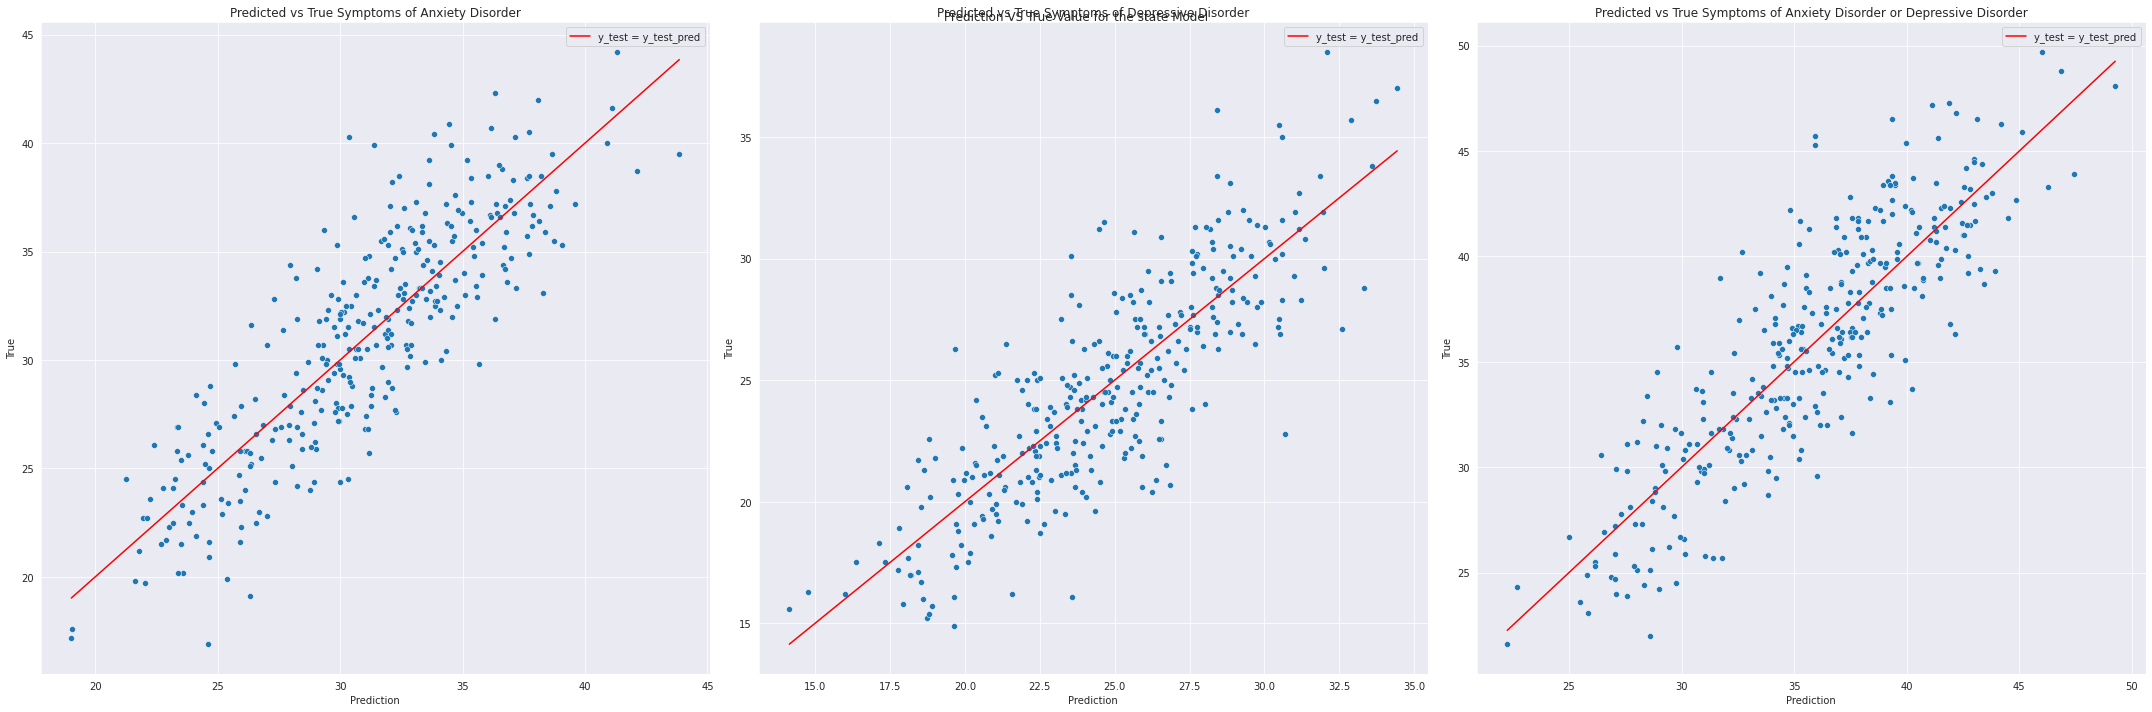

Symptoms of Anxiety Disorder  \
train R squared without l1                      0.761172   
train R squared without l1                      0.724253   

                            Symptoms of Depressive Disorder  \
train R squared without l1                         0.743529   
train R squared without l1                         0.696303   

                            Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared without l1                                           0.767538    
train R squared without l1                                           0.740110

<Figure size 2160x720 with 0 Axes>

In [ ]:
results1 = get_linear_regression_training_result(state_X, state_Y, 'state', figure_path, with_l1_regularization = True)
display(results1)
results2 = get_linear_regression_training_result(state_X, state_Y, 'state', figure_path, with_l1_regularization = False)
display(results2)

In [ ]:
data = pd.read_csv(join(base_path, "processed_data.csv"))
state_data = data[data['Group'] == 'By State'].dropna()

Use_state_data = False
state_data_X_Y = state_data.drop(columns = ['Group', 'Time Period Start Date'])
state_data_X_Y = state_data_X_Y.rename(columns={'Subgroup': 'State'})

if Use_state_data:
    state_data_X_Y  = pd.get_dummies(state_data_X_Y, prefix='State')
else:
    state_data_X_Y  = state_data_X_Y.drop(columns = ['State'])

drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}

for key in drop_dict:
    print(f"State Model with L1 regularization: {key}")
    state_data_X_Y_one_label = state_data_X_Y.drop(columns =drop_dict[key])
    state_data_X_Y_datasets = bootstrap_sample(state_data_X_Y_one_label, 1000)
    state_models, features = create_models(state_data_X_Y_datasets, key, True)
    del state_data_X_Y_datasets
    display_model_coefs(state_models, features)

for key in drop_dict:
    print(f"State Model without L1 regularization: {key}")
    state_data_X_Y_one_label = state_data_X_Y.drop(columns =drop_dict[key])
    state_data_X_Y_datasets = bootstrap_sample(state_data_X_Y_one_label, 1000)
    state_models, features = create_models(state_data_X_Y_datasets, key, False)
    del state_data_X_Y_datasets
    display_model_coefs(state_models, features)

State Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                           1.965469  18.887284
Delayed Medical Care, Last 4 Weeks                  0.000000   0.259254
Delayed or Did Not Get Care, Last 4 Weeks           0.076679   0.450161
Did Not Get Needed Care, Last 4 Weeks               0.037154   0.348952
Private Health Insurance Coverage                  -0.137328   0.035927
Public Health Insurance Coverage                    0.014684   0.158980
Uninsured at the Time of Interview                  0.051515   0.236605
Needed Counseling or Therapy But Did Not Get It...  0.464645   0.655054
Received Counseling or Therapy, Last 4 Weeks       -0.048457   0.115185
Took Prescription Medication for Mental Health ...  0.000000   0.195456
Took Prescription Medication for Mental Health,...  0.039056   0.279282

State Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                           1.048805  17.480287
Delayed Medical Care, Last 4 Weeks                  0.000000   0.233987
Delayed or Did Not Get Care, Last 4 Weeks           0.104344   0.444139
Did Not Get Needed Care, Last 4 Weeks               0.000000   0.263929
Private Health Insurance Coverage                  -0.146855   0.000000
Public Health Insurance Coverage                    0.000000   0.129171
Uninsured at the Time of Interview                  0.024601   0.202691
Needed Counseling or Therapy But Did Not Get It...  0.400051   0.584220
Received Counseling or Therapy, Last 4 Weeks        0.000000   0.141787
Took Prescription Medication for Mental Health ...  0.000000   0.208046
Took Prescription Medication for Mental Health,...  0.033329   0.270211

State Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                          -0.786808  15.031039
Delayed Medical Care, Last 4 Weeks                  0.000000   0.124376
Delayed or Did Not Get Care, Last 4 Weeks           0.000000   0.183416
Did Not Get Needed Care, Last 4 Weeks               0.152104   0.410080
Private Health Insurance Coverage                  -0.132500   0.007586
Public Health Insurance Coverage                    0.045125   0.175251
Uninsured at the Time of Interview                  0.079926   0.245914
Needed Counseling or Therapy But Did Not Get It...  0.488561   0.664427
Received Counseling or Therapy, Last 4 Weeks       -0.153693   0.000000
Took Prescription Medication for Mental Health ... -0.052623   0.011783
Took Prescription Medication for Mental Health,...  0.111369   0.252109

State Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                          -8.068691  16.864606
Delayed Medical Care, Last 4 Weeks                 -0.139747   0.272991
Delayed or Did Not Get Care, Last 4 Weeks           0.060412   0.543845
Did Not Get Needed Care, Last 4 Weeks               0.034825   0.344215
Private Health Insurance Coverage                  -0.117894   0.118817
Public Health Insurance Coverage                    0.032190   0.230685
Uninsured at the Time of Interview                  0.082070   0.322641
Needed Counseling or Therapy But Did Not Get It...  0.482369   0.681102
Received Counseling or Therapy, Last 4 Weeks       -0.102988   0.223497
Took Prescription Medication for Mental Health ... -0.315394   0.218600
Took Prescription Medication for Mental Health,...  0.029606   0.517895

State Model without L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                          -6.459508  16.301848
Delayed Medical Care, Last 4 Weeks                 -0.133589   0.245398
Delayed or Did Not Get Care, Last 4 Weeks           0.097356   0.550247
Did Not Get Needed Care, Last 4 Weeks              -0.016712   0.270471
Private Health Insurance Coverage                  -0.139640   0.078681
Public Health Insurance Coverage                    0.008937   0.172064
Uninsured at the Time of Interview                  0.036798   0.274442
Needed Counseling or Therapy But Did Not Get It...  0.406676   0.596987
Received Counseling or Therapy, Last 4 Weeks       -0.037889   0.245836
Took Prescription Medication for Mental Health ... -0.315025   0.212185
Took Prescription Medication for Mental Health,...  0.047169   0.507534

State Model without L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                          -9.033200  12.875842
Delayed Medical Care, Last 4 Weeks                 -0.177286   0.198369
Delayed or Did Not Get Care, Last 4 Weeks          -0.113958   0.320821
Did Not Get Needed Care, Last 4 Weeks               0.136597   0.428679
Private Health Insurance Coverage                  -0.116267   0.092194
Public Health Insurance Coverage                    0.059703   0.219059
Uninsured at the Time of Interview                  0.092855   0.290719
Needed Counseling or Therapy But Did Not Get It...  0.521769   0.698561
Received Counseling or Therapy, Last 4 Weeks       -0.169390   0.107543
Took Prescription Medication for Mental Health ... -0.367202   0.126323
Took Prescription Medication for Mental Health,...  0.078706   0.514067

In [ ]:
data = pd.read_csv(join(base_path, "processed_data.csv"))
state_data = data[data['Group'] == 'By State'].dropna()

Use_state_data = True
state_data_X_Y = state_data.drop(columns = ['Group', 'Time Period Start Date'])
state_data_X_Y = state_data_X_Y.rename(columns={'Subgroup': 'State'})

if Use_state_data:
    state_data_X_Y  = pd.get_dummies(state_data_X_Y, prefix='State')
else:
    state_data_X_Y  = state_data_X_Y.drop(columns = ['State'])

drop_dict = {'Symptoms of Anxiety Disorder or Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder'], 
'Symptoms of Anxiety Disorder':                         ['Symptoms of Anxiety Disorder or Depressive Disorder', 'Symptoms of Depressive Disorder'],
'Symptoms of Depressive Disorder': ['Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']}

for key in drop_dict:
    print(f"State Model with L1 regularization: {key}")
    state_data_X_Y_one_label = state_data_X_Y.drop(columns =drop_dict[key])
    state_data_X_Y_datasets = bootstrap_sample(state_data_X_Y_one_label, 1000)
    state_models, features = create_models(state_data_X_Y_datasets, key, True)
    del state_data_X_Y_datasets
    display_model_coefs(state_models, features)

for key in drop_dict:
    print(f"State Model without L1 regularization: {key}")
    state_data_X_Y_one_label = state_data_X_Y.drop(columns =drop_dict[key])
    state_data_X_Y_datasets = bootstrap_sample(state_data_X_Y_one_label, 1000)
    state_models, features = create_models(state_data_X_Y_datasets, key, False)
    del state_data_X_Y_datasets
    display_model_coefs(state_models, features)

State Model with L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower      upper
intercept                                  1.217400  18.054716
Delayed Medical Care, Last 4 Weeks         0.000000   0.264161
Delayed or Did Not Get Care, Last 4 Weeks  0.070359   0.442900
Did Not Get Needed Care, Last 4 Weeks      0.031425   0.350065
Private Health Insurance Coverage         -0.122584   0.035897
...                                             ...        ...
State_Virginia                            -0.000000   0.000000
State_Washington                           0.000000   0.000000
State_West Virginia                        0.000000   0.000000
State_Wisconsin                            0.000000   0.000000
State_Wyoming                              0.000000   0.000000

[62 rows x 2 columns]

State Model with L1 regularization: Symptoms of Anxiety Disorder


lower      upper
intercept                                  1.157679  18.010677
Delayed Medical Care, Last 4 Weeks         0.000000   0.247142
Delayed or Did Not Get Care, Last 4 Weeks  0.094268   0.437211
Did Not Get Needed Care, Last 4 Weeks      0.000000   0.277299
Private Health Insurance Coverage         -0.146411   0.000000
...                                             ...        ...
State_Virginia                             0.000000   0.000000
State_Washington                          -0.000000   0.000000
State_West Virginia                        0.000000   0.000000
State_Wisconsin                            0.000000   0.000000
State_Wyoming                              0.000000   0.000000

[62 rows x 2 columns]

State Model with L1 regularization: Symptoms of Depressive Disorder


lower      upper
intercept                                 -0.767645  15.259560
Delayed Medical Care, Last 4 Weeks         0.000000   0.132490
Delayed or Did Not Get Care, Last 4 Weeks  0.000000   0.160294
Did Not Get Needed Care, Last 4 Weeks      0.178267   0.419741
Private Health Insurance Coverage         -0.135841   0.004333
...                                             ...        ...
State_Virginia                             0.000000   0.000000
State_Washington                          -0.000000   0.000000
State_West Virginia                        0.000000   0.000000
State_Wisconsin                            0.000000   0.000000
State_Wyoming                              0.000000   0.000000

[62 rows x 2 columns]

State Model without L1 regularization: Symptoms of Anxiety Disorder or Depressive Disorder


lower         upper
intercept                                 -6.477057e+11  6.274954e+11
Delayed Medical Care, Last 4 Weeks        -2.247902e-03  3.995075e-01
Delayed or Did Not Get Care, Last 4 Weeks  7.597373e-02  5.227099e-01
Did Not Get Needed Care, Last 4 Weeks     -1.209388e-01  1.710799e-01
Private Health Insurance Coverage         -1.254536e-01  1.198178e-01
...                                                 ...           ...
State_Virginia                            -6.274954e+11  6.477057e+11
State_Washington                          -6.274954e+11  6.477057e+11
State_West Virginia                       -6.274954e+11  6.477057e+11
State_Wisconsin                           -6.274954e+11  6.477057e+11
State_Wyoming                             -6.274954e+11  6.477057e+11

[62 rows x 2 columns]

State Model without L1 regularization: Symptoms of Anxiety Disorder


lower         upper
intercept                                 -5.528502e+11  6.098802e+11
Delayed Medical Care, Last 4 Weeks        -3.528522e-02  3.402418e-01
Delayed or Did Not Get Care, Last 4 Weeks  1.046426e-01  5.518946e-01
Did Not Get Needed Care, Last 4 Weeks     -1.563310e-01  1.345367e-01
Private Health Insurance Coverage         -1.302439e-01  1.212367e-01
...                                                 ...           ...
State_Virginia                            -6.098802e+11  5.528502e+11
State_Washington                          -6.098802e+11  5.528502e+11
State_West Virginia                       -6.098802e+11  5.528502e+11
State_Wisconsin                           -6.098802e+11  5.528502e+11
State_Wyoming                             -6.098802e+11  5.528502e+11

[62 rows x 2 columns]

State Model without L1 regularization: Symptoms of Depressive Disorder


lower         upper
intercept                                 -5.189911e+11  5.206376e+11
Delayed Medical Care, Last 4 Weeks         1.058913e-02  3.529319e-01
Delayed or Did Not Get Care, Last 4 Weeks -1.246434e-01  2.475582e-01
Did Not Get Needed Care, Last 4 Weeks     -2.519676e-02  2.099509e-01
Private Health Insurance Coverage         -1.616821e-01  5.260602e-02
...                                                 ...           ...
State_Virginia                            -5.206376e+11  5.189911e+11
State_Washington                          -5.206376e+11  5.189911e+11
State_West Virginia                       -5.206376e+11  5.189911e+11
State_Wisconsin                           -5.206376e+11  5.189911e+11
State_Wyoming                             -5.206376e+11  5.189911e+11

[62 rows x 2 columns]

In [ ]:
print("Linear Regression without Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(state_X, state_Y, with_l1_regularization = False))
print("Linear Regression with Lasso Regularization Pridiction Result: ")
display(get_linear_regression_r2(state_X, state_Y))
print("Random Forest Pridiction Result: ")
display(get_random_forest_r2(state_X, state_Y))
print("Gradient Boost Pridiction Result: ")
display(get_gradient_boost_r2(state_X, state_Y))

Linear Regression without Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.761172   
test R squared                       0.724253   
train RMSE                           2.513977   
test RMSE                            2.787240   

                 Symptoms of Depressive Disorder  \
train R squared                         0.743529   
test R squared                          0.696303   
train RMSE                              6.876201   
test RMSE                               6.855005   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.767538    
test R squared                                            0.740110    
train RMSE                                                5.562966    
test RMSE                                                 5.760861

Linear Regression with Lasso Regularization Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.755100   
test R squared                       0.718316   
train RMSE                           2.545737   
test RMSE                            2.817086   

                 Symptoms of Depressive Disorder  \
train R squared                         0.727240   
test R squared                          0.681412   
train RMSE                              6.879213   
test RMSE                               6.833044   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.761797    
test R squared                                            0.732689    
train RMSE                                                5.589195    
test RMSE                                                 5.808619

Random Forest Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.957891   
test R squared                       0.705002   
train RMSE                           1.055623   
test RMSE                            2.882890   

                 Symptoms of Depressive Disorder  \
train R squared                         0.944125   
test R squared                          0.622822   
train RMSE                              6.737900   
test RMSE                               6.852446   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.958626    
test R squared                                            0.721964    
train RMSE                                                5.115564    
test RMSE                                                 5.833700

Gradient Boost Pridiction Result: 


Symptoms of Anxiety Disorder  \
train R squared                      0.880346   
test R squared                       0.699150   
train RMSE                           1.779437   
test RMSE                            2.911344   

                 Symptoms of Depressive Disorder  \
train R squared                         0.838703   
test R squared                          0.624394   
train RMSE                              6.810162   
test RMSE                               6.841271   

                 Symptoms of Anxiety Disorder or Depressive Disorder  
train R squared                                           0.877371    
test R squared                                            0.712221    
train RMSE                                                5.301259    
test RMSE                                                 5.838647

In [ ]:
data = pd.read_csv(join(base_path, "processed_data.csv")).dropna()
data = data[data["Group"] == "By State"]
state_data_X_Y = data.rename(columns={'Subgroup': 'State'})
state_data_X_Y['State_Code'] = state_data_X_Y['State'].replace(get_us_state_to_abbrev())
display(state_data_X_Y)

for key in ['Symptoms of Anxiety Disorder','Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']:
    fig = px.choropleth(state_data_X_Y,
                        locations = 'State_Code', 
                        locationmode = "USA-states", 
                        scope = "usa",
                        color = key,
                        color_continuous_scale="Viridis_r", 
                        animation_frame='Time Period Start Date'
                        )
    fig.show()


Group    State Time Period Start Date  \
265   By State  Alabama             01/06/2021   
266   By State  Alabama             01/20/2021   
267   By State  Alabama             02/03/2021   
268   By State  Alabama             02/17/2021   
269   By State  Alabama             03/03/2021   
...        ...      ...                    ...   
1331  By State  Wyoming             10/14/2020   
1332  By State  Wyoming             10/28/2020   
1333  By State  Wyoming             11/11/2020   
1334  By State  Wyoming             11/25/2020   
1335  By State  Wyoming             12/09/2020   

      Delayed Medical Care, Last 4 Weeks  \
265                                 27.9   
266                                 33.1   
267                                 31.0   
268                                 24.3   
269                                 26.1   
...                                  ...   
1331                                29.4   
1332                                28.4   
1333                                29.9   
1334                                34.5   
1335                                31.3   

      Delayed or Did Not Get Care, Last 4 Weeks  \
265                                        30.9   
266                                        37.0   
267                                        34.8   
268                                        27.0   
269                                        29.5   
...                                         ...   
1331                                       32.4   
1332                                       33.7   
1333                                       32.8   
1334                                       39.5   
1335                                       37.3   

      Did Not Get Needed Care, Last 4 Weeks  \
265                                    20.5   
266                                    26.1   
267                                    22.6   
268                                    18.4   
269                                    23.7   
...                                     ...   
1331                                   23.7   
1332                                   24.1   
1333                                   22.1   
1334                                   27.5   
1335                                   29.2   

      Private Health Insurance Coverage  Public Health Insurance Coverage  \
265                                75.7                              16.7   
266                                74.4                              20.6   
267                                80.8                              20.8   
268                                73.6                              22.8   
269                                77.4                              25.4   
...                                 ...                               ...   
1331                               79.1                              13.6   
1332                               79.3                              16.2   
1333                               72.2                              15.4   
1334                               80.3                              14.3   
1335                               76.2                              13.1   

      Uninsured at the Time of Interview  \
265                                 18.7   
266                                 17.5   
267                                 11.1   
268                                 19.0   
269                                 12.5   
...                                  ...   
1331                                14.9   
1332                                15.4   
1333                                22.2   
1334                                12.1   
1335                                20.6   

      Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks  \
265                                                12.9               
266                                                11.2               
267                               

### Section 4.2.7: National Data Anaylsis

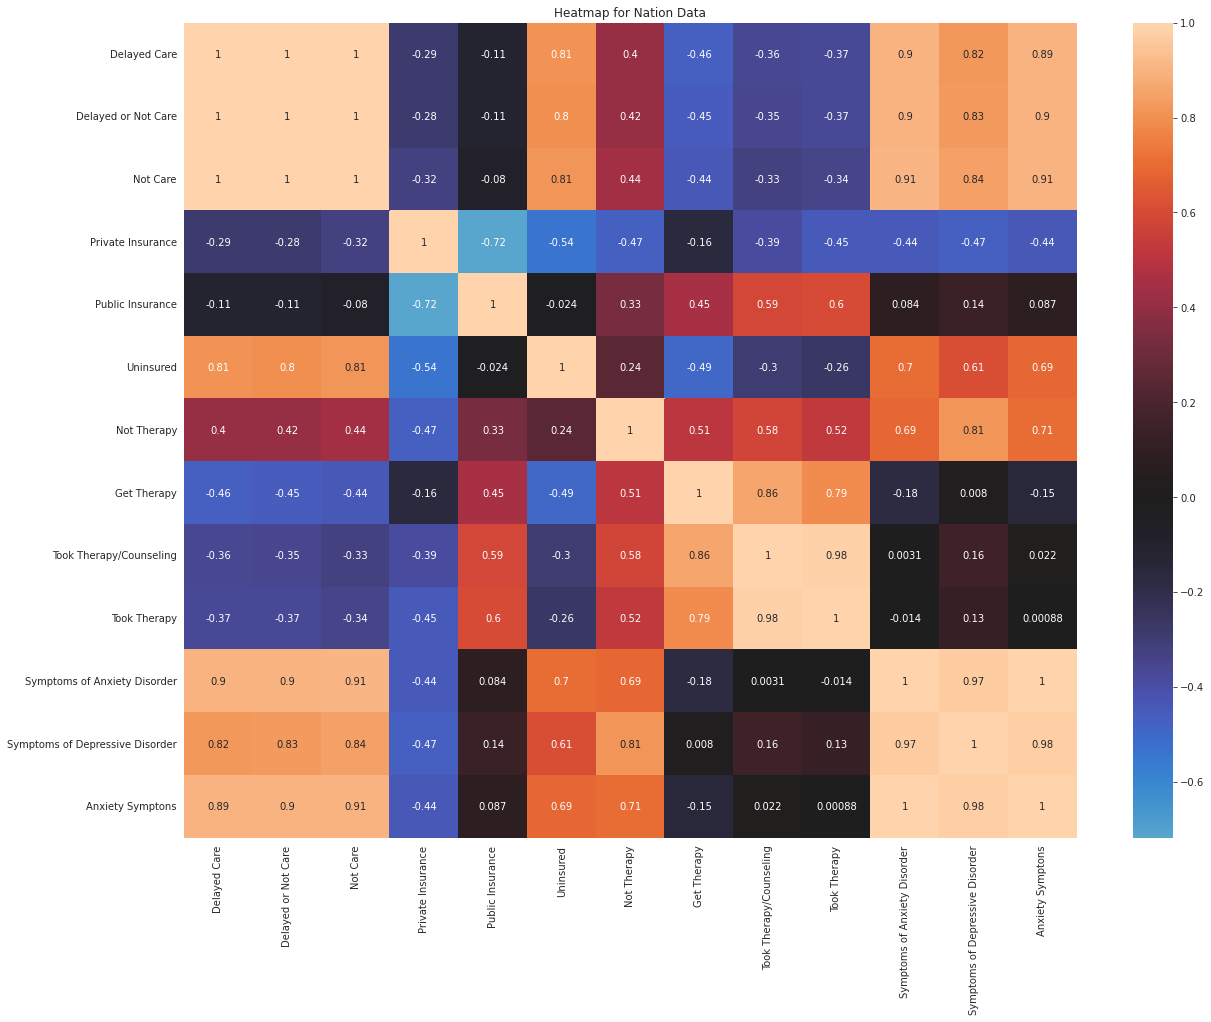

<Figure size 1440x1080 with 0 Axes>

In [ ]:
get_heatmap('Heatmap_for_Nation_Data', 'Heatmap for Nation Data', nation_data)

## Section 4.3: Highly-correlated factors to Anxiety Symptons

### 4.3.1:  Train Test Split and Feature engineering

In [26]:
health_insurance_coverage = pd.read_csv(join(base_path, "nchs_covid_health_insurance_coverage.csv"))
reduced_access_to_health_care = pd.read_csv(join(base_path, "nchs_covid_reduced_access_to_health_care.csv"))
mental_health_care = pd.read_csv(join(base_path, "nchs_covid_mental_health_care.csv"))
indicators_of_anxiety_depression = pd.read_csv(join(base_path, "nchs_covid_indicators_of_anxiety_depression.csv"))
dataframes = [reduced_access_to_health_care, health_insurance_coverage, mental_health_care, indicators_of_anxiety_depression]
for i in range(len(dataframes)):
  # Select useful columns
  dataframes[i] = dataframes[i][['Indicator', 'Group', 'Subgroup', 'Time Period Start Date', 'Value']]
  # Convert indicators to columns
  pivot = dataframes[i].pivot(columns='Indicator', values = 'Value').rename_axis(None, axis=1).reset_index()
  # Concate the index tuples to the table
  new = pd.concat([pivot, dataframes[i][['Group', 'Subgroup', 'Time Period Start Date']]], axis=1)
  # Group the rows by the index tuples
  dataframes[i] = new.groupby(['Group', 'Subgroup', 'Time Period Start Date']).agg('mean').reset_index().drop(['index'], axis=1)
df = dataframes[0]
for i in range(1,len(dataframes)):
  df = df.merge(dataframes[i], how = 'inner', on = ['Group', 'Subgroup', 'Time Period Start Date'])
df.to_csv(base_path + '/processed_data.csv', index=False)


data = pd.read_csv(join(base_path, "processed_data.csv"))
data = data.dropna(axis=0)
data = data.drop(["Symptoms of Anxiety Disorder", "Symptoms of Depressive Disorder"], axis=1)
display(data["Group"].unique())


# data engineering and feature cleaning
state_data = data[data['Group'] == 'By State']
state_data_X_Y = state_data.drop(columns = ['Group', 'Time Period Start Date'])
state_data_X_Y = state_data_X_Y.rename(columns={'Subgroup': 'State'})
state_data_X_Y  = state_data_X_Y.drop(columns = ['State'])
state_data_X = state_data_X_Y.drop(columns = ['Symptoms of Anxiety Disorder or Depressive Disorder'])
state_data_Y = state_data_X_Y[['Symptoms of Anxiety Disorder or Depressive Disorder']]
state_data_X = (state_data_X-state_data_X.mean())/state_data_X.std()

state_data_X_train, state_data_X_test,     state_data_Y_train, state_data_Y_test = train_test_split(state_data_X, state_data_Y, test_size=0.33, random_state=42)
print("Dimension of Train Test Features:", state_data_X_train.shape, state_data_X_test.shape)
print("Dimension of Train Test Labels:",   state_data_Y_train.shape, state_data_Y_test.shape)

array(['By Disability status', 'By Education',
       'By Race/Hispanic ethnicity', 'By Sex', 'By State',
       'National Estimate'], dtype=object)

Dimension of Train Test Features: (663, 10) (328, 10)
Dimension of Train Test Labels: (663, 1) (328, 1)


### 4.3.2: Basic Modeling with Linear Regression

*   Report MSE and $R^2$, 
*   Make the residual plots
*   Report the coefficient of linear model.
*   Report the confidence interval for the coefficients of linear model by bootstrapped sampling 









In [27]:
fontsize=25

Train R2: 0.7070,   Test R2: 0.6970
Train RMSE: 3.0235,  Test RMSE: 3.1629


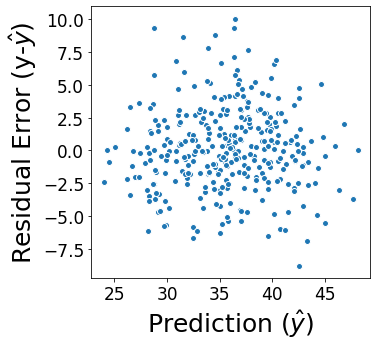

The coefficient of Linear Model



0         0
0                 Delayed Medical Care, Last 4 Weeks  1.191051
1          Delayed or Did Not Get Care, Last 4 Weeks  1.181405
2              Did Not Get Needed Care, Last 4 Weeks  1.512690
3                  Private Health Insurance Coverage -0.146902
4                   Public Health Insurance Coverage  0.383443
5                 Uninsured at the Time of Interview  0.780084
6  Needed Counseling or Therapy But Did Not Get I...  1.321398
7       Received Counseling or Therapy, Last 4 Weeks -0.012529
8  Took Prescription Medication for Mental Health...  0.183470
9  Took Prescription Medication for Mental Health...  0.739157



The Confidence Interval of Linear Model features



lower      upper
intercept                                          -9.827329  18.112029
Delayed Medical Care, Last 4 Weeks                 -0.107190   0.289562
Delayed or Did Not Get Care, Last 4 Weeks           0.055682   0.488990
Did Not Get Needed Care, Last 4 Weeks               0.025720   0.360143
Private Health Insurance Coverage                  -0.120869   0.132257
Public Health Insurance Coverage                    0.027959   0.218659
Uninsured at the Time of Interview                  0.071898   0.324298
Needed Counseling or Therapy But Did Not Get It...  0.477754   0.665206
Received Counseling or Therapy, Last 4 Weeks       -0.067948   0.216604
Took Prescription Medication for Mental Health ... -0.291114   0.195095
Took Prescription Medication for Mental Health,...  0.057123   0.503990

In [32]:
# Creat model and 
def create_models_custom(datasets, key):
    models = []
    for data in datasets:
        X = data.drop(columns = [key])
        Y = data[[key]]
        lr = LinearRegression()
        lr.fit(X, Y)
        models.append(lr)
    return models, X.columns

state_lr_model = LinearRegression()
state_lr_model.fit(state_data_X_train, state_data_Y_train)
state_data_Y_train_pred = state_lr_model.predict(state_data_X_train)
state_data_Y_test_pred = state_lr_model.predict(state_data_X_test)
train_R2 = state_lr_model.score(state_data_X_train, state_data_Y_train)
test_R2 = state_lr_model.score(state_data_X_test, state_data_Y_test)

train_mse = mean_squared_error(state_data_Y_train_pred, state_data_Y_train, squared=False)
test_mse = mean_squared_error(state_data_Y_test_pred, state_data_Y_test, squared=False)

print(f"Train R2: {train_R2:.4f},   Test R2: {test_R2:.4f}")
print(f"Train RMSE: {train_mse:.4f},  Test RMSE: {test_mse:.4f}")


plt.figure(figsize=(5, 5))
plt.scatter(state_data_Y_test_pred, state_data_Y_test - state_data_Y_test_pred, edgecolor='white', label='Ours')
plt.xlabel(r"Prediction ($\hat{y})$", fontsize=fontsize)
plt.ylabel(r"Residual Error (y-$\hat{y})$", fontsize=fontsize)
plt.xticks(fontsize=fontsize-8)
plt.yticks(fontsize=fontsize-8)
#plt.savefig(join(figure_path, "q1_residual_plots.png"), bbox_inches='tight')
plt.show()


print("The coefficient of Linear Model\n")
coefficients = pd.concat([pd.DataFrame(state_data_X_train.columns),pd.DataFrame(np.transpose(state_lr_model.coef_))], axis = 1)
display(coefficients)
print("\n")

print("The Confidence Interval of Linear Model features\n")
label = 'Symptoms of Anxiety Disorder or Depressive Disorder'
state_data_X_Y_datasets = bootstrap_sample(state_data_X_Y, 100)
state_models, features = create_models_custom(state_data_X_Y_datasets, label)
del state_data_X_Y_datasets
display_model_coefs(state_models, features)
print("\n")

### 4.3.3: Modeling Improvement with Random Forest


In [29]:
n_estimators = 100
randomForest = RandomForestRegressor(n_estimators = n_estimators, random_state=42)
randomForest.fit(state_data_X_train, state_data_Y_train)
state_data_Y_train_pred = randomForest.predict(state_data_X_train)
state_data_Y_test_pred = randomForest.predict(state_data_X_test)
train_R2 = randomForest.score(state_data_X_train, state_data_Y_train)
test_R2 = randomForest.score(state_data_X_test, state_data_Y_test)

train_mse = mean_squared_error(state_data_Y_train_pred, state_data_Y_train, squared=False)
test_mse = mean_squared_error(state_data_Y_test_pred, state_data_Y_test, squared=False)

print(f"Train R2: {train_R2:.4f},   Test R2: {test_R2:.4f}")
print(f"Train RMSE: {train_mse:.4f},  Test RMSE: {test_mse:.4f}")

Train R2: 0.9569,   Test R2: 0.7139
Train RMSE: 1.1590,  Test RMSE: 3.0734


### 4.3.4: Modeling Improvement with Gradient Boosting

*   Hyperparameter learning rate tuning by 5-fold cross validation



In [30]:
learning_rates = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
max_depth = 3
n_estimators = 100
GB_MSEs = []
GB_R2 = []
for lr in learning_rates:
  gb = GradientBoostingRegressor(max_depth = max_depth, max_features='auto', learning_rate = lr, n_estimators = n_estimators)
  scores = cross_validate(gb, state_data_X_train, state_data_Y_train, cv=5,
                          scoring=('neg_mean_squared_error', 'r2'))
  gb_mse, gb_r2 = -1 * scores['test_neg_mean_squared_error'].mean(), scores['test_r2'].mean()
  print(f"LR of GB: {lr}, MSE: {gb_mse:.4f}, R2:{gb_r2:.4f}")
  GB_MSEs.append(gb_mse)
  GB_R2.append(gb_r2)

learning_rate = 0.05
gradientboost = GradientBoostingRegressor(max_depth = max_depth, max_features='auto', learning_rate = learning_rate, n_estimators = n_estimators)
gradientboost.fit(state_data_X_train, state_data_Y_train)
state_data_Y_train_pred = gradientboost.predict(state_data_X_train)
state_data_Y_test_pred = gradientboost.predict(state_data_X_test)
train_R2 = gradientboost.score(state_data_X_train, state_data_Y_train)
test_R2 = gradientboost.score(state_data_X_test, state_data_Y_test)

train_mse = mean_squared_error(state_data_Y_train_pred, state_data_Y_train, squared=False)
test_mse = mean_squared_error(state_data_Y_test_pred, state_data_Y_test, squared=False)

print(f"Train R2: {train_R2:.4f},   Test R2: {test_R2:.4f}")
print(f"Train RMSE: {train_mse:.4f},  Test RMSE: {test_mse:.4f}")


LR of GB: 0.01, MSE: 13.5857, R2:0.5561
LR of GB: 0.02, MSE: 10.2479, R2:0.6630
LR of GB: 0.05, MSE: 9.3870, R2:0.6890
LR of GB: 0.1, MSE: 9.8252, R2:0.6746
LR of GB: 0.2, MSE: 10.5571, R2:0.6491
LR of GB: 0.5, MSE: 12.8514, R2:0.5726
Train R2: 0.8314,   Test R2: 0.7135
Train RMSE: 2.2938,  Test RMSE: 3.0758


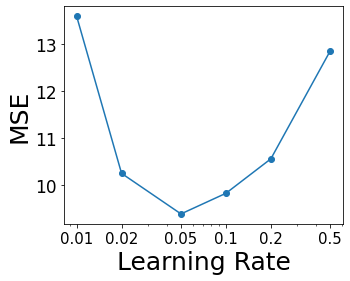

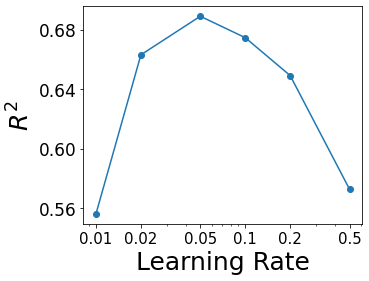

In [33]:
plt.figure(figsize=(5, 4))
plt.plot(learning_rates, GB_MSEs, marker='o')
plt.xscale("log")
plt.xticks(fontsize=fontsize-10)
plt.yticks(fontsize=fontsize-8)
plt.xlabel("Learning Rate", fontsize=fontsize)
plt.ylabel("MSE", fontsize=fontsize)

plt.xticks(learning_rates, learning_rates)
plt.show()
#plt.savefig(join(figure_path, "cross_valid_mse.png"), bbox_inches='tight')


plt.figure(figsize=(5, 4))
plt.plot(learning_rates, GB_R2, marker='o')
plt.xscale("log")
plt.xticks(fontsize=fontsize-10)
plt.yticks([0.56, 0.60, 0.64, 0.68], fontsize=fontsize-8)
plt.xlabel("Learning Rate", fontsize=fontsize)
plt.ylabel(f"$R^2$", fontsize=fontsize)
plt.xticks(learning_rates, learning_rates)
plt.show()
#plt.savefig(join(figure_path, "cross_valid_r2.png"), bbox_inches='tight')